In [1]:
import all_data_handler
import pandas
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
import seaborn as sb

adh = all_data_handler.UserData()
per_task_df = pandas.DataFrame(adh.toPandas())

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
per_task_df

,box,condition,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,task,tripletap,ui,user,voice
0,0,one,0,1,0,0,0,0,0,0,0,patrol_a,0,0,42,1
1,0,one,0,1,0,0,0,0,0,0,3,patrol_screen,0,0,42,1
2,0,one,0,2,0,0,0,0,0,0,4,move_a,0,0,42,0
3,0,one,1,1,3,2,0,0,0,0,1,stop,0,0,42,0
4,0,one,0,1,0,0,0,0,0,0,0,move_wall,0,0,42,0
5,0,one,0,4,0,0,0,0,0,0,0,divide_color_2,0,0,42,0
6,0,one,0,4,1,0,0,0,0,0,0,divide_color_1,1,0,42,0
7,0,one,1,2,0,0,0,0,0,0,4,crate,0,0,42,0
8,0,one,0,0,0,0,0,0,0,2,3,split,2,0,42,0
9,0,one,0,1,1,0,0,0,0,0,0,remove,0,0,42,0


In [3]:
model = ols('lasso ~ condition + task', data=per_task_df).fit()
table = sm.stats.anova_lm(model, typ=1)
table

/usr/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/usr/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
/usr/lib/python2.7/dist-packages/scipy/stats/_distn_infrastructure.py:1749: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
condition,4.0,40.501648,10.125412,23.928469,1.058642e-18
task,17.0,4.255974,0.250351,0.591633,8.998391e-01
Residual,788.0,333.444847,0.423153,NaN,NaN


In [4]:
col_list = list(per_task_df)
col_list.remove("user")
col_list.remove("condition")
col_list.remove("task")

In [5]:
per_task_df["total_gestures"] = per_task_df[col_list].sum(axis=1)

In [6]:
per_task_df

,box,condition,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,task,tripletap,ui,user,voice,total_gestures
0,0,one,0,1,0,0,0,0,0,0,0,patrol_a,0,0,42,1,2
1,0,one,0,1,0,0,0,0,0,0,3,patrol_screen,0,0,42,1,5
2,0,one,0,2,0,0,0,0,0,0,4,move_a,0,0,42,0,6
3,0,one,1,1,3,2,0,0,0,0,1,stop,0,0,42,0,8
4,0,one,0,1,0,0,0,0,0,0,0,move_wall,0,0,42,0,1
5,0,one,0,4,0,0,0,0,0,0,0,divide_color_2,0,0,42,0,4
6,0,one,0,4,1,0,0,0,0,0,0,divide_color_1,1,0,42,0,6
7,0,one,1,2,0,0,0,0,0,0,4,crate,0,0,42,0,7
8,0,one,0,0,0,0,0,0,0,2,3,split,2,0,42,0,7
9,0,one,0,1,1,0,0,0,0,0,0,remove,0,0,42,0,2


In [7]:
model = ols('lasso ~ condition + task', data=per_task_df).fit()
table = sm.stats.anova_lm(model, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
condition,4.0,40.501648,10.125412,23.928469,1.058642e-18
task,17.0,4.255974,0.250351,0.591633,8.998391e-01
Residual,788.0,333.444847,0.423153,NaN,NaN


In [8]:
per_task_df[col_list] = per_task_df[col_list].div(per_task_df.total_gestures, axis=0)
per_task_df

,box,condition,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,task,tripletap,ui,user,voice,total_gestures
0,0.000000,one,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,patrol_a,0.000000,0.000000,42,0.5,2
1,0.000000,one,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.600000,patrol_screen,0.000000,0.000000,42,0.2,5
2,0.000000,one,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,move_a,0.000000,0.000000,42,0.0,6
3,0.000000,one,0.125000,0.125000,0.375000,0.250000,0.000000,0.000000,0.0,0.000000,0.125000,stop,0.000000,0.000000,42,0.0,8
4,0.000000,one,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,move_wall,0.000000,0.000000,42,0.0,1
5,0.000000,one,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,divide_color_2,0.000000,0.000000,42,0.0,4
6,0.000000,one,0.000000,0.666667,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,divide_color_1,0.166667,0.000000,42,0.0,6
7,0.000000,one,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.571429,crate,0.000000,0.000000,42,0.0,7
8,0.000000,one,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.428571,split,0.285714,0.000000,42,0.0,7
9,0.000000,one,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,remove,0.000000,0.000000,42,0.0,2


In [9]:
model = ols('lasso ~ condition + task', data=per_task_df).fit()
table = sm.stats.anova_lm(model, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
condition,4.0,1.212104,0.303026,13.630016,9.547797e-11
task,17.0,0.550675,0.032393,1.457011,1.036110e-01
Residual,779.0,17.318933,0.022232,NaN,NaN


Ok, that looks a LOT better. Like lasso depends on condition with p=0.000000001 or something. 

In [10]:
for gesture in col_list:
    model = ols('{} ~ condition + task'.format(gesture), data=per_task_df).fit()
    table = sm.stats.anova_lm(model, typ=1)
    print gesture
    print table
    print 

box
              df     sum_sq   mean_sq          F        PR(>F)
condition    4.0   1.353524  0.338381  23.600913  1.927845e-18
task        17.0   0.220666  0.012980   0.905335  5.676400e-01
Residual   779.0  11.169006  0.014338        NaN           NaN

doubletap
              df     sum_sq   mean_sq         F        PR(>F)
condition    4.0   0.162173  0.040543  2.465932  4.367356e-02
task        17.0   1.387608  0.081624  4.964544  2.659366e-10
Residual   779.0  12.807846  0.016441       NaN           NaN

drag
              df      sum_sq   mean_sq         F        PR(>F)
condition    4.0    5.419860  1.354965  9.078564  3.600282e-07
task        17.0   21.999869  1.294110  8.670822  1.149644e-20
Residual   779.0  116.264825  0.149249       NaN           NaN

draw
              df     sum_sq   mean_sq         F    PR(>F)
condition    4.0   1.114827  0.278707  2.331997  0.054369
task        17.0   5.687565  0.334563  2.799356  0.000139
Residual   779.0  93.101524  0.119514       NaN

In [11]:
import scipy.stats as ss

#Looking for support of H2:cloud ~= one-robot condition
#Get all the one or unknown condition entries
one_or_unk = per_task_df.query("condition=='one' or condition == 'unknown'")
#For every task
for task in one_or_unk.groupby('task'):
    samples = [condition[1] for condition in task[1].groupby('condition')['drag']]
    if len(samples) > 1:
        f, p = ss.f_oneway(*samples)
        print "task: {}, F={}, p={}".format(task[0], f, p)

task: crate, F=0.23832909046, p=0.631309432606
task: divide_color_1, F=9.57371860574e-32, p=1.0
task: divide_color_2, F=nan, p=nan
task: move_a, F=0.0788157934608, p=0.782110061696
task: move_wall, F=0.466019417476, p=0.503515921785
task: patrol_a, F=nan, p=nan
task: patrol_screen, F=0.0675181350363, p=0.797934094022
task: split, F=3.59610584124, p=0.074083225157
task: stop, F=0.67190412783, p=0.423110190261


The NaN results are annoying, I need to look into what caused that. The other results are about as expected, very high p-values indicate that the null hypothesis should be accepted. This is just for drag, code below checks all gestures across all tasks.

In [12]:
#Get all the one or unknown condition entries
one_or_unk = per_task_df.query("condition=='one' or condition == 'unknown'")
#For every task
for task in one_or_unk.groupby('task'):
    #Get all the gestures from the column headings and drop the ones that aren't actually gestures
    gestures = task[1].columns.tolist()
    gestures.remove('condition')
    gestures.remove('task')
    gestures.remove('total_gestures')
    #Do all the anovas
    for g in gestures:
        samples = [condition[1] for condition in task[1].groupby('condition')[g]]
        if len(samples) > 1:
            f, p = ss.f_oneway(*samples)
            print "task: {}, gesture: {}, F={:.5f}, p={:.5f}".format(task[0], g, f, p)

task: crate, gesture: box, F=nan, p=nan
task: crate, gesture: doubletap, F=0.00023, p=0.98814
task: crate, gesture: drag, F=0.23833, p=0.63131
task: crate, gesture: draw, F=0.70161, p=0.41323
task: crate, gesture: hold, F=1.00000, p=0.33056
task: crate, gesture: lasso, F=nan, p=nan
task: crate, gesture: other, F=nan, p=nan
task: crate, gesture: pinch, F=nan, p=nan
task: crate, gesture: rev_pinch, F=nan, p=nan
task: crate, gesture: tap, F=0.75340, p=0.39683
task: crate, gesture: tripletap, F=nan, p=nan
task: crate, gesture: ui, F=1.00000, p=0.33056
task: crate, gesture: user, F=0.02182, p=0.88421
task: crate, gesture: voice, F=1.82988, p=0.19289
task: divide_color_1, gesture: box, F=nan, p=nan
task: divide_color_1, gesture: doubletap, F=nan, p=nan
task: divide_color_1, gesture: drag, F=0.00000, p=1.00000
task: divide_color_1, gesture: draw, F=0.23299, p=0.63513
task: divide_color_1, gesture: hold, F=1.00000, p=0.33056
task: divide_color_1, gesture: lasso, F=nan, p=nan
task: divide_color

/usr/lib/python2.7/dist-packages/scipy/stats/stats.py:2952: RuntimeWarning: invalid value encountered in double_scalars
  f = msb / msw


The NaN results are probably when there are no instances of that gesture, so e.g. the split task didn't have any box selection gestures in it, so comparing the means didn't make any sense, as they were both zero. 

In [13]:
#Get all the one or unknown condition entries
for condition1, condition2 in itertools.combinations(['one', 'unknown', 'ten', 'hundred', 'thousand'],2):
    compare = per_task_df.query("condition=='{}' or condition == '{}'".format(condition1, condition2))
    count = 0
    count_ss = 0
    #For every task
    for task in compare.groupby('task'):
        #Get all the gestures from the column headings and drop the ones that aren't actually gestures
        gestures = task[1].columns.tolist()
        gestures.remove('condition')
        gestures.remove('task')
        gestures.remove('total_gestures')
        #Do all the anovas
        for g in gestures:
            samples = [condition[1] for condition in task[1].groupby('condition')[g]]
            if len(samples) > 1:
                f, p = ss.f_oneway(*samples)
                count += 1
                if p < 0.05:
                    count_ss += 1
                    print "task: {}, gesture: {}, F={:.5f}, p={:.5f}".format(task[0], g, f, p)
    print "For {} and {}, out of {}, {} were statistically signficant (a = 0.05)".format(condition1, condition2, count, count_ss)
    print

task: split, gesture: tap, F=6.28040, p=0.02203
For one and unknown, out of 126, 1 were statistically signficant (a = 0.05)

task: divide_color_1, gesture: lasso, F=5.65959, p=0.02863
task: divide_color_2, gesture: lasso, F=5.91803, p=0.02564
task: move_a, gesture: lasso, F=5.30939, p=0.03334
For one and ten, out of 154, 3 were statistically signficant (a = 0.05)

task: divide_color_2, gesture: drag, F=8.77070, p=0.00836
task: patrol_screen, gesture: tap, F=6.47060, p=0.02036
For one and hundred, out of 154, 2 were statistically signficant (a = 0.05)

task: crate, gesture: tap, F=5.27966, p=0.03378
task: move_wall, gesture: drag, F=4.63636, p=0.04511
task: patrol_screen, gesture: tap, F=7.75467, p=0.01223
task: split, gesture: tap, F=6.28040, p=0.02203
For one and thousand, out of 154, 4 were statistically signficant (a = 0.05)

task: divide, gesture: lasso, F=6.00000, p=0.02477
task: divide_color_1, gesture: lasso, F=5.65959, p=0.02863
task: merge, gesture: lasso, F=5.84357, p=0.02647

In [14]:
#Lets try to come up with a palette where values for p < 0.05 are colored differently
import matplotlib as mpl
#Set up our alpha for statistical significance
alpha = 0.05
c_count = 256.0
step = 1.0/c_count
below_alpha = int(alpha/step)
above_alpha = c_count-below_alpha
#Top and bottom halves of the color map
p1 = sb.dark_palette("red", n_colors=below_alpha, reverse=True)
p1.extend(sb.dark_palette("seagreen", n_colors=above_alpha))
#Convert to matplotlib color map
cm = mpl.colors.ListedColormap(p1.as_hex())

In [15]:
#Attempt to build a rectangular pandas dataframe of p-values by gesture within condition to throw into a heatmap
#Pandas dataframes can be built out of a tuple dictionary, so try building just that first
all_p_vals = {}
#Outer index is condition, inner index is task
for condition_a in per_task_df.groupby(['condition', 'task']):
    all_p_vals[condition_a[0][0], condition_a[0][1]] = {}
    #Outer index is condtition, inner is task, again, for the other axis
    for condition_b in per_task_df.groupby(['condition', 'task']):
        samples = [condition_a[1]["drag"], condition_b[1]["drag"]]
        f, p = ss.f_oneway(*samples)
        all_p_vals[(condition_a[0][0], condition_a[0][1])][(condition_b[0][0], condition_b[0][1])] = p

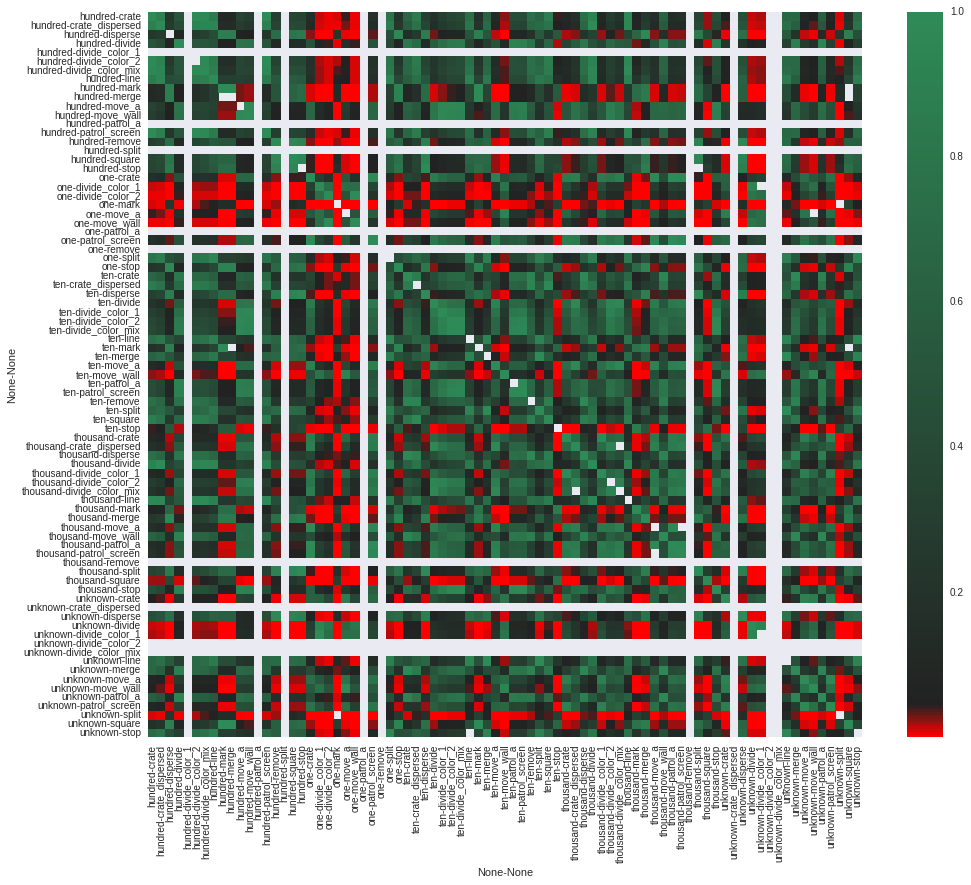

In [16]:
#Let's graph this thing...
import seaborn as sb
import matplotlib.pyplot as plt

#Imbiggen the plots
plt.rcParams['figure.figsize'] = [16,13]

#Load data into frame and plot it
draw_p_vals = pandas.DataFrame(all_p_vals)
sb.heatmap(draw_p_vals, cmap=cm)

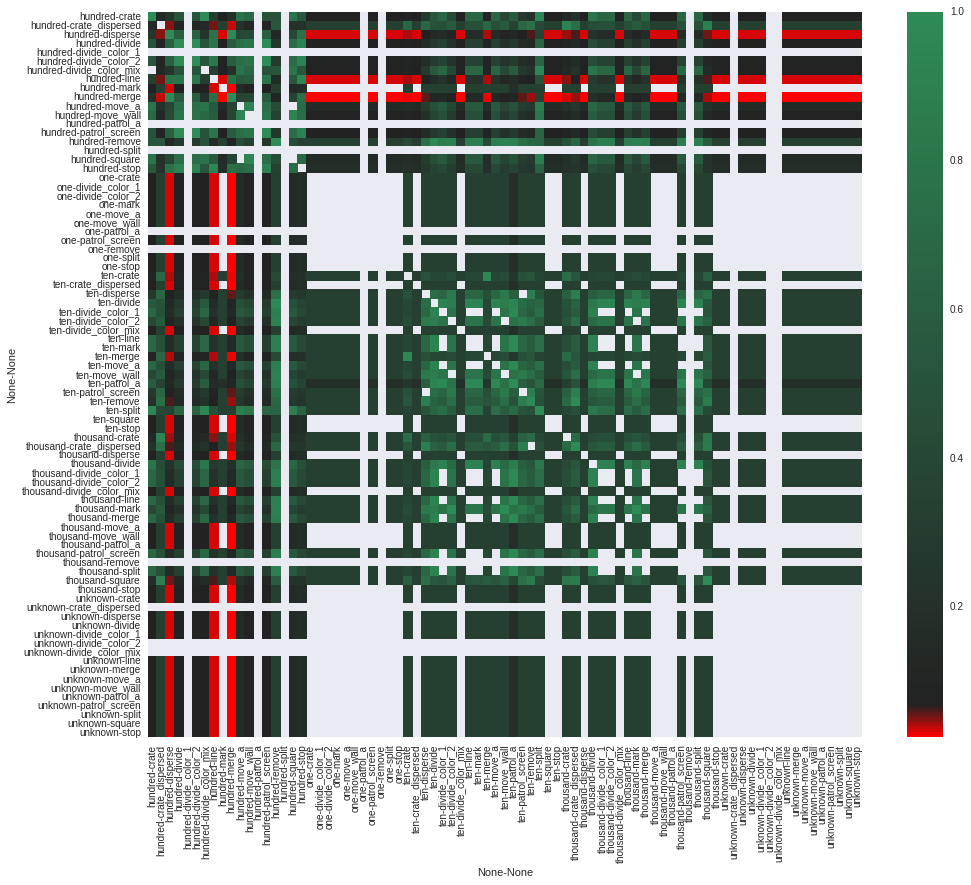

box


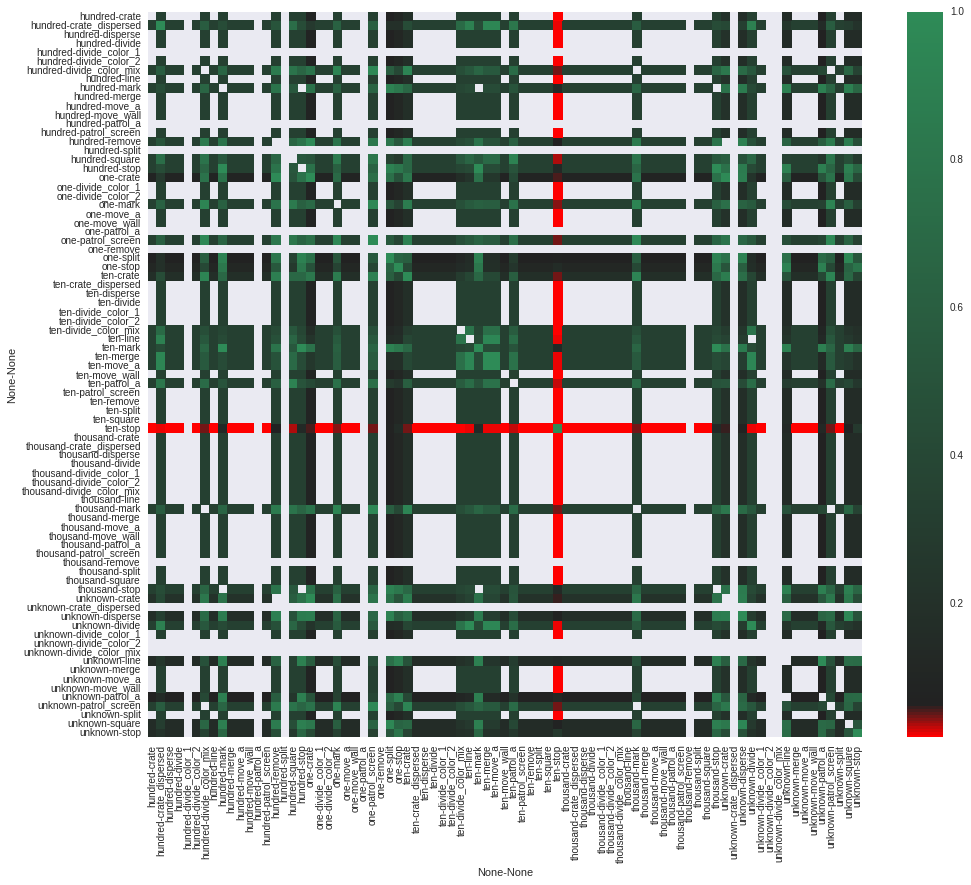

doubletap


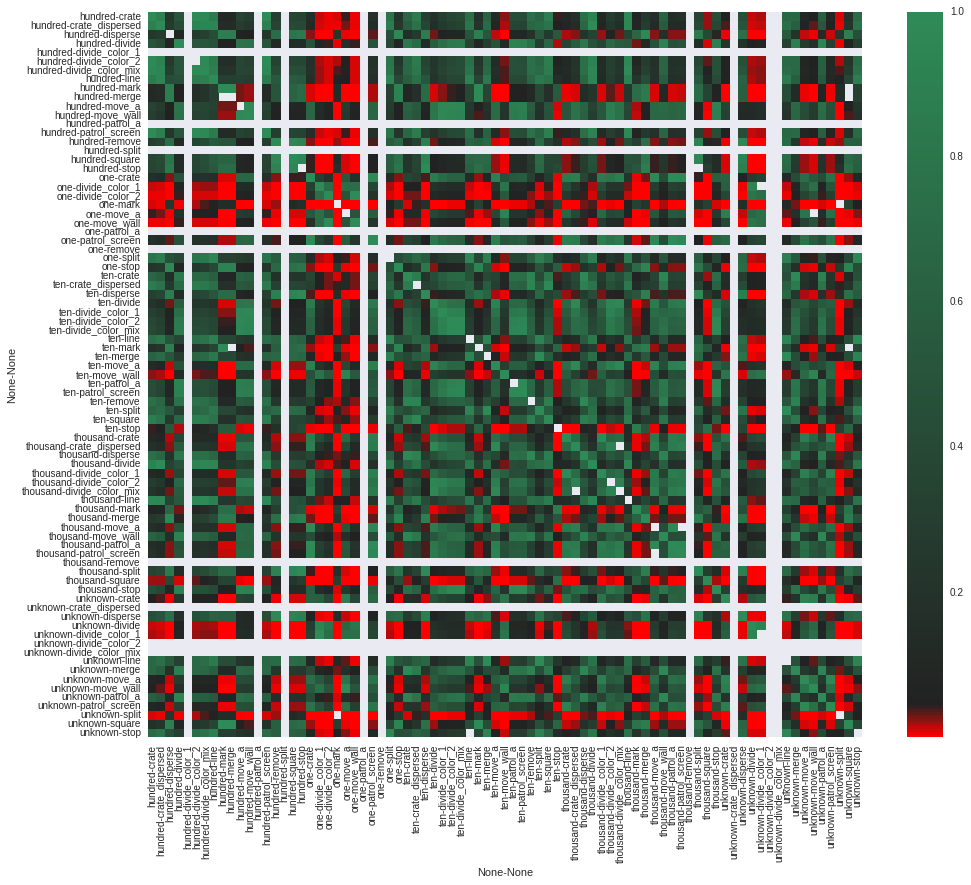

drag


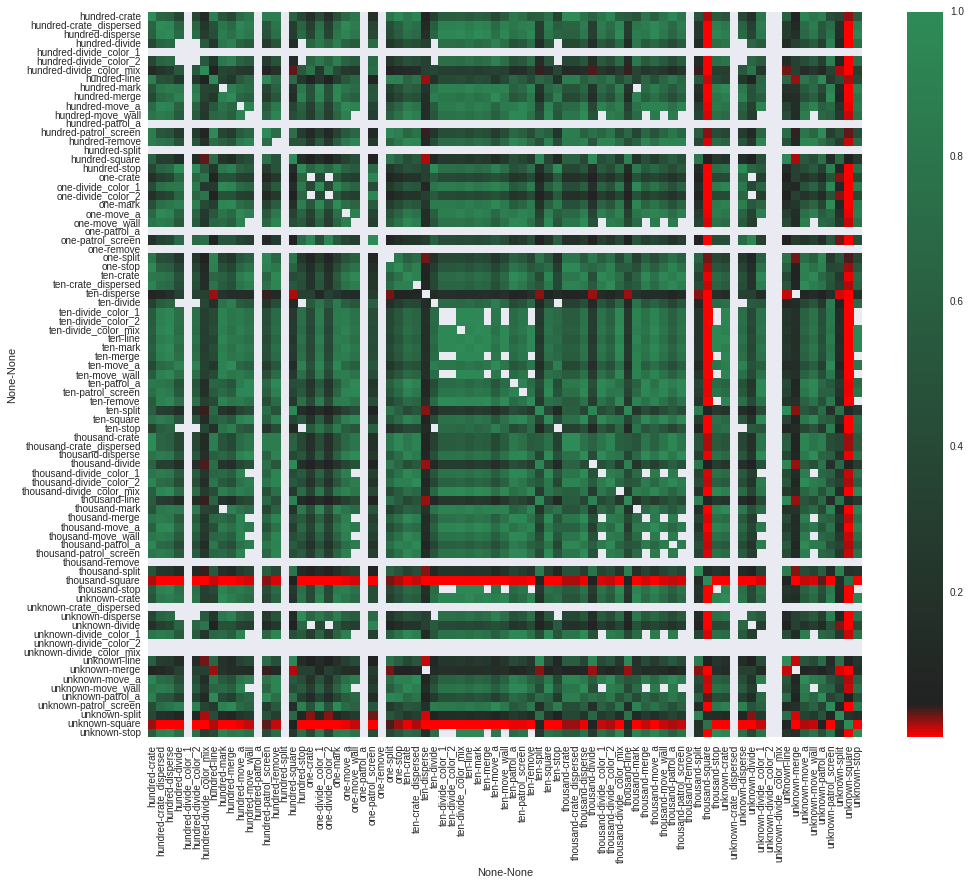

draw


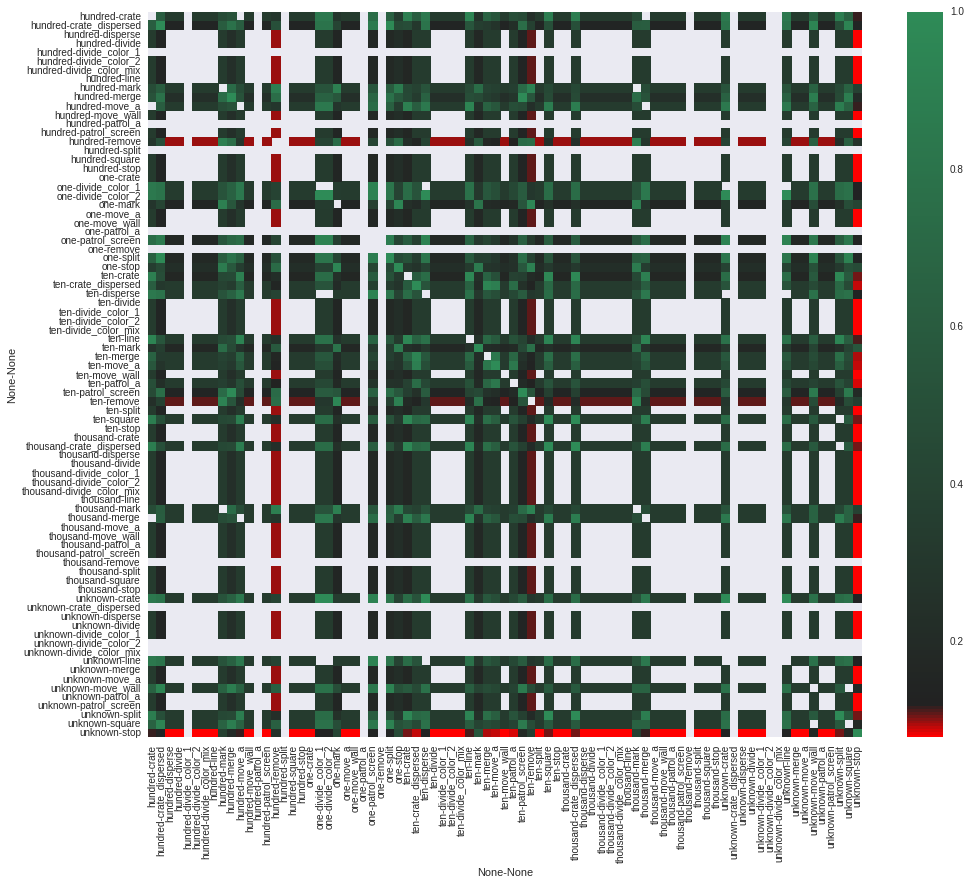

hold


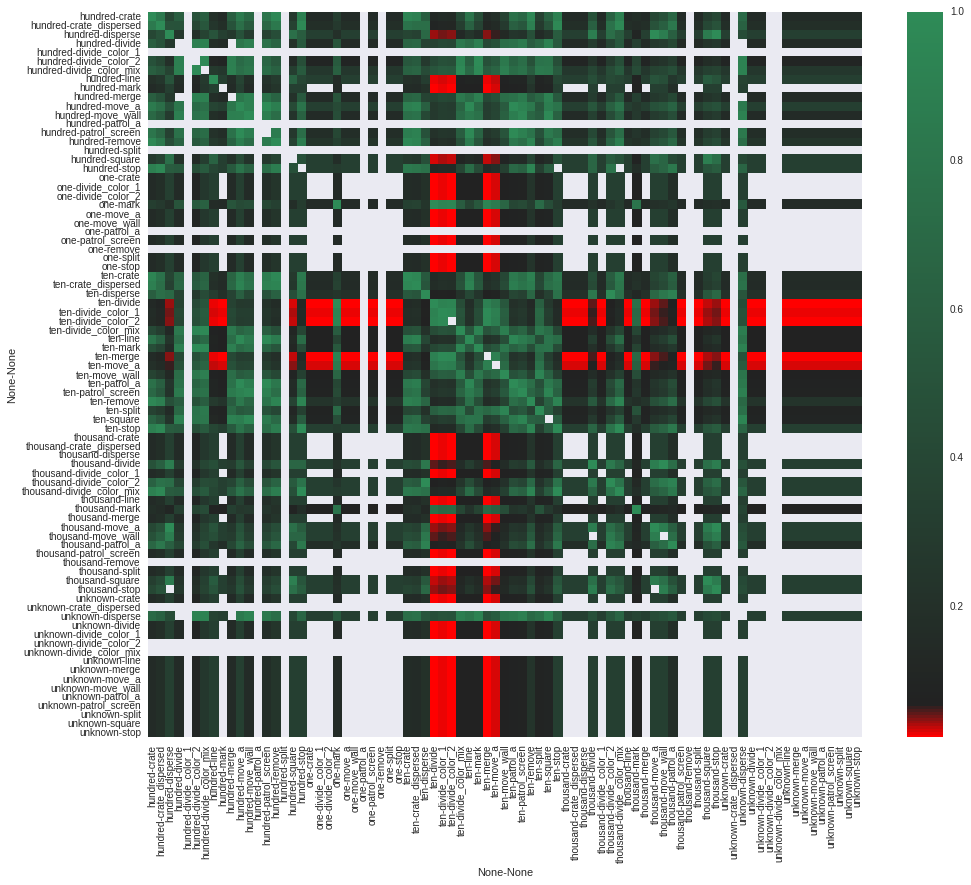

lasso


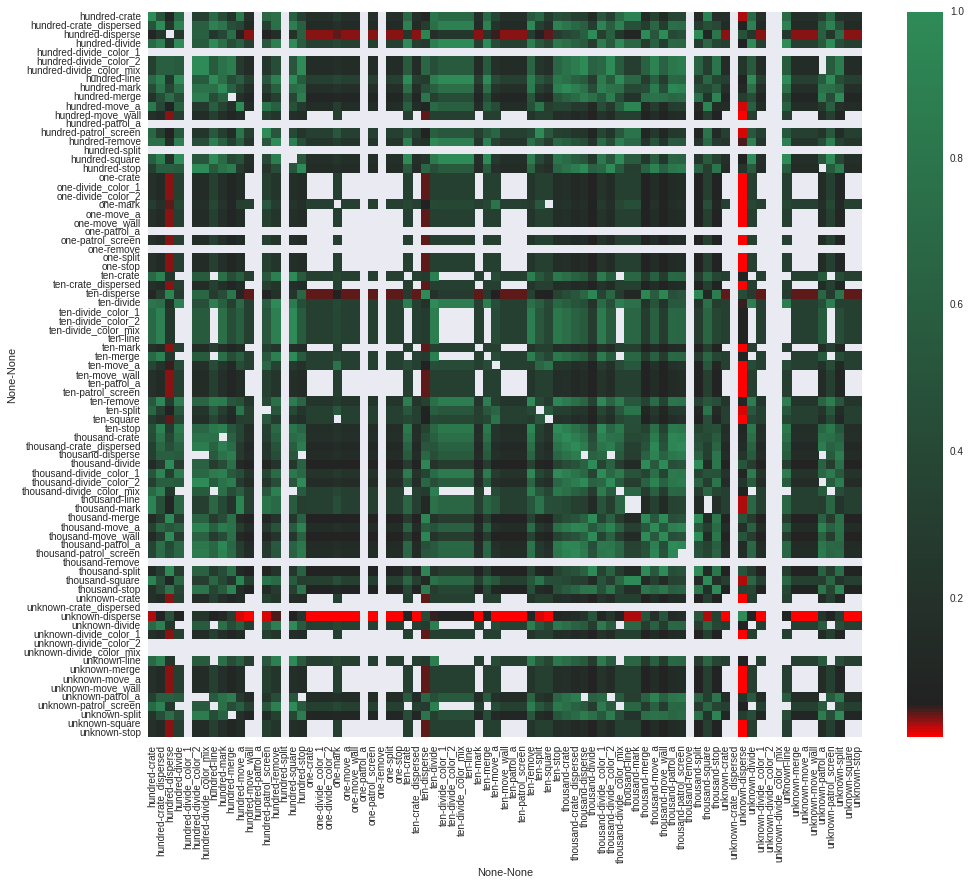

other


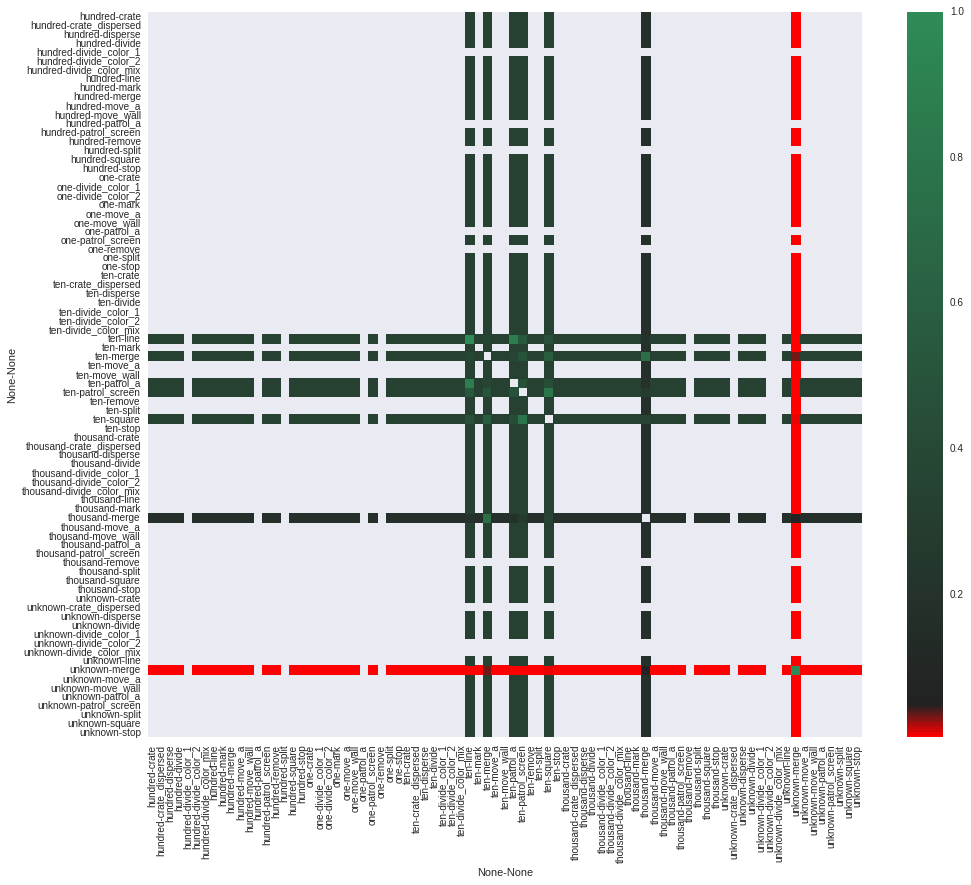

pinch


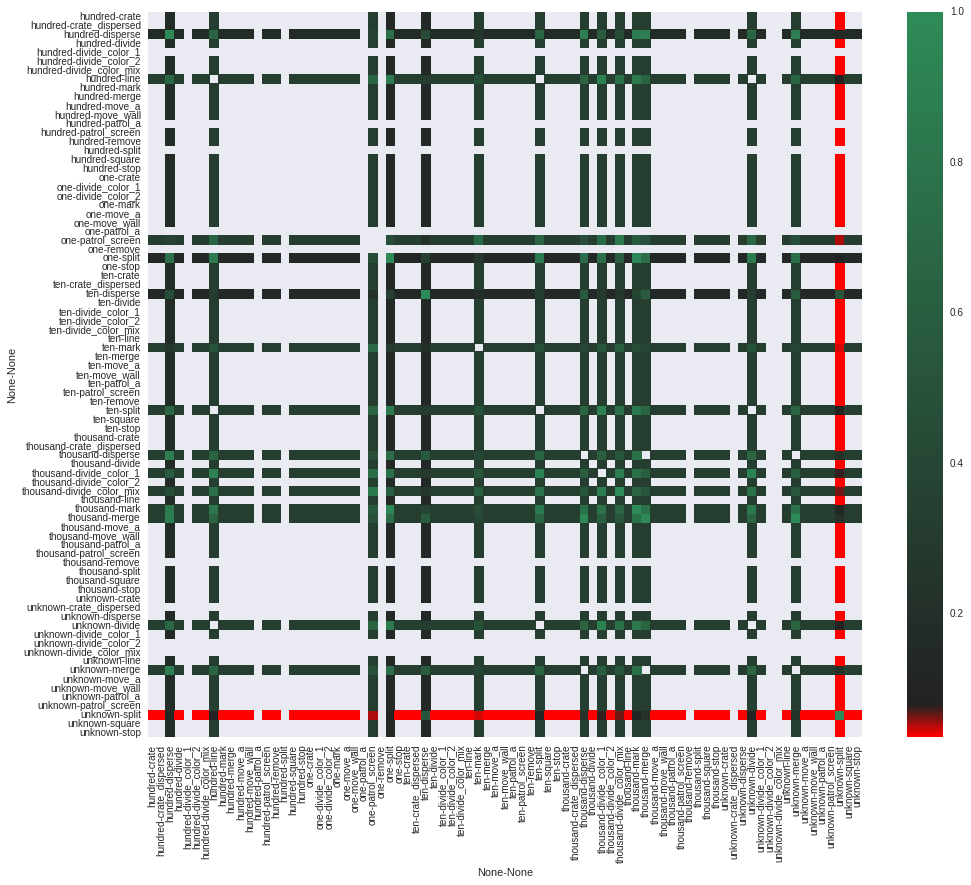

rev_pinch


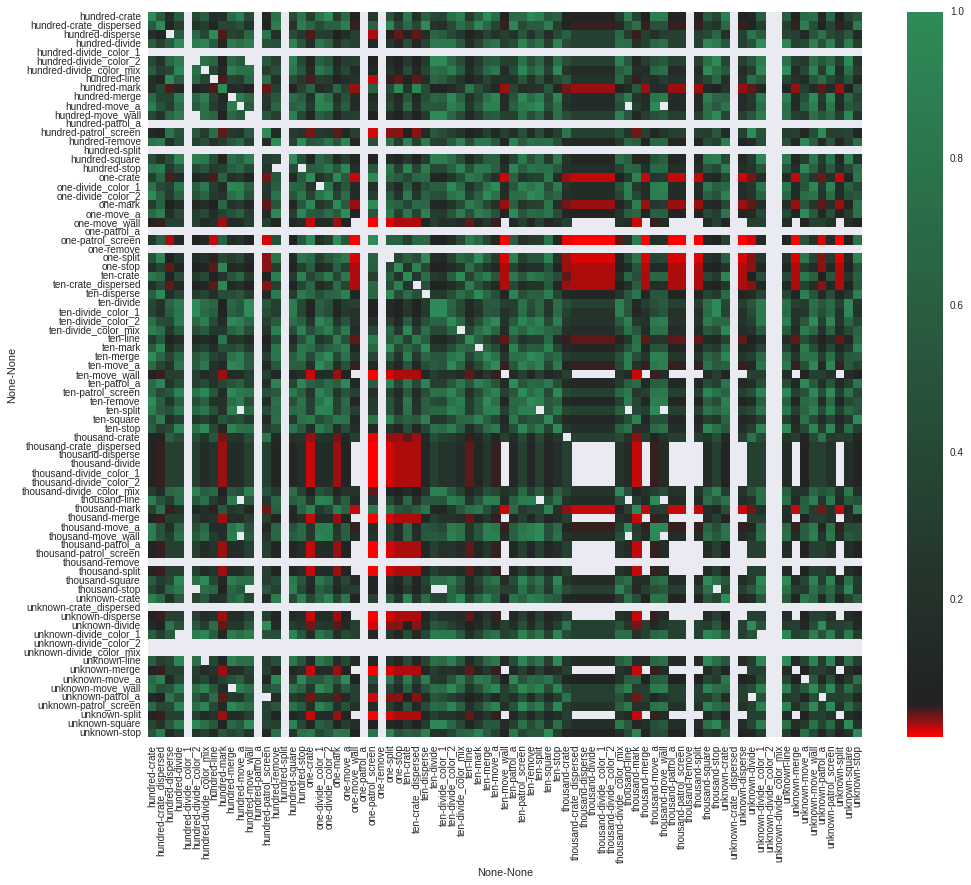

tap


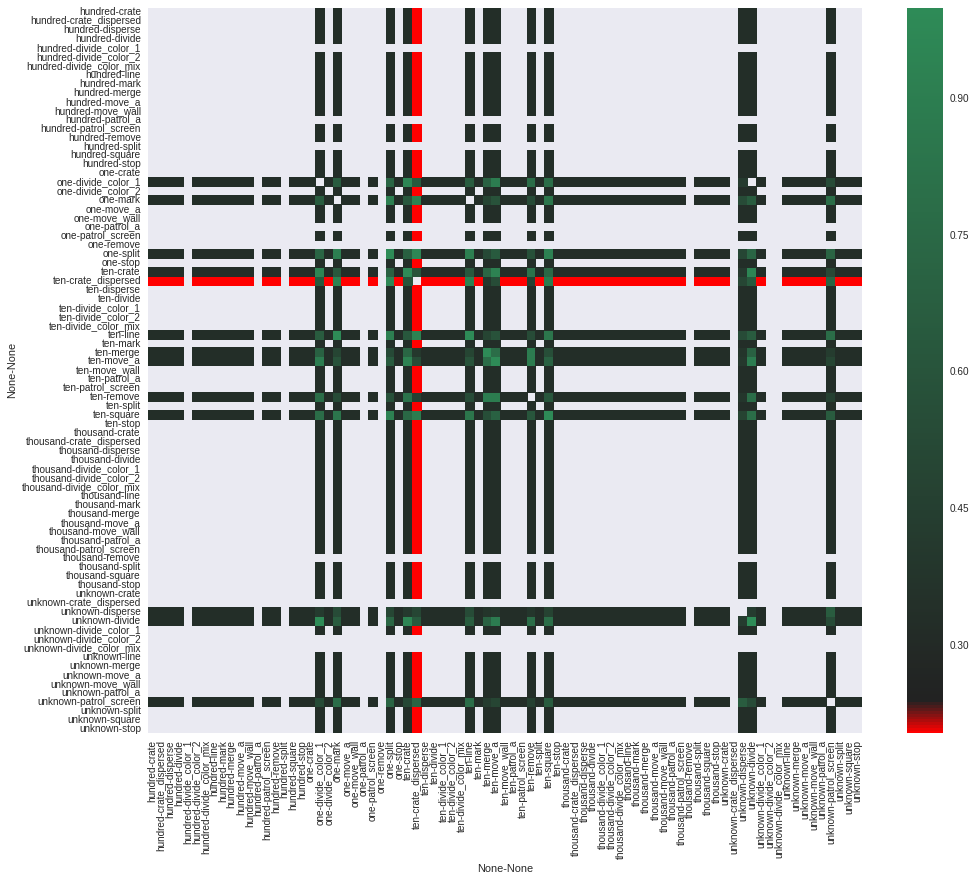

tripletap


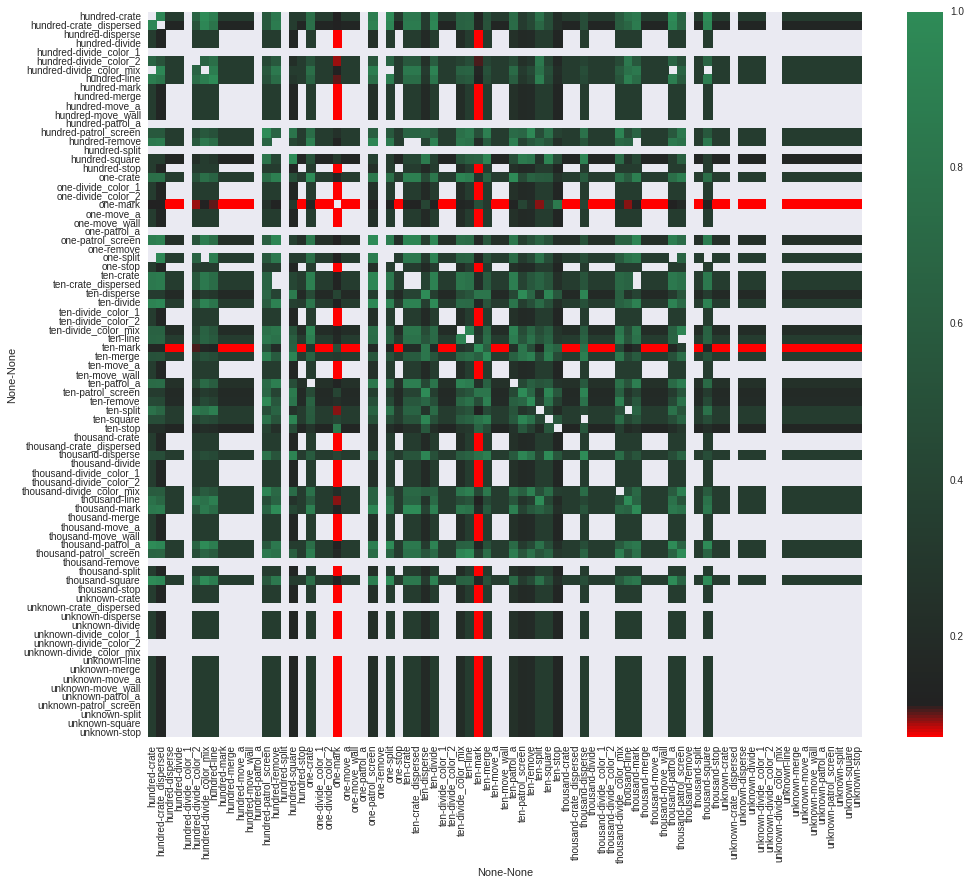

ui


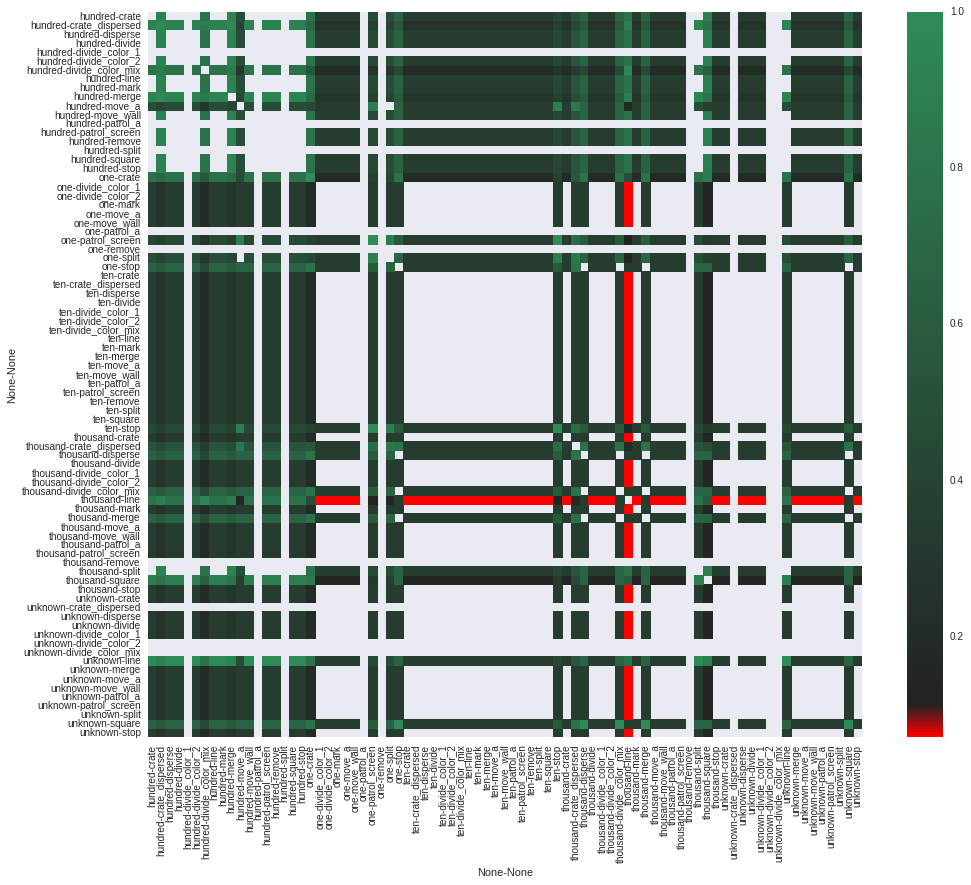

voice


In [17]:
for g in col_list:
    all_p_vals = {}
    #Outer index is condition, inner index is task
    for condition_a in per_task_df.groupby(['condition', 'task']):
        all_p_vals[condition_a[0][0], condition_a[0][1]] = {}
        #Outer index is condtition, inner is task, again, for the other axis
        for condition_b in per_task_df.groupby(['condition', 'task']):
            samples = [condition_a[1][g], condition_b[1][g]]
            f, p = ss.f_oneway(*samples)
            all_p_vals[(condition_a[0][0], condition_a[0][1])][(condition_b[0][0], condition_b[0][1])] = p


    #Load data into frame and plot it
    draw_p_vals = pandas.DataFrame(all_p_vals)
    sb.heatmap(draw_p_vals, cmap=cm)
    plt.show()
    print g


In [18]:
#Now let's get the non-normalized data
per_task_non_norm = pandas.DataFrame(adh.toPandas())
#and add the total gesture counts per user to it
col_list = list(per_task_non_norm)
col_list.remove("user")
col_list.remove("condition")
col_list.remove("task")
per_task_non_norm["total_gestures"] = per_task_non_norm[col_list].sum(axis=1)
per_task_non_norm = per_task_non_norm.set_index(['condition','task'])
#Get the sums of all gestures
total_gestures = per_task_non_norm.groupby('condition').sum()

In [19]:
total_gestures

,box,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,tripletap,ui,voice,total_gestures
condition,,,,,,,,,,,,,,
hundred,68,9,196,97,12,55,66,0,4,85,0,19,23,634
one,0,36,105,48,17,3,1,0,5,106,4,20,7,352
ten,26,26,414,97,23,107,34,18,16,237,12,63,1,1074
thousand,19,3,199,420,3,18,73,2,11,31,0,10,11,800
unknown,0,21,170,99,11,1,15,6,13,55,3,0,2,396


In [20]:
total_gestures[col_list] = total_gestures[col_list].div(total_gestures.total_gestures, axis=0)

In [21]:
total_gestures

,box,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,tripletap,ui,voice,total_gestures
condition,,,,,,,,,,,,,,
hundred,0.107256,0.014196,0.309148,0.152997,0.018927,0.086751,0.104101,0.000000,0.006309,0.134069,0.000000,0.029968,0.036278,634
one,0.000000,0.102273,0.298295,0.136364,0.048295,0.008523,0.002841,0.000000,0.014205,0.301136,0.011364,0.056818,0.019886,352
ten,0.024209,0.024209,0.385475,0.090317,0.021415,0.099628,0.031657,0.016760,0.014898,0.220670,0.011173,0.058659,0.000931,1074
thousand,0.023750,0.003750,0.248750,0.525000,0.003750,0.022500,0.091250,0.002500,0.013750,0.038750,0.000000,0.012500,0.013750,800
unknown,0.000000,0.053030,0.429293,0.250000,0.027778,0.002525,0.037879,0.015152,0.032828,0.138889,0.007576,0.000000,0.005051,396


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1165: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


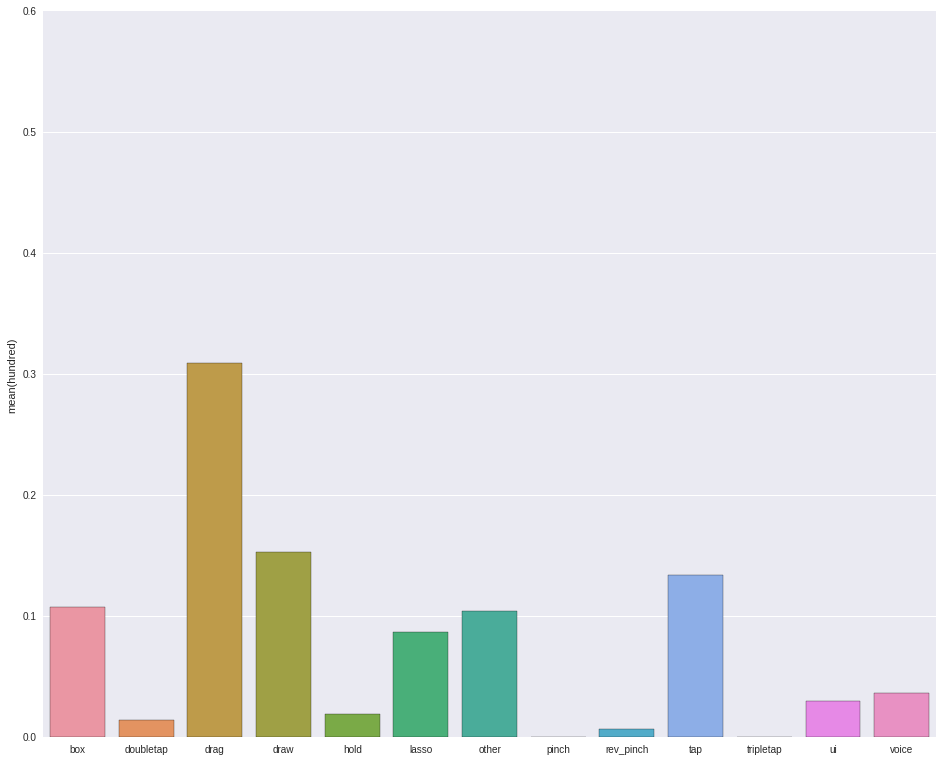

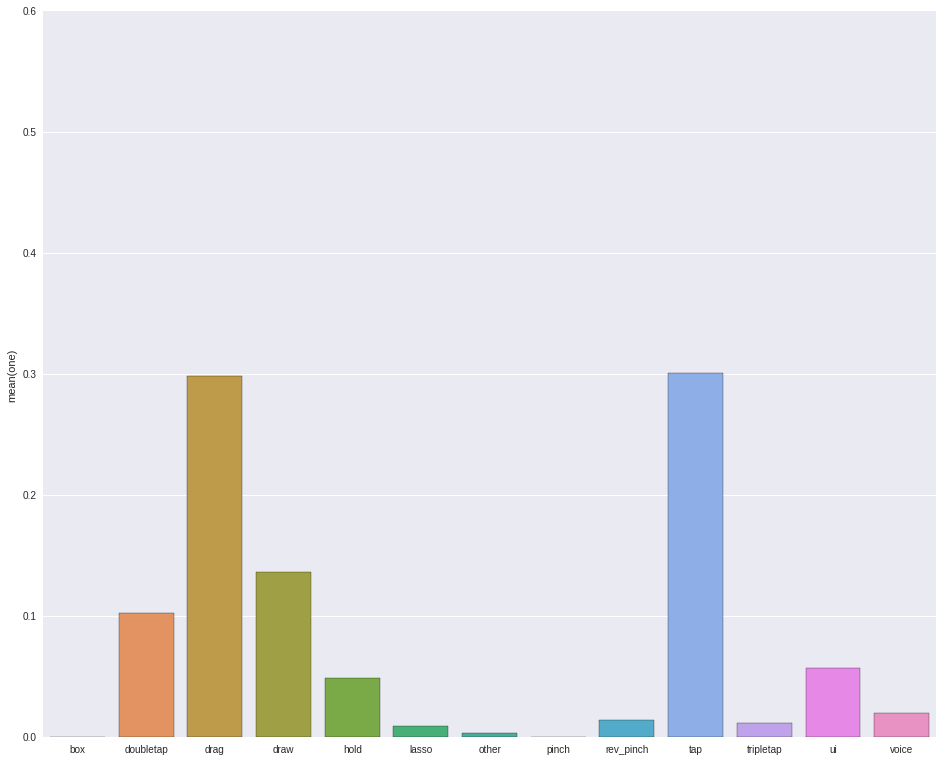

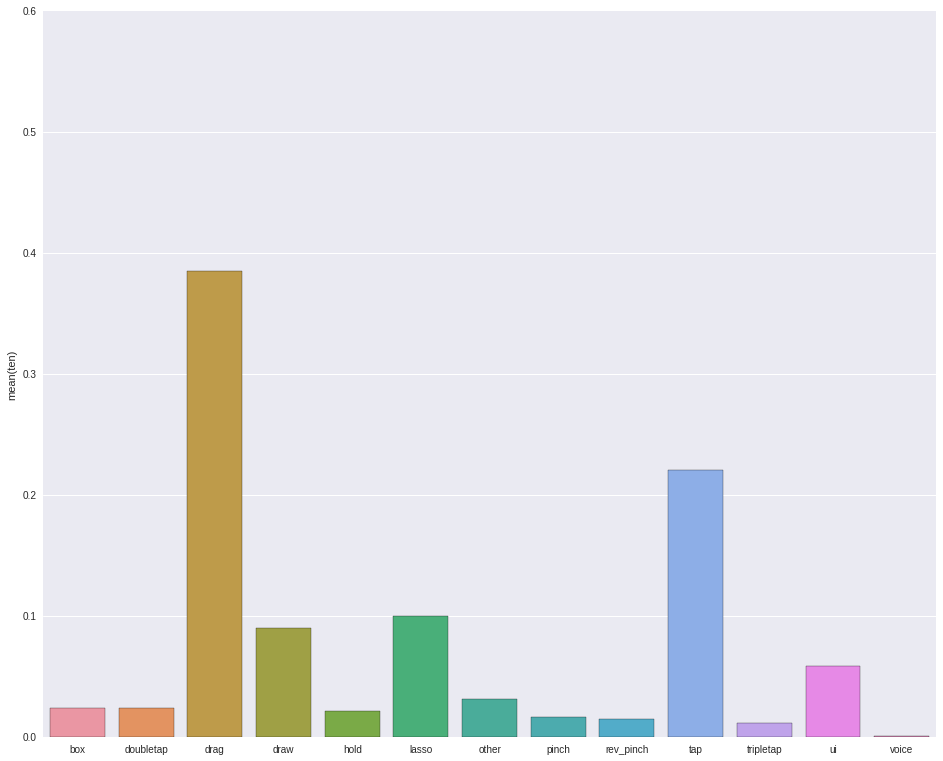

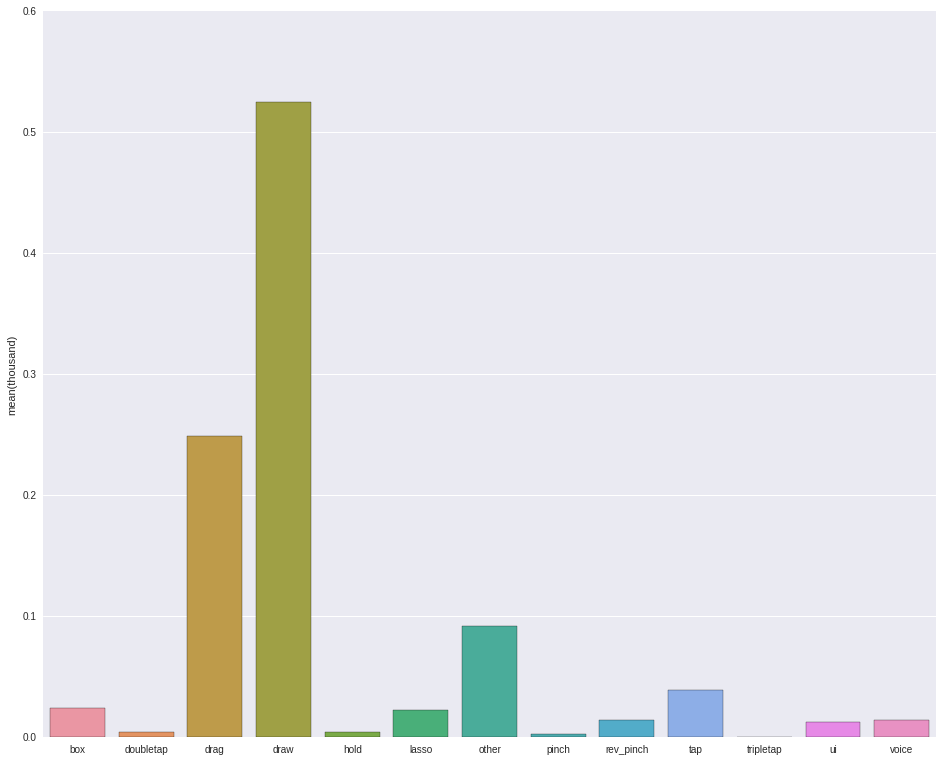

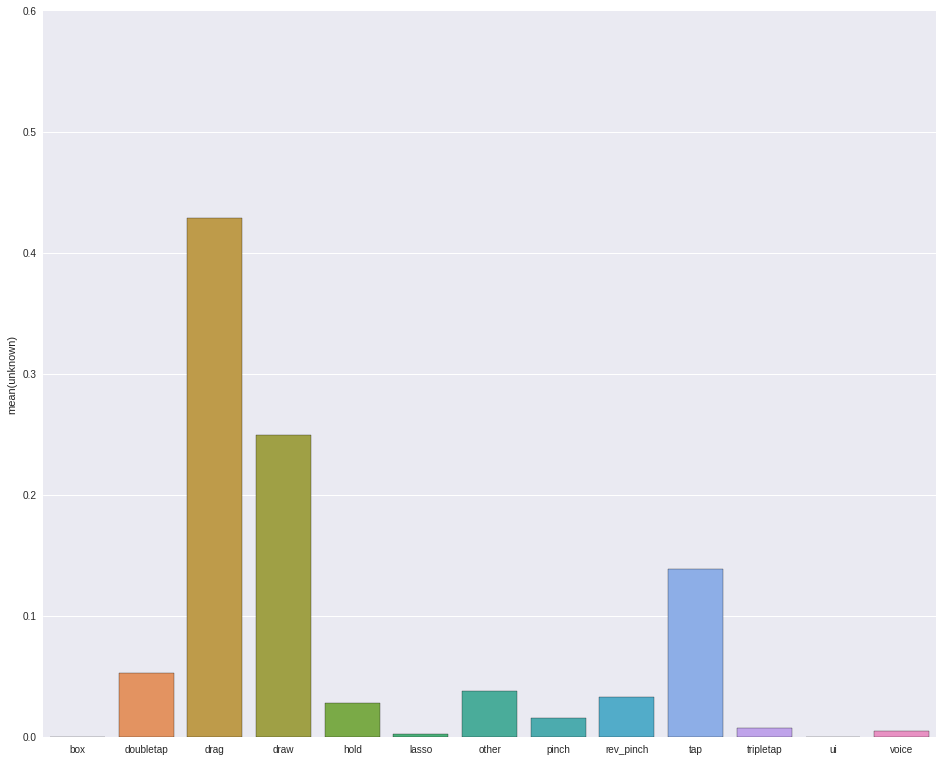

In [22]:
for condition in total_gestures.index:
    plt.ylim(0.0, 0.6)
    sb.barplot(x=col_list, y=total_gestures.loc[condition].drop("total_gestures"))
    plt.show()


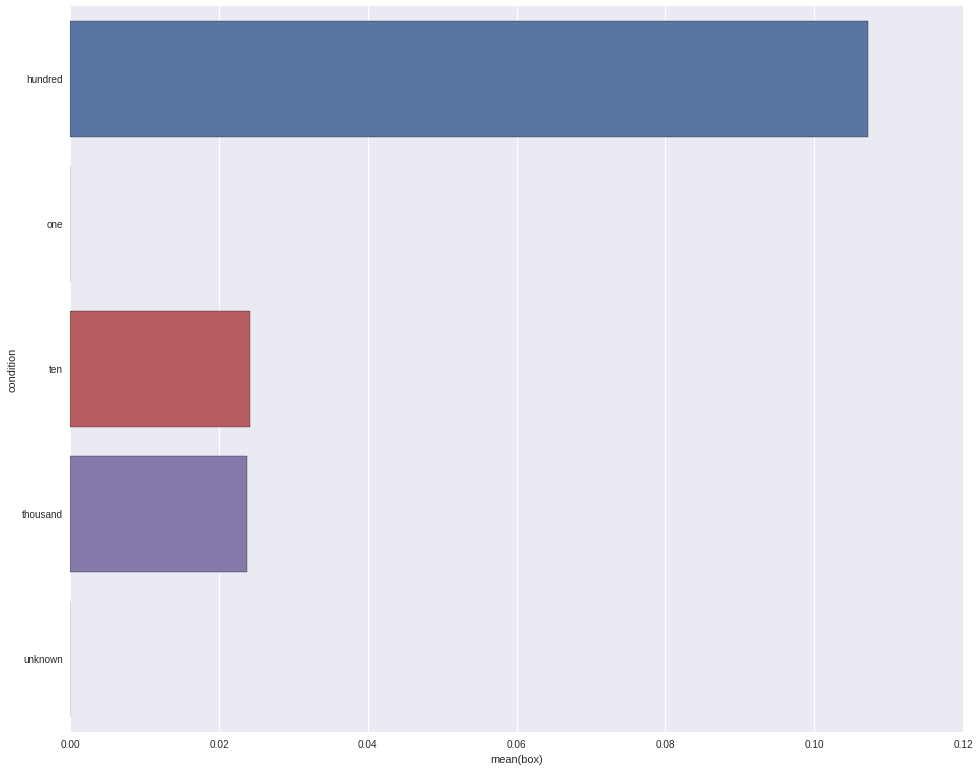

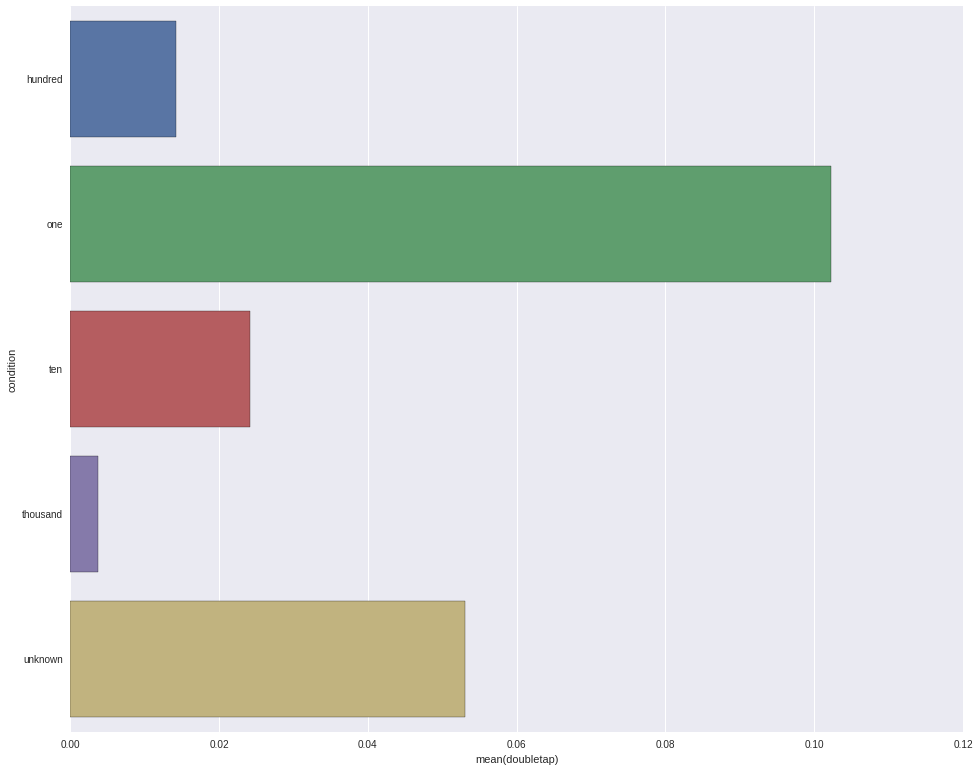

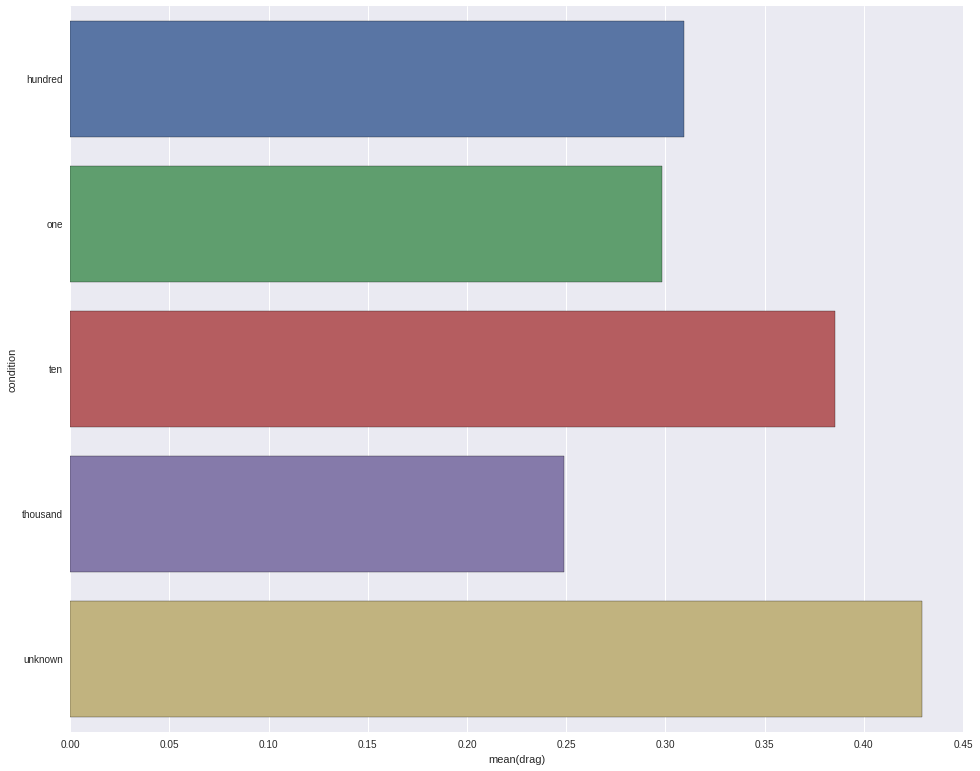

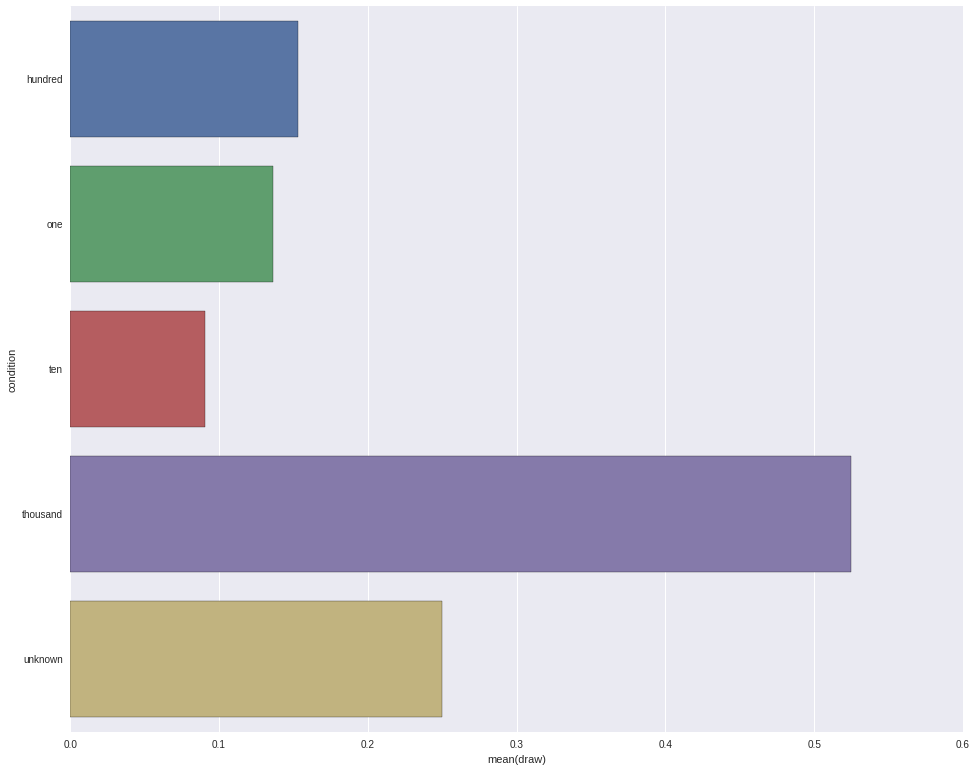

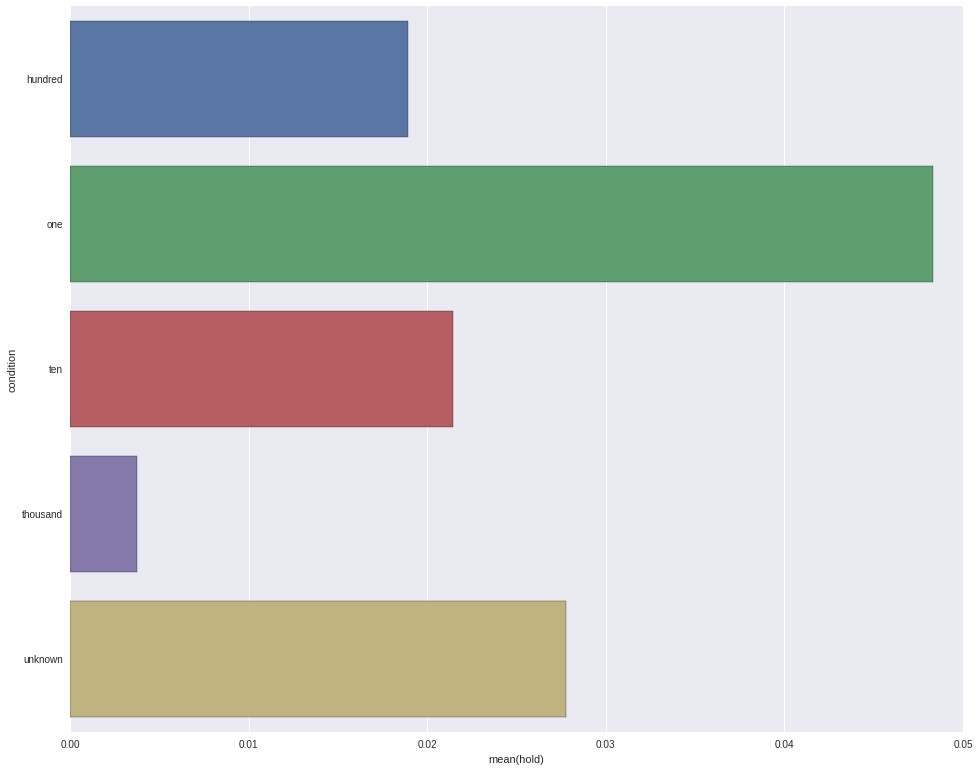

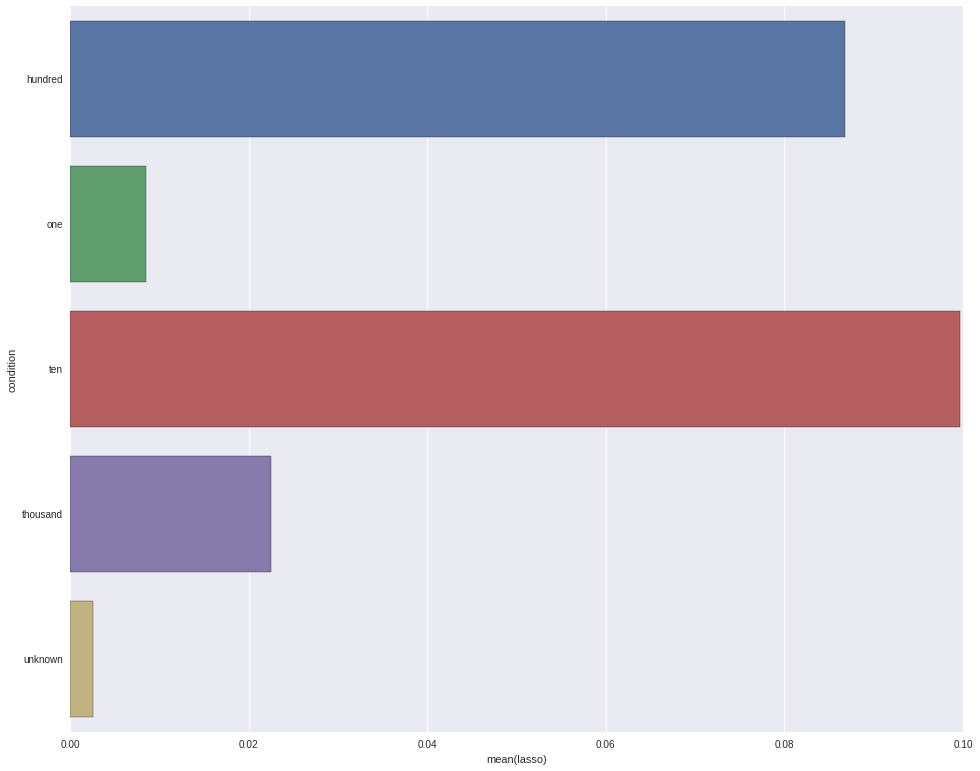

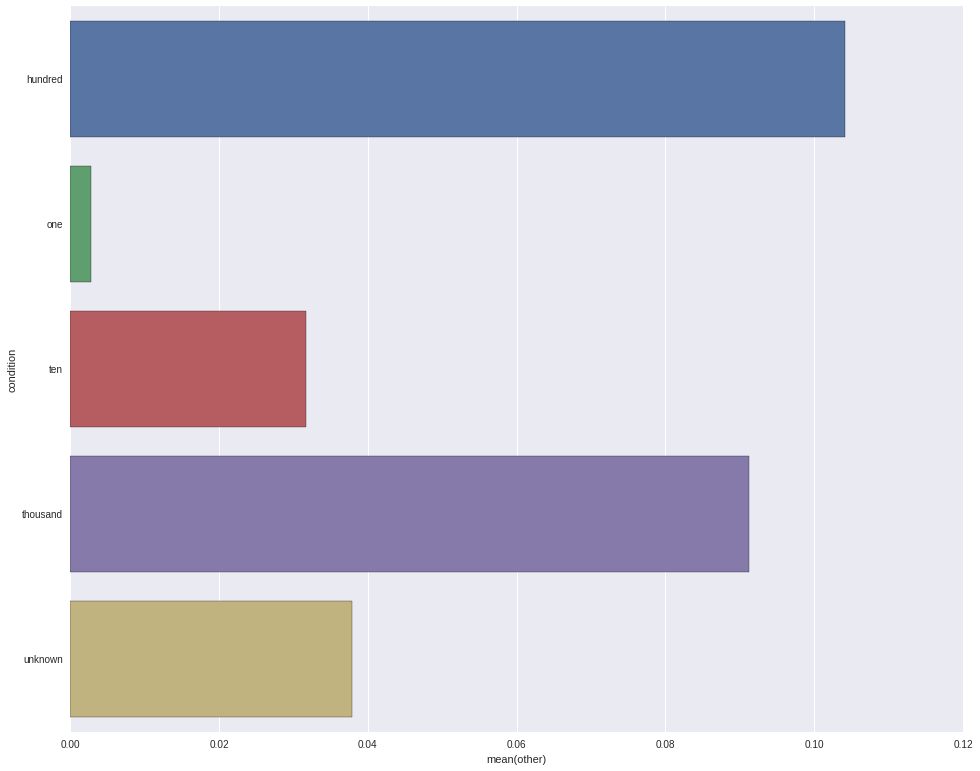

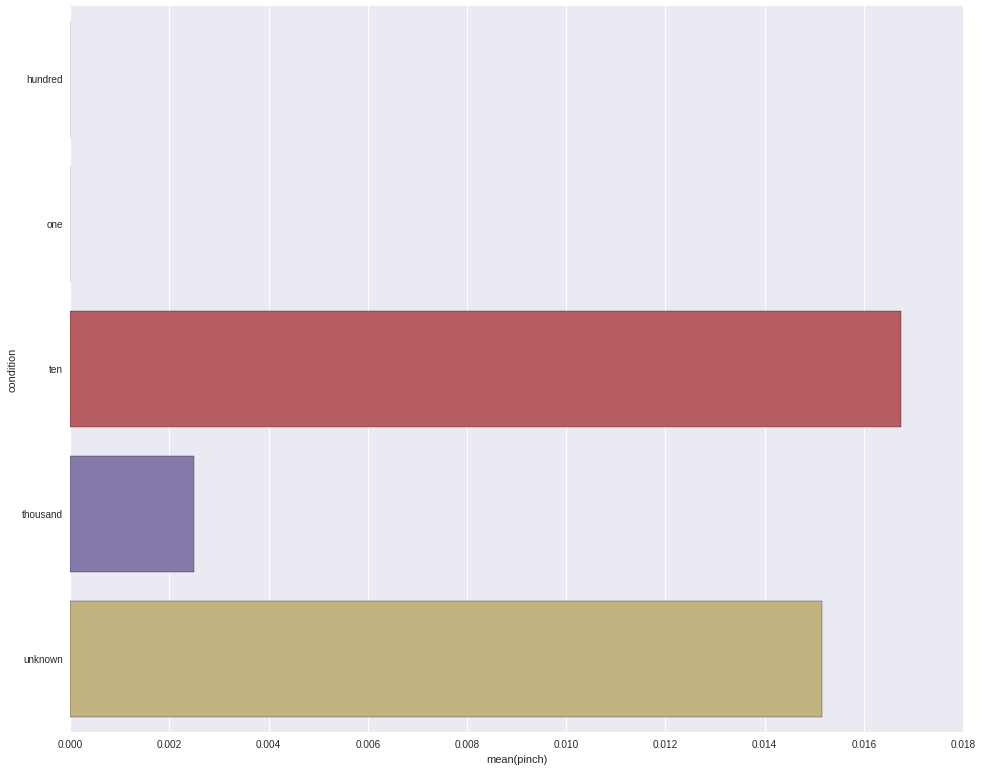

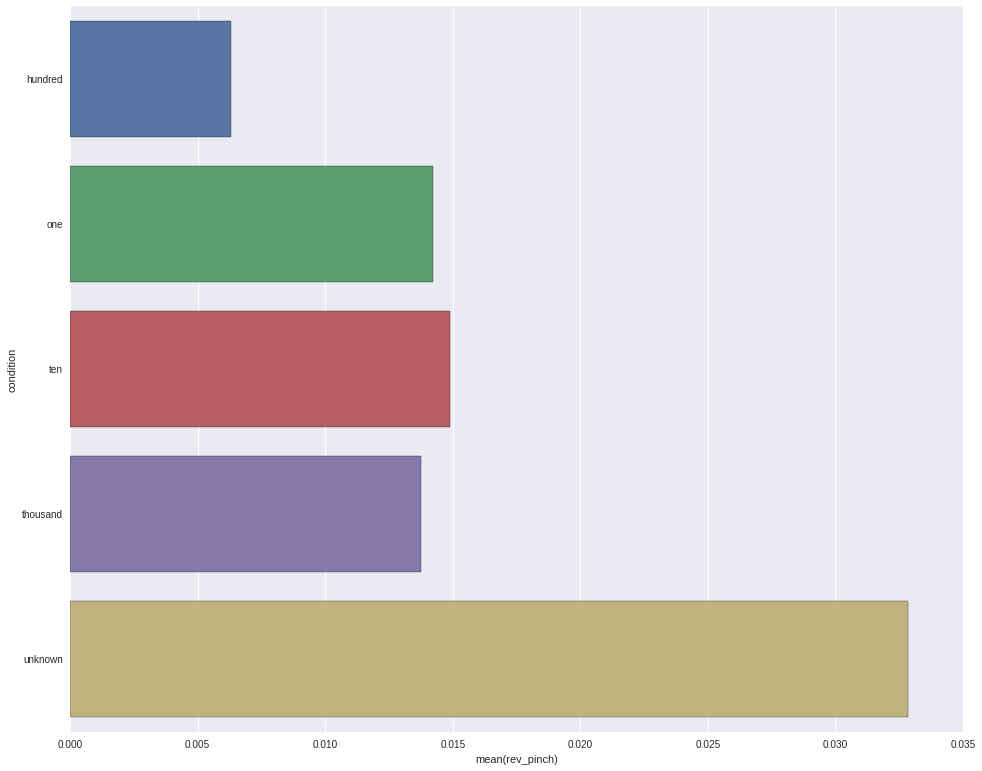

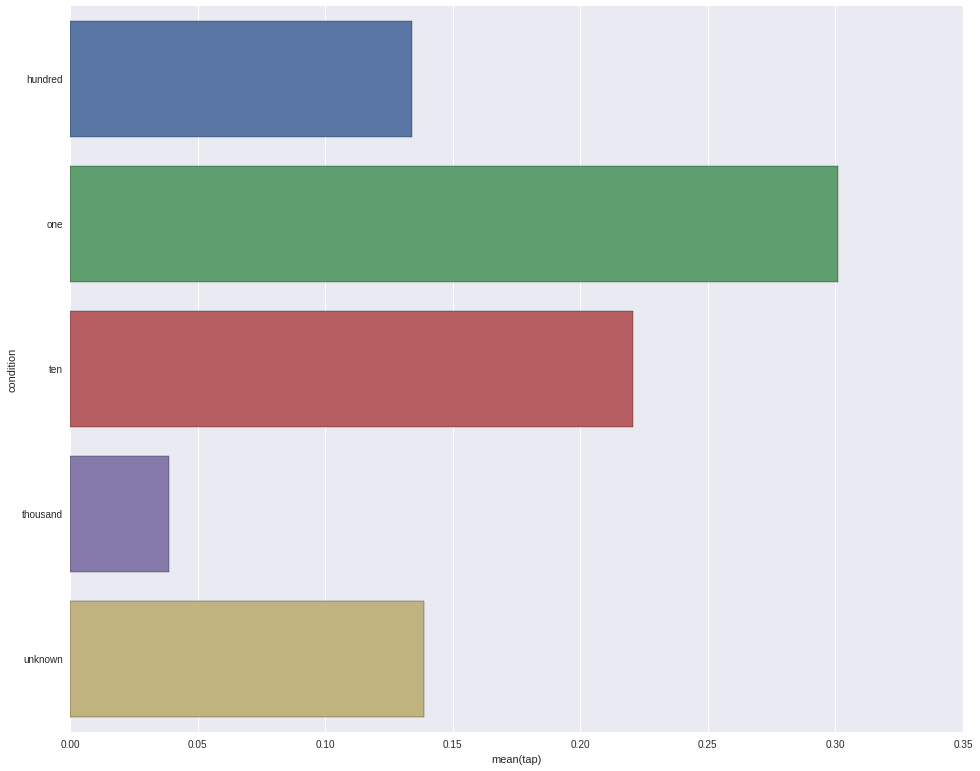

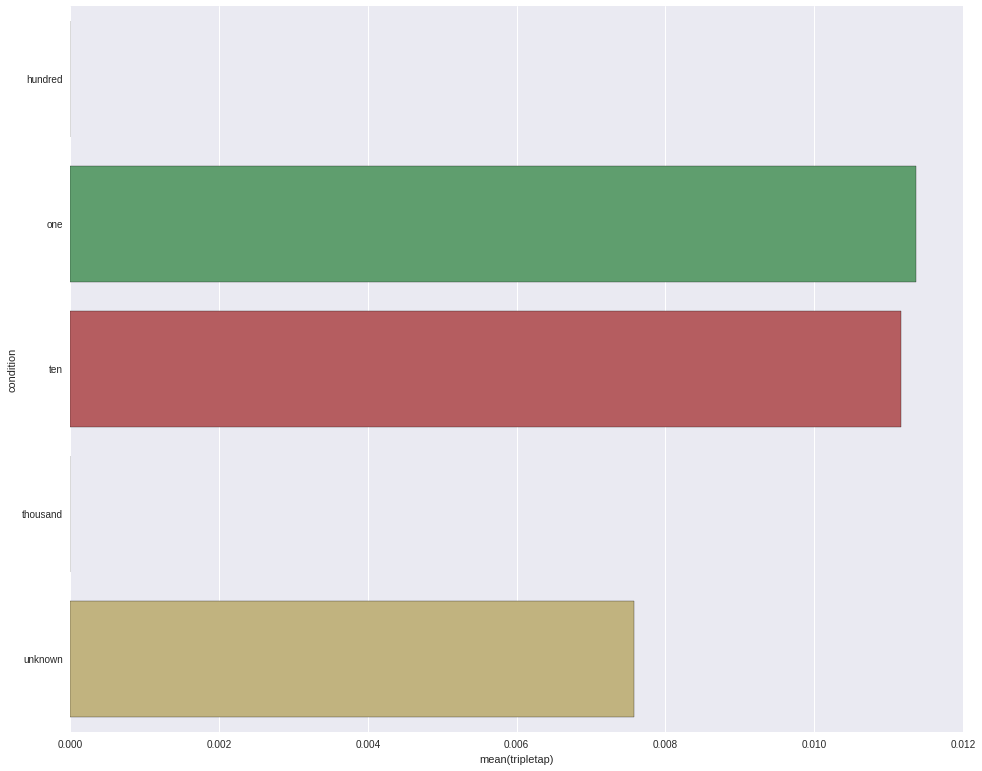

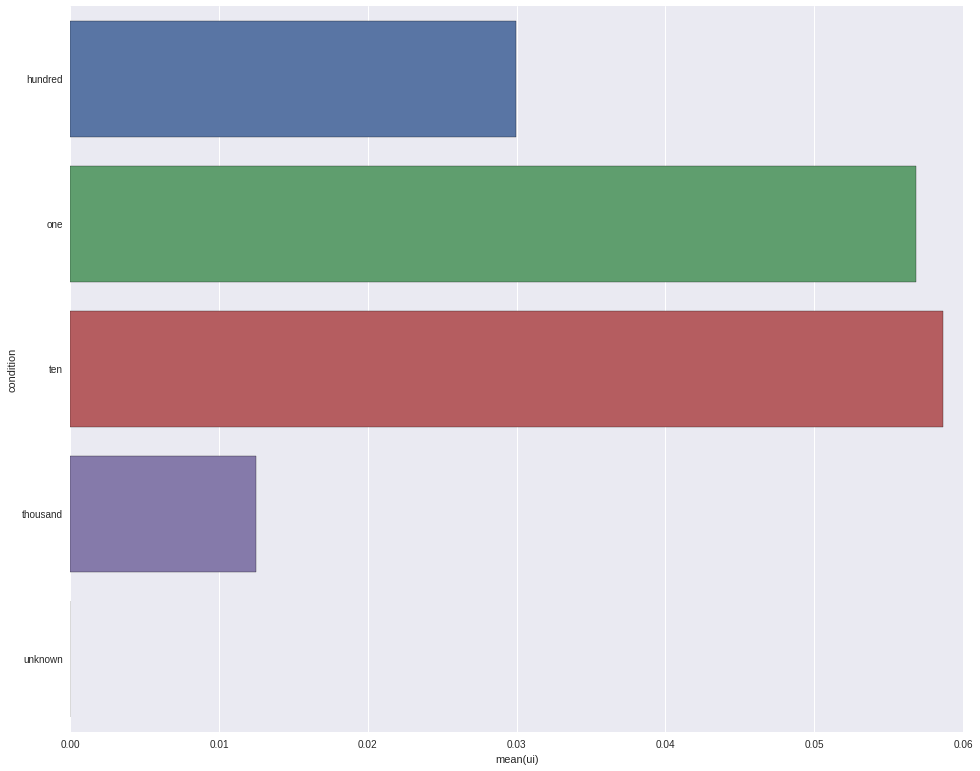

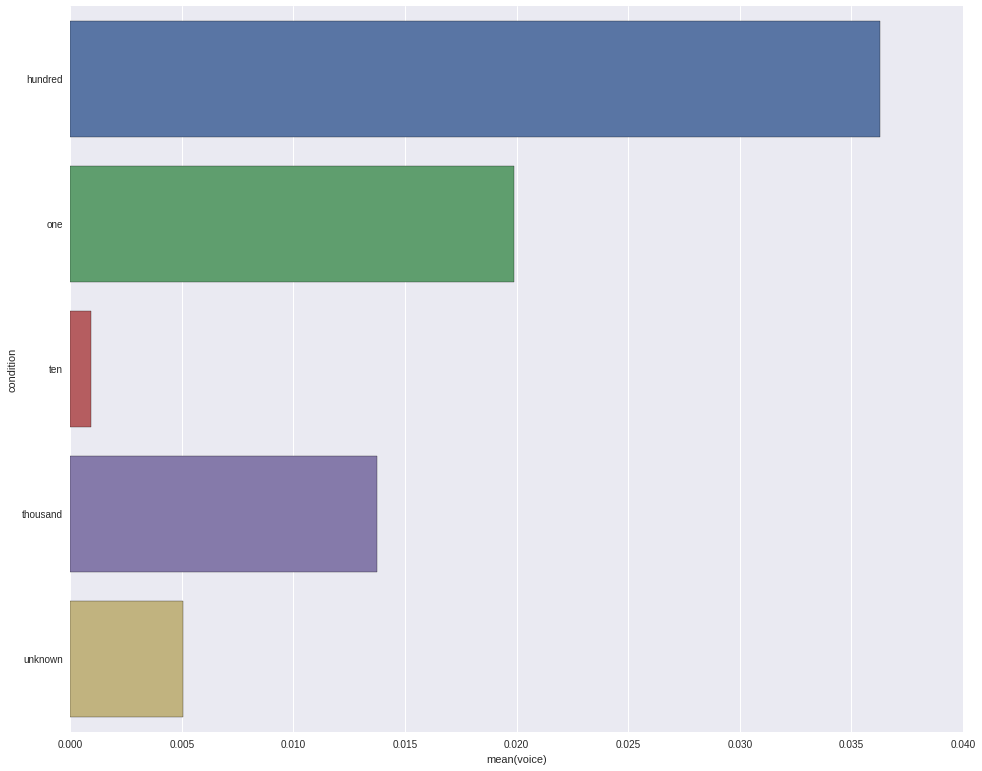

In [23]:
#Try plotting the gestures vs the condition instead of the other way around
plt.ylim(0.0, 0.6)
for gesture in col_list:
    sb.barplot(x = total_gestures[gesture], y = total_gestures.index)
    plt.show()

In [24]:

for a, b in itertools.combinations(total_gestures.index, 2):
    f, p = ss.f_oneway(total_gestures.loc[a].drop("total_gestures"), total_gestures.loc[b].drop("total_gestures"))
    print a, b, p

hundred one nan
hundred ten 1.0
hundred thousand nan
hundred unknown 1.0
one ten nan
one thousand nan
one unknown nan
ten thousand 1.0
ten unknown nan
thousand unknown 1.0


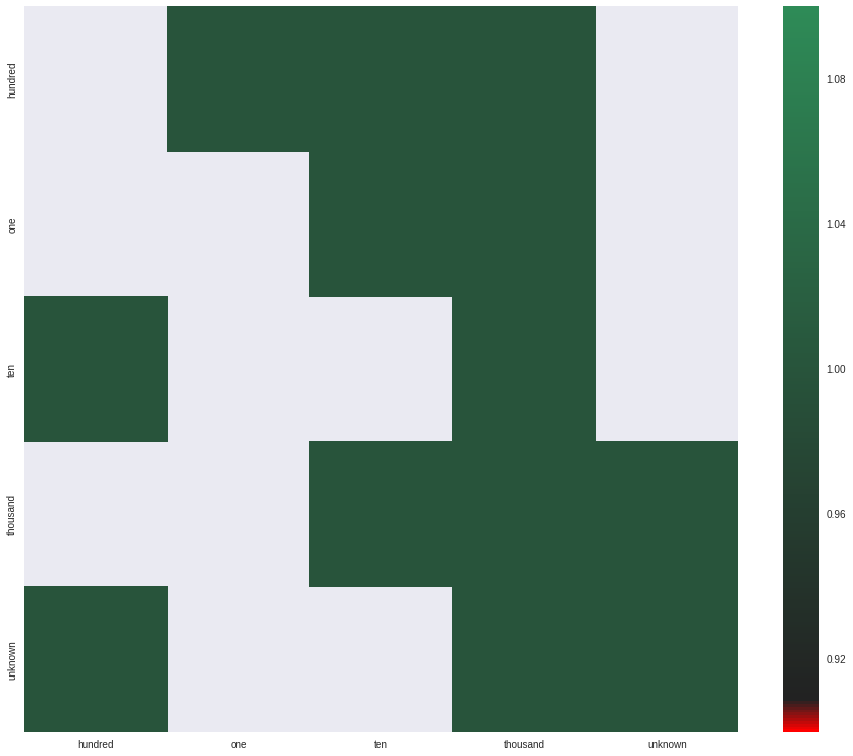

In [25]:
all_p_vals = {}
for a in total_gestures.index:
    all_p_vals[a]={}
    for b in total_gestures.index:
        f, p = ss.f_oneway(*[total_gestures.loc[a].drop("total_gestures"), total_gestures.loc[b].drop("total_gestures")])
        all_p_vals[a][b] = p
#Load data into frame and plot it
draw_p_vals = pandas.DataFrame(all_p_vals)
sb.heatmap(draw_p_vals, cmap=cm)

In [26]:
per_task_df

,box,condition,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,task,tripletap,ui,user,voice,total_gestures
0,0.000000,one,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,patrol_a,0.000000,0.000000,42,0.5,2
1,0.000000,one,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.600000,patrol_screen,0.000000,0.000000,42,0.2,5
2,0.000000,one,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.666667,move_a,0.000000,0.000000,42,0.0,6
3,0.000000,one,0.125000,0.125000,0.375000,0.250000,0.000000,0.000000,0.0,0.000000,0.125000,stop,0.000000,0.000000,42,0.0,8
4,0.000000,one,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,move_wall,0.000000,0.000000,42,0.0,1
5,0.000000,one,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,divide_color_2,0.000000,0.000000,42,0.0,4
6,0.000000,one,0.000000,0.666667,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,divide_color_1,0.166667,0.000000,42,0.0,6
7,0.000000,one,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.571429,crate,0.000000,0.000000,42,0.0,7
8,0.000000,one,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.285714,0.428571,split,0.285714,0.000000,42,0.0,7
9,0.000000,one,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,remove,0.000000,0.000000,42,0.0,2


In [27]:
idexed = per_task_df.set_index(['condition','task'])

crate [box]: Nothing statistically significant for a = 0.05
crate [doubletap]: Nothing statistically significant for a = 0.05
crate [drag]: Nothing statistically significant for a = 0.05
crate [draw]: Nothing statistically significant for a = 0.05
crate [hold]: Nothing statistically significant for a = 0.05
crate [lasso]: Nothing statistically significant for a = 0.05
crate [other]: Nothing statistically significant for a = 0.05
crate [pinch]: No use of this gesture to draw.
crate [rev_pinch]: No use of this gesture to draw.


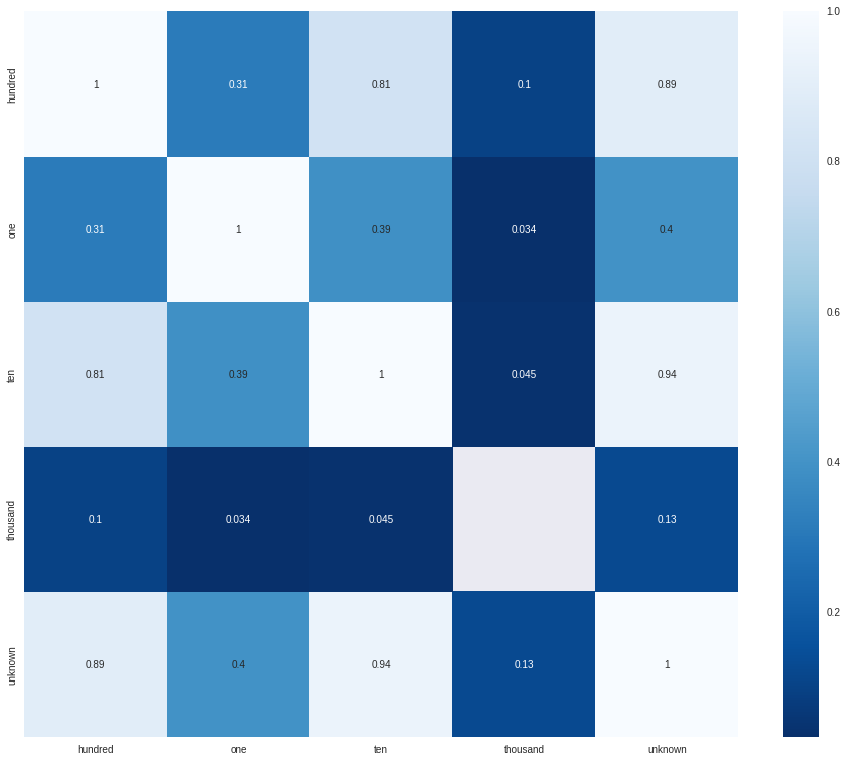

crate [tap]
crate [tripletap]: Nothing statistically significant for a = 0.05
crate [ui]: Nothing statistically significant for a = 0.05
crate [voice]: Nothing statistically significant for a = 0.05
crate_dispersed [box]: Nothing statistically significant for a = 0.05
crate_dispersed [doubletap]: Nothing statistically significant for a = 0.05
crate_dispersed [drag]: Nothing statistically significant for a = 0.05
crate_dispersed [draw]: Nothing statistically significant for a = 0.05
crate_dispersed [hold]: Nothing statistically significant for a = 0.05
crate_dispersed [lasso]: Nothing statistically significant for a = 0.05
crate_dispersed [other]: Nothing statistically significant for a = 0.05
crate_dispersed [pinch]: No use of this gesture to draw.
crate_dispersed [rev_pinch]: No use of this gesture to draw.


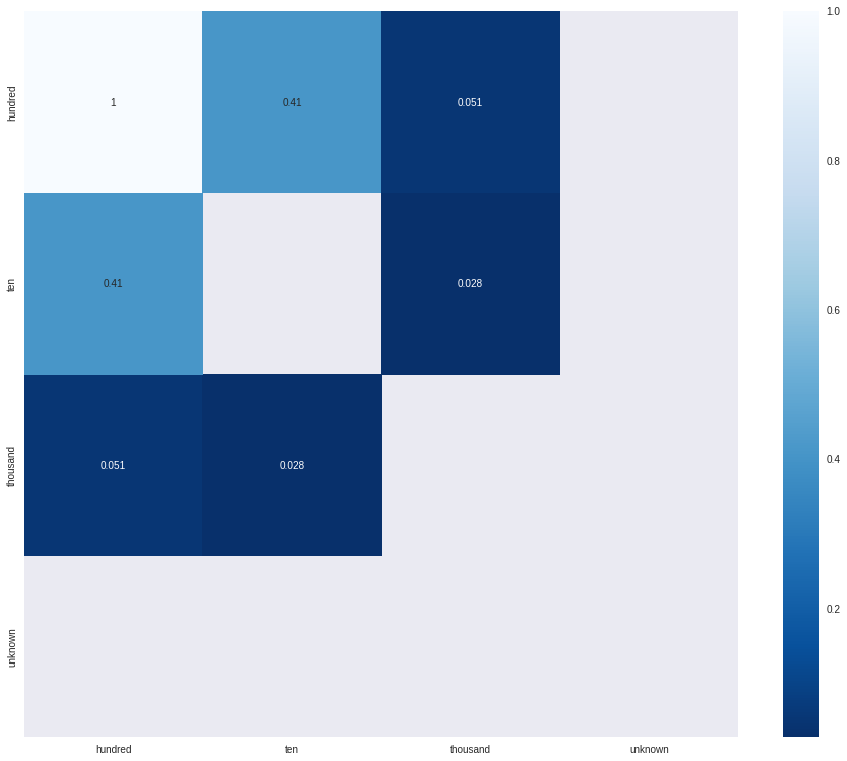

crate_dispersed [tap]
crate_dispersed [tripletap]: Nothing statistically significant for a = 0.05
crate_dispersed [ui]: Nothing statistically significant for a = 0.05
crate_dispersed [voice]: Nothing statistically significant for a = 0.05


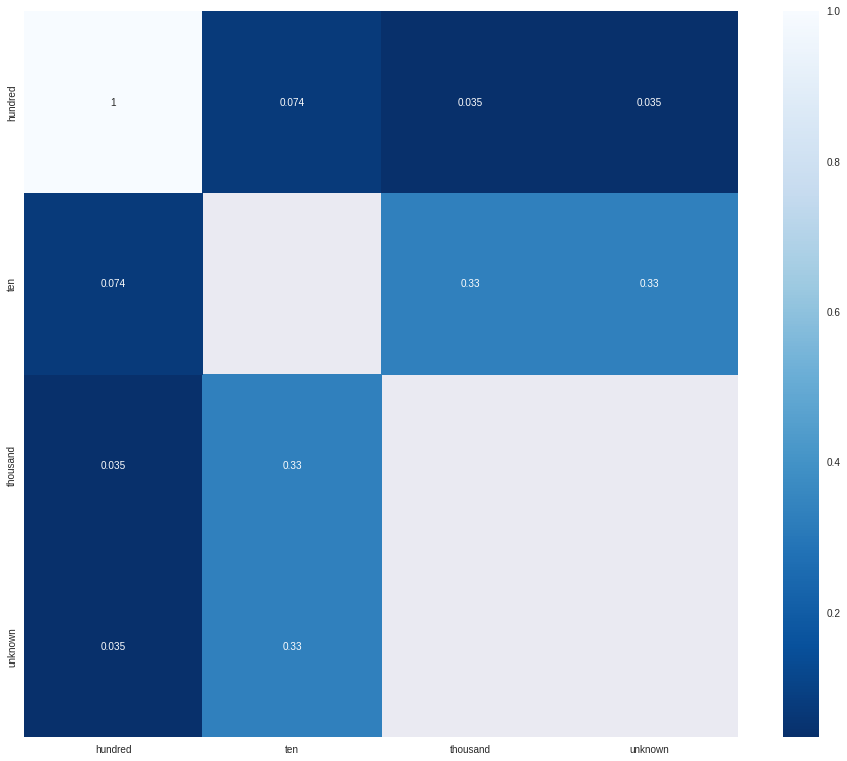

disperse [box]
disperse [doubletap]: Nothing statistically significant for a = 0.05
disperse [drag]: Nothing statistically significant for a = 0.05
disperse [draw]: Nothing statistically significant for a = 0.05
disperse [hold]: Nothing statistically significant for a = 0.05
disperse [lasso]: Nothing statistically significant for a = 0.05
disperse [other]: Nothing statistically significant for a = 0.05
disperse [pinch]: No use of this gesture to draw.
disperse [rev_pinch]: Nothing statistically significant for a = 0.05
disperse [tap]: Nothing statistically significant for a = 0.05
disperse [tripletap]: Nothing statistically significant for a = 0.05
disperse [ui]: Nothing statistically significant for a = 0.05
disperse [voice]: Nothing statistically significant for a = 0.05
divide [box]: Nothing statistically significant for a = 0.05
divide [doubletap]: Nothing statistically significant for a = 0.05


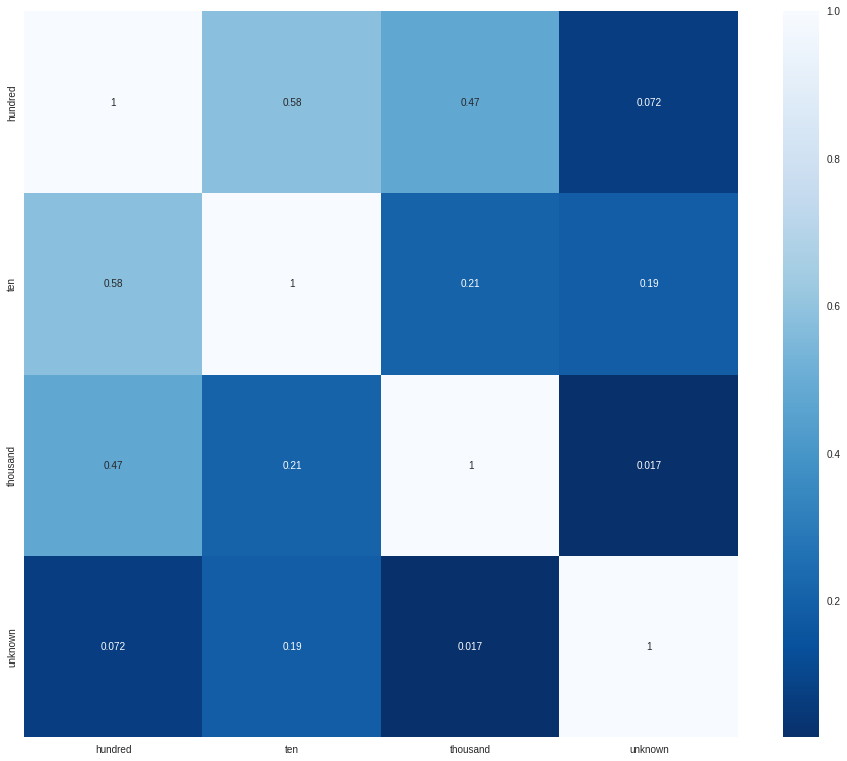

divide [drag]
divide [draw]: Nothing statistically significant for a = 0.05
divide [hold]: No use of this gesture to draw.


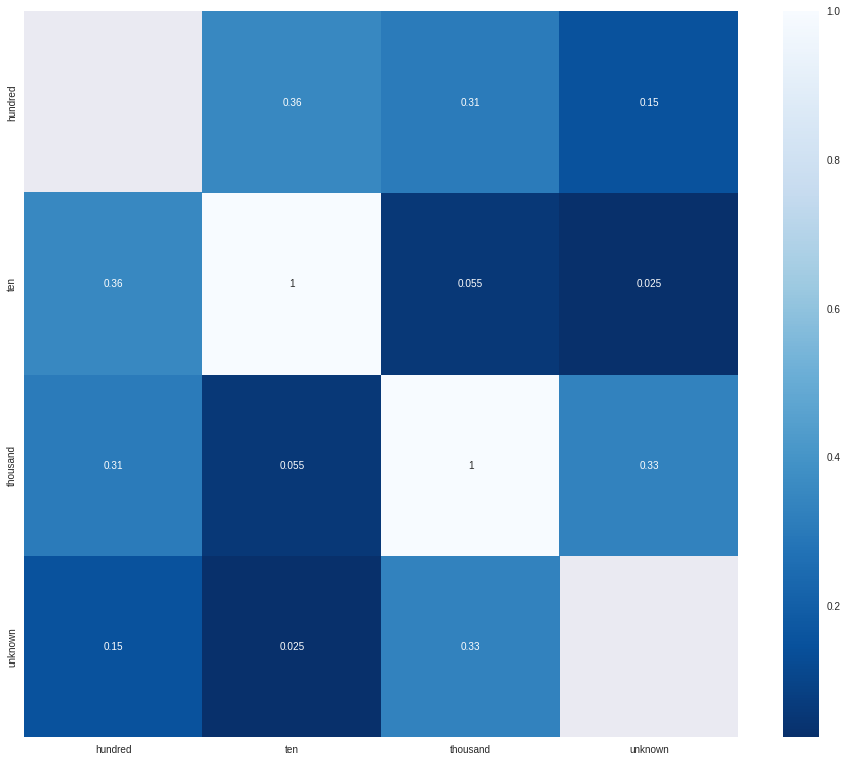

divide [lasso]
divide [other]: Nothing statistically significant for a = 0.05
divide [pinch]: No use of this gesture to draw.
divide [rev_pinch]: Nothing statistically significant for a = 0.05
divide [tap]: Nothing statistically significant for a = 0.05
divide [tripletap]: Nothing statistically significant for a = 0.05
divide [ui]: Nothing statistically significant for a = 0.05
divide [voice]: Nothing statistically significant for a = 0.05
divide_color_1 [box]: Nothing statistically significant for a = 0.05
divide_color_1 [doubletap]: No use of this gesture to draw.
divide_color_1 [drag]: Nothing statistically significant for a = 0.05
divide_color_1 [draw]: Nothing statistically significant for a = 0.05
divide_color_1 [hold]: Nothing statistically significant for a = 0.05


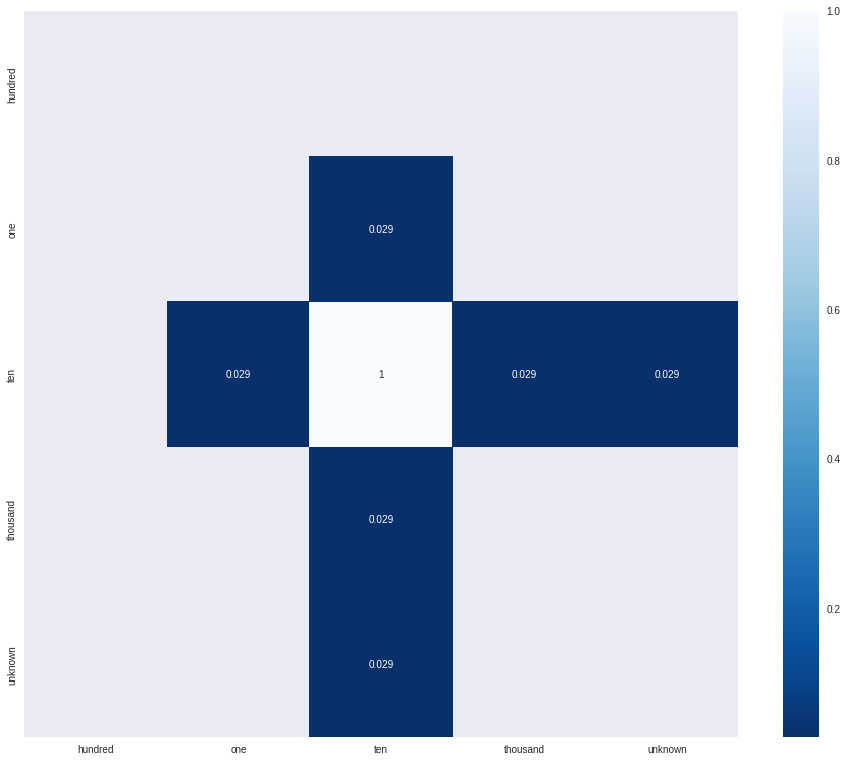

divide_color_1 [lasso]
divide_color_1 [other]: Nothing statistically significant for a = 0.05
divide_color_1 [pinch]: No use of this gesture to draw.
divide_color_1 [rev_pinch]: Nothing statistically significant for a = 0.05
divide_color_1 [tap]: Nothing statistically significant for a = 0.05
divide_color_1 [tripletap]: Nothing statistically significant for a = 0.05
divide_color_1 [ui]: No use of this gesture to draw.
divide_color_1 [voice]: No use of this gesture to draw.
divide_color_2 [box]: Nothing statistically significant for a = 0.05
divide_color_2 [doubletap]: No use of this gesture to draw.


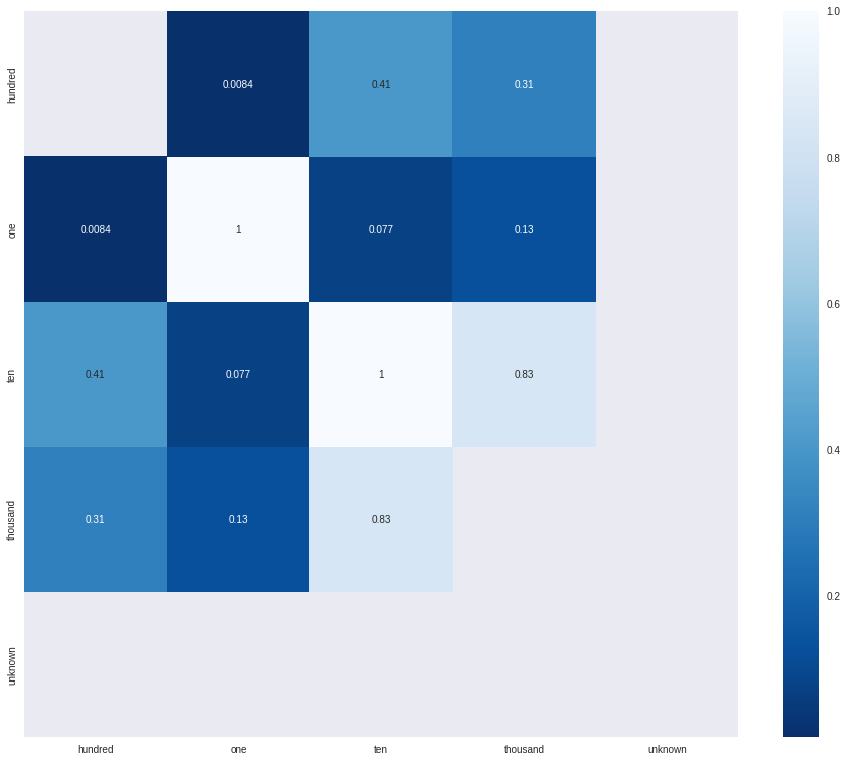

divide_color_2 [drag]
divide_color_2 [draw]: Nothing statistically significant for a = 0.05
divide_color_2 [hold]: Nothing statistically significant for a = 0.05


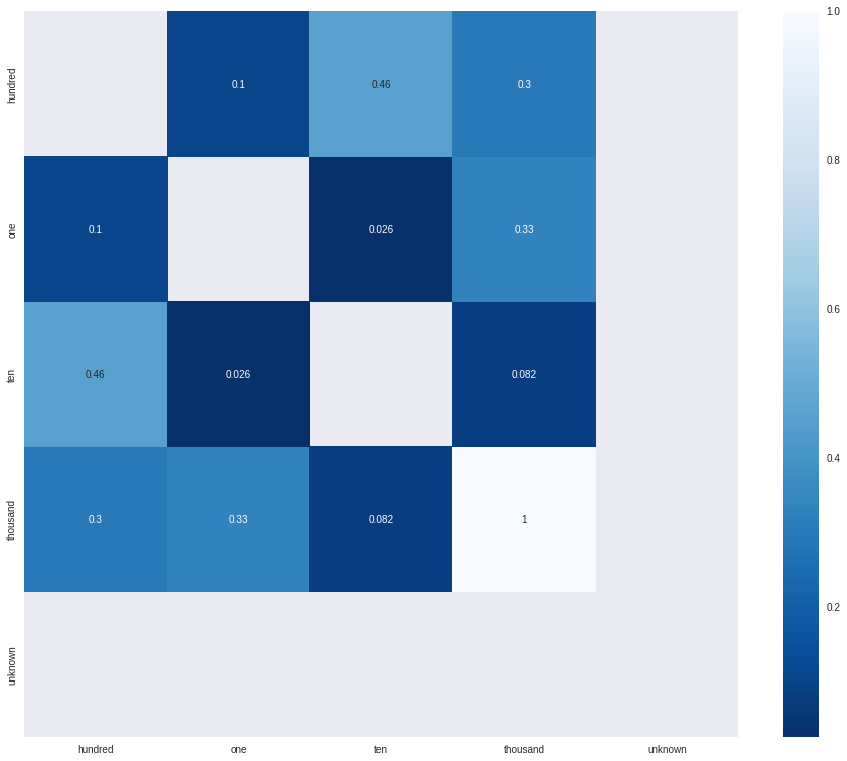

divide_color_2 [lasso]
divide_color_2 [other]: Nothing statistically significant for a = 0.05
divide_color_2 [pinch]: No use of this gesture to draw.
divide_color_2 [rev_pinch]: No use of this gesture to draw.
divide_color_2 [tap]: Nothing statistically significant for a = 0.05
divide_color_2 [tripletap]: No use of this gesture to draw.
divide_color_2 [ui]: Nothing statistically significant for a = 0.05
divide_color_2 [voice]: Nothing statistically significant for a = 0.05
divide_color_mix [box]: Nothing statistically significant for a = 0.05
divide_color_mix [doubletap]: Nothing statistically significant for a = 0.05
divide_color_mix [drag]: Nothing statistically significant for a = 0.05
divide_color_mix [draw]: Nothing statistically significant for a = 0.05
divide_color_mix [hold]: No use of this gesture to draw.
divide_color_mix [lasso]: Nothing statistically significant for a = 0.05
divide_color_mix [other]: Nothing statistically significant for a = 0.05
divide_color_mix [pinch]: N

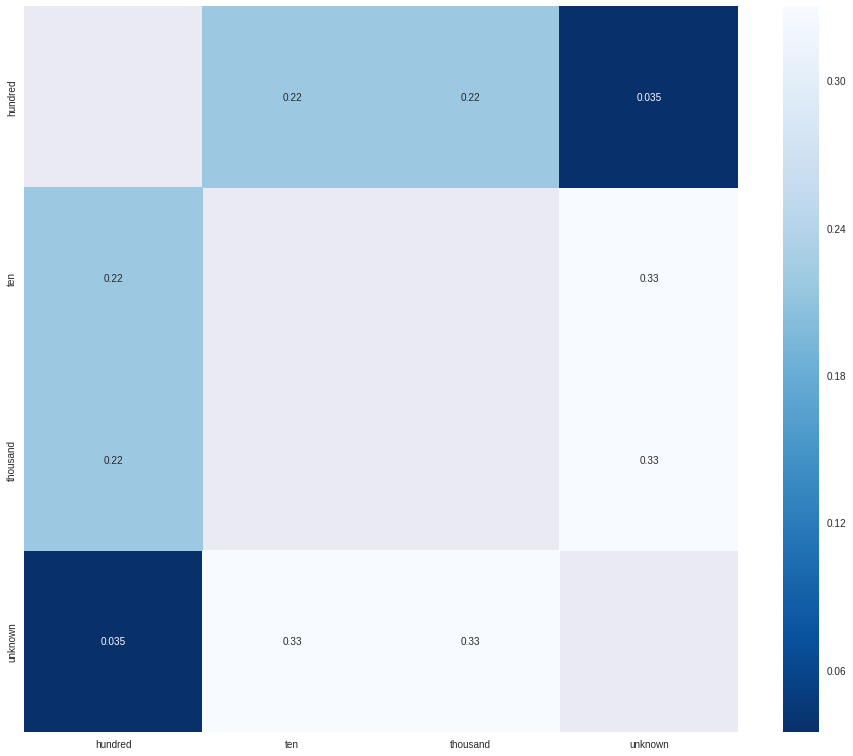

line [box]
line [doubletap]: Nothing statistically significant for a = 0.05
line [drag]: Nothing statistically significant for a = 0.05
line [draw]: Nothing statistically significant for a = 0.05
line [hold]: Nothing statistically significant for a = 0.05
line [lasso]: Nothing statistically significant for a = 0.05
line [other]: Nothing statistically significant for a = 0.05
line [pinch]: Nothing statistically significant for a = 0.05
line [rev_pinch]: Nothing statistically significant for a = 0.05
line [tap]: Nothing statistically significant for a = 0.05
line [tripletap]: Nothing statistically significant for a = 0.05
line [ui]: Nothing statistically significant for a = 0.05
line [voice]: Nothing statistically significant for a = 0.05
mark [box]: Nothing statistically significant for a = 0.05
mark [doubletap]: Nothing statistically significant for a = 0.05
mark [drag]: Nothing statistically significant for a = 0.05
mark [draw]: Nothing statistically significant for a = 0.05
mark [hol

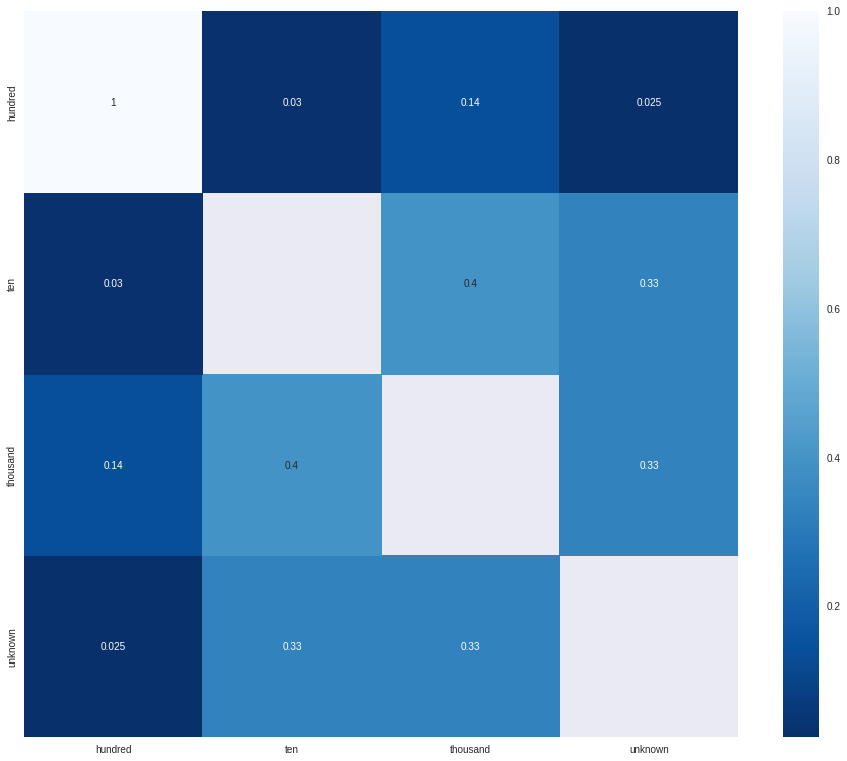

merge [box]
merge [doubletap]: Nothing statistically significant for a = 0.05
merge [drag]: Nothing statistically significant for a = 0.05
merge [draw]: Nothing statistically significant for a = 0.05
merge [hold]: Nothing statistically significant for a = 0.05


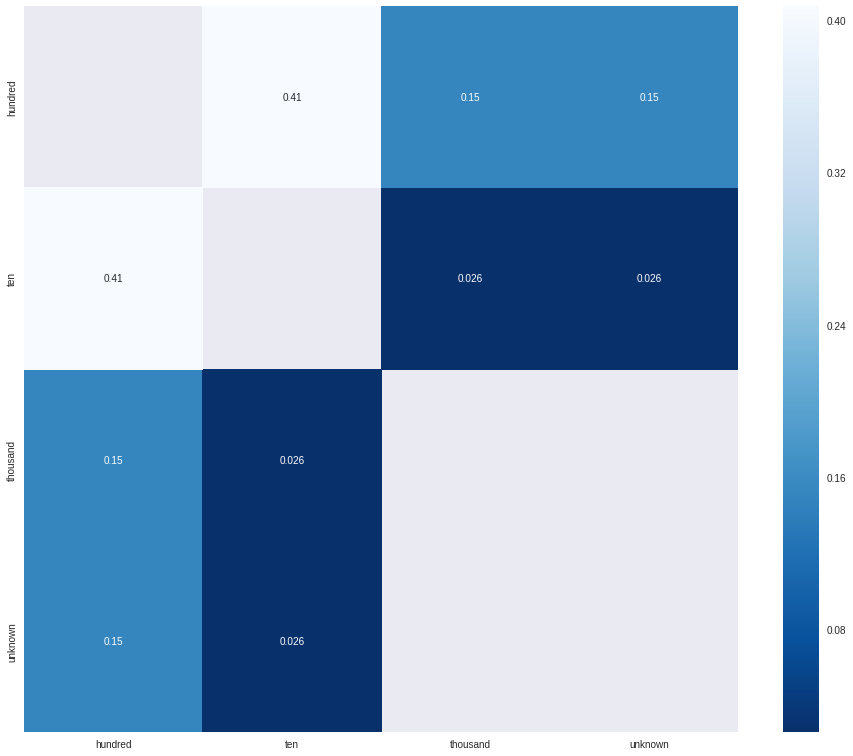

merge [lasso]
merge [other]: Nothing statistically significant for a = 0.05


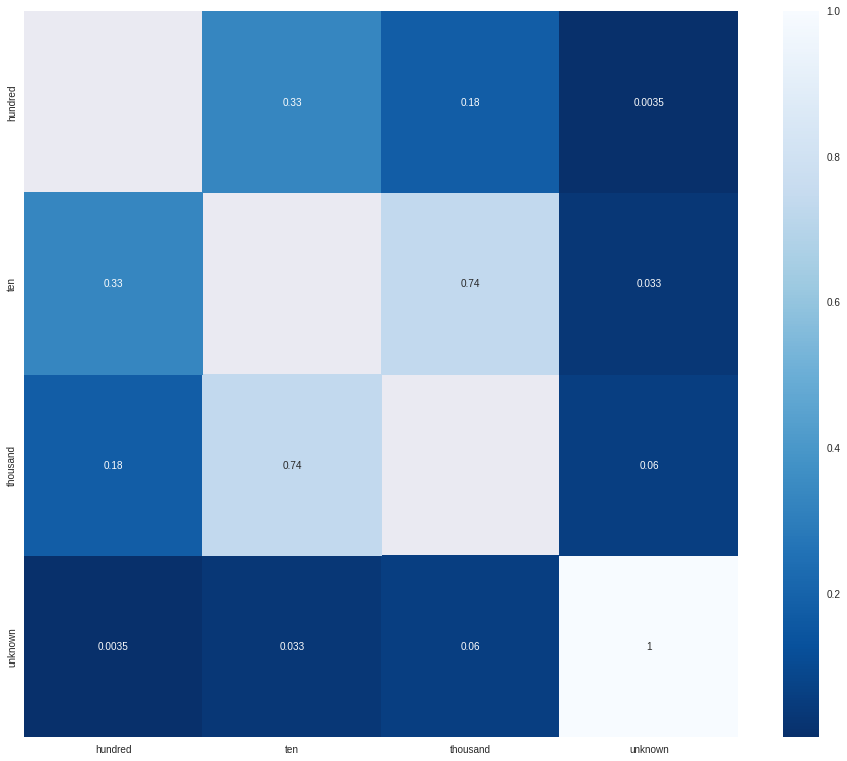

merge [pinch]
merge [rev_pinch]: Nothing statistically significant for a = 0.05
merge [tap]: Nothing statistically significant for a = 0.05
merge [tripletap]: Nothing statistically significant for a = 0.05
merge [ui]: Nothing statistically significant for a = 0.05
merge [voice]: Nothing statistically significant for a = 0.05
move_a [box]: Nothing statistically significant for a = 0.05
move_a [doubletap]: Nothing statistically significant for a = 0.05
move_a [drag]: Nothing statistically significant for a = 0.05
move_a [draw]: Nothing statistically significant for a = 0.05
move_a [hold]: Nothing statistically significant for a = 0.05


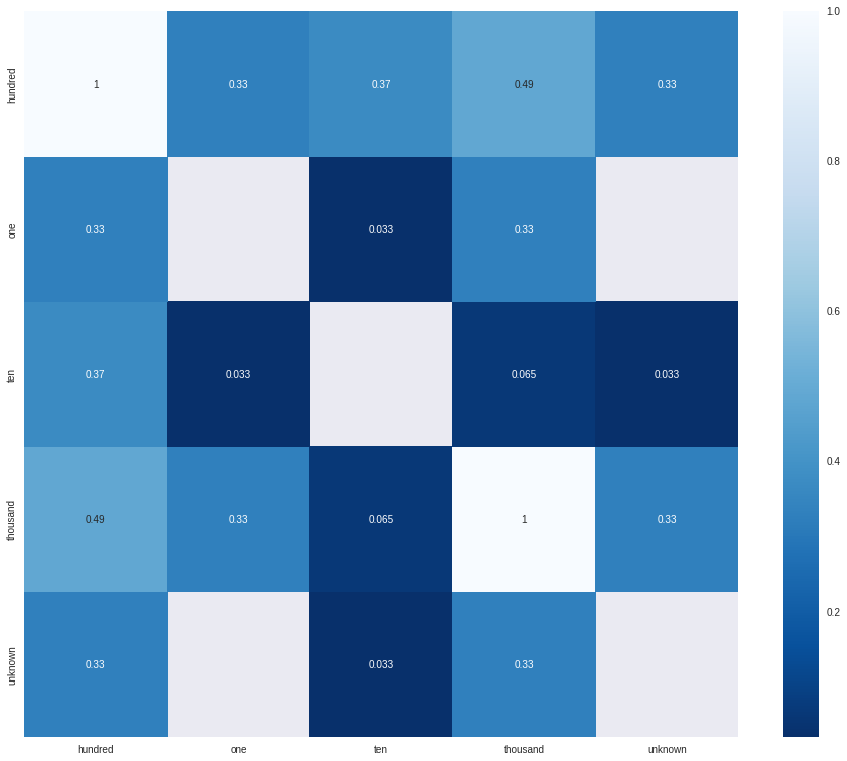

move_a [lasso]
move_a [other]: Nothing statistically significant for a = 0.05
move_a [pinch]: No use of this gesture to draw.
move_a [rev_pinch]: No use of this gesture to draw.
move_a [tap]: Nothing statistically significant for a = 0.05
move_a [tripletap]: Nothing statistically significant for a = 0.05
move_a [ui]: No use of this gesture to draw.
move_a [voice]: Nothing statistically significant for a = 0.05
move_wall [box]: Nothing statistically significant for a = 0.05
move_wall [doubletap]: No use of this gesture to draw.


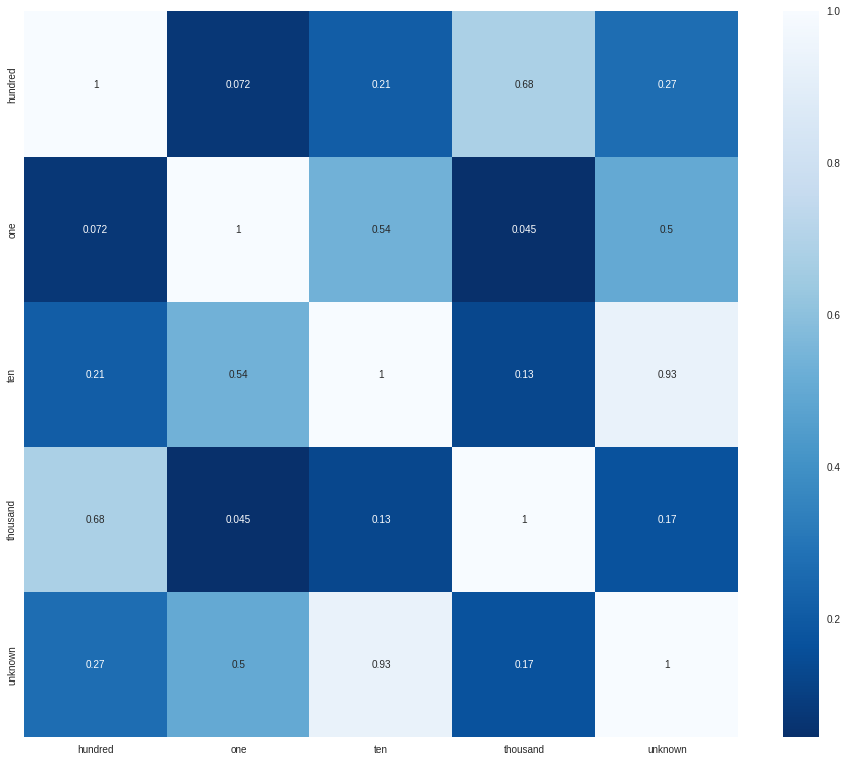

move_wall [drag]
move_wall [draw]: Nothing statistically significant for a = 0.05
move_wall [hold]: Nothing statistically significant for a = 0.05
move_wall [lasso]: Nothing statistically significant for a = 0.05
move_wall [other]: Nothing statistically significant for a = 0.05
move_wall [pinch]: No use of this gesture to draw.
move_wall [rev_pinch]: No use of this gesture to draw.
move_wall [tap]: Nothing statistically significant for a = 0.05
move_wall [tripletap]: No use of this gesture to draw.
move_wall [ui]: No use of this gesture to draw.
move_wall [voice]: Nothing statistically significant for a = 0.05
patrol_a [box]: Nothing statistically significant for a = 0.05
patrol_a [doubletap]: Nothing statistically significant for a = 0.05
patrol_a [drag]: Nothing statistically significant for a = 0.05
patrol_a [draw]: Nothing statistically significant for a = 0.05
patrol_a [hold]: Nothing statistically significant for a = 0.05
patrol_a [lasso]: Nothing statistically significant for a 

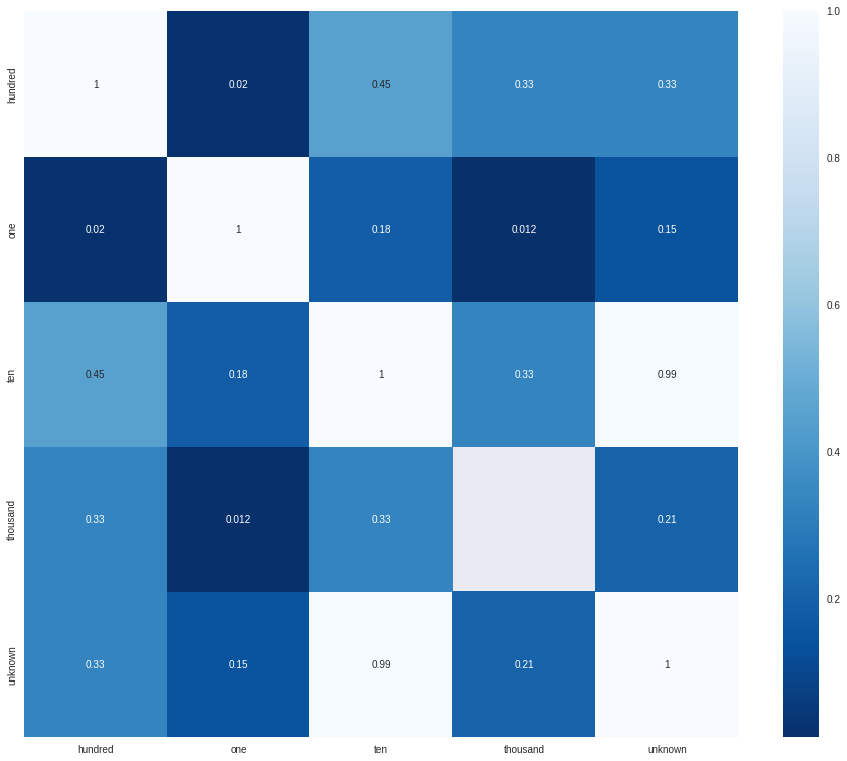

patrol_screen [tap]
patrol_screen [tripletap]: Nothing statistically significant for a = 0.05
patrol_screen [ui]: Nothing statistically significant for a = 0.05
patrol_screen [voice]: Nothing statistically significant for a = 0.05
remove [box]: Nothing statistically significant for a = 0.05
remove [doubletap]: Nothing statistically significant for a = 0.05
remove [drag]: Nothing statistically significant for a = 0.05
remove [draw]: Nothing statistically significant for a = 0.05
remove [hold]: Nothing statistically significant for a = 0.05
remove [lasso]: Nothing statistically significant for a = 0.05
remove [other]: Nothing statistically significant for a = 0.05
remove [pinch]: No use of this gesture to draw.
remove [rev_pinch]: No use of this gesture to draw.
remove [tap]: Nothing statistically significant for a = 0.05
remove [tripletap]: Nothing statistically significant for a = 0.05
remove [ui]: Nothing statistically significant for a = 0.05
remove [voice]: Nothing statistically sig

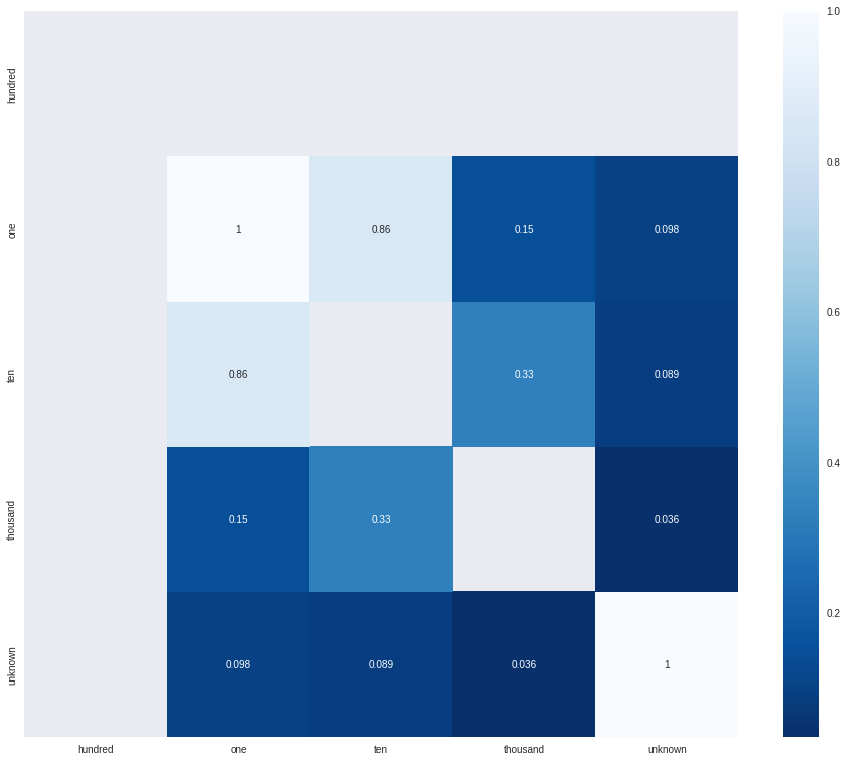

split [rev_pinch]


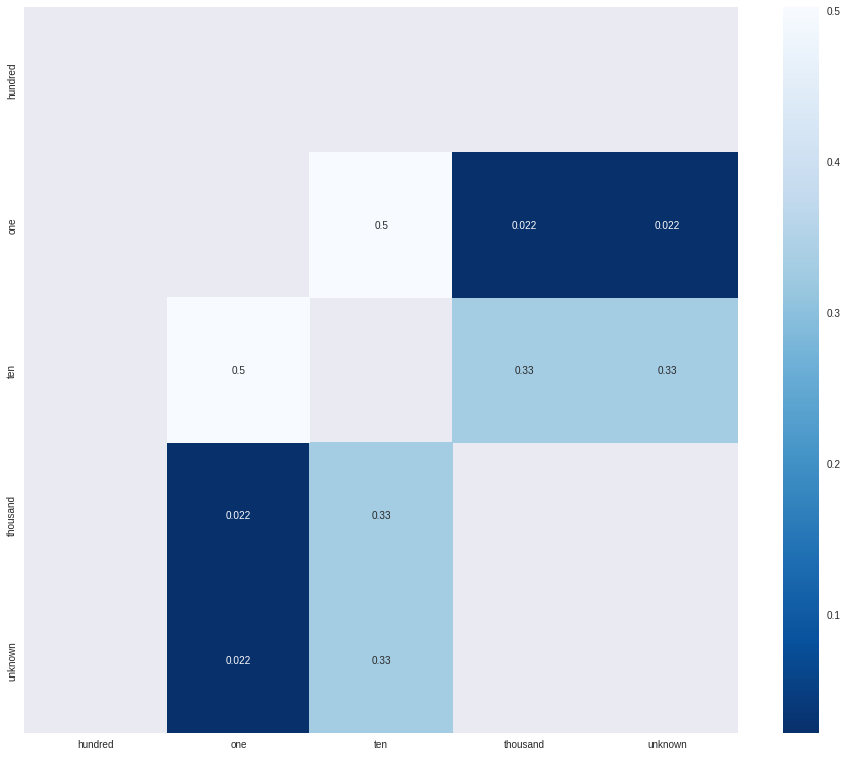

split [tap]
split [tripletap]: Nothing statistically significant for a = 0.05
split [ui]: Nothing statistically significant for a = 0.05
split [voice]: Nothing statistically significant for a = 0.05
square [box]: Nothing statistically significant for a = 0.05
square [doubletap]: Nothing statistically significant for a = 0.05
square [drag]: Nothing statistically significant for a = 0.05


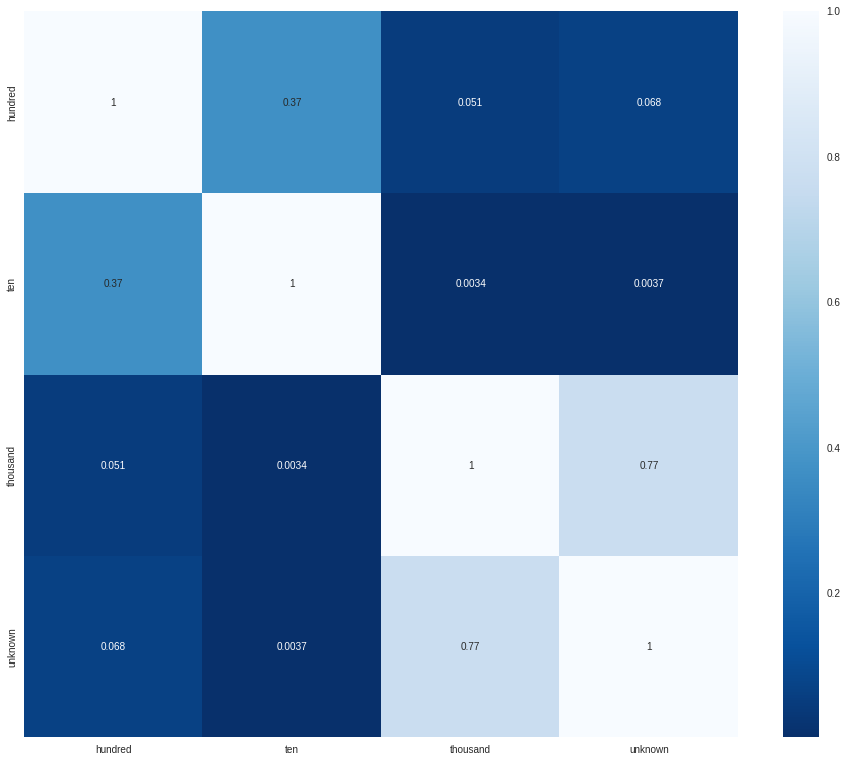

square [draw]
square [hold]: Nothing statistically significant for a = 0.05
square [lasso]: Nothing statistically significant for a = 0.05
square [other]: Nothing statistically significant for a = 0.05
square [pinch]: Nothing statistically significant for a = 0.05
square [rev_pinch]: No use of this gesture to draw.
square [tap]: Nothing statistically significant for a = 0.05
square [tripletap]: Nothing statistically significant for a = 0.05
square [ui]: Nothing statistically significant for a = 0.05
square [voice]: Nothing statistically significant for a = 0.05
stop [box]: Nothing statistically significant for a = 0.05
stop [doubletap]: Nothing statistically significant for a = 0.05


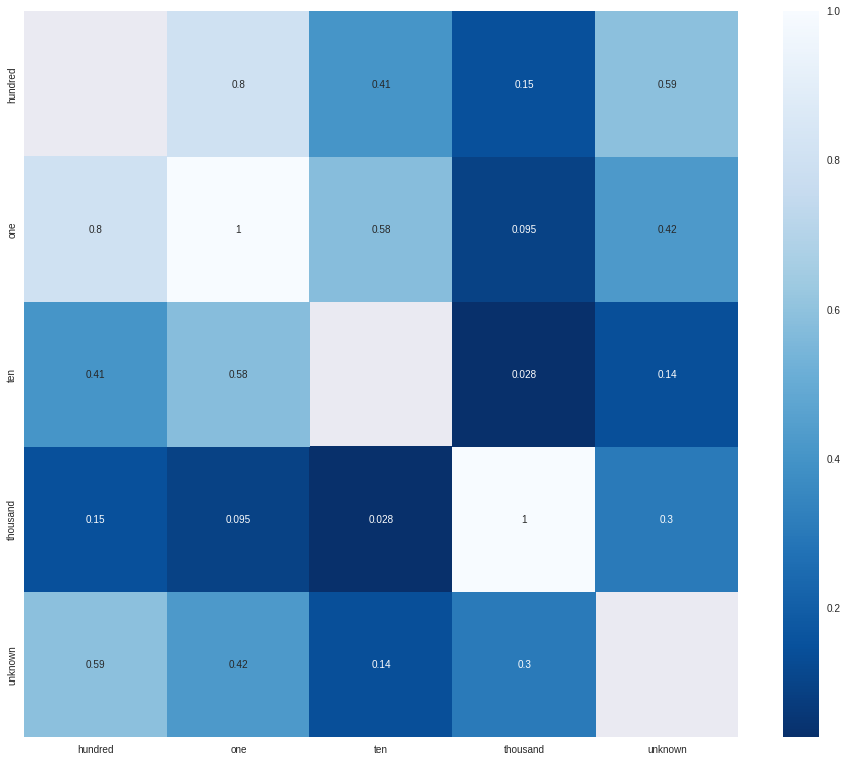

stop [drag]
stop [draw]: Nothing statistically significant for a = 0.05
stop [hold]: Nothing statistically significant for a = 0.05
stop [lasso]: Nothing statistically significant for a = 0.05
stop [other]: Nothing statistically significant for a = 0.05
stop [pinch]: No use of this gesture to draw.
stop [rev_pinch]: No use of this gesture to draw.
stop [tap]: Nothing statistically significant for a = 0.05
stop [tripletap]: No use of this gesture to draw.
stop [ui]: Nothing statistically significant for a = 0.05
stop [voice]: Nothing statistically significant for a = 0.05


In [28]:
#Outer index is task, inner index is gesture
for task in per_task_df.groupby(['task']):
    for g in col_list:
        #Store the all-pairs conditions p-values for comparisons of this gesture and condition
        all_p_vals = {}
        for condition_a in task[1].groupby('condition'):
            all_p_vals[condition_a[0]]={}
            for condition_b in task[1].groupby('condition'):
                #print condition_a[0], condition_b[0]
                samples = [condition_a[1][g], condition_b[1][g]]
                f, p = ss.f_oneway(*samples)
                all_p_vals[condition_a[0]][condition_b[0]] = p

        #Load data into frame and plot it
        draw_p_vals = pandas.DataFrame(all_p_vals)
        if not draw_p_vals.any().any():
            #There's nothing to draw
            print "{} [{}]: No use of this gesture to draw.".format(task[0], g)
        elif not draw_p_vals.le(0.05).any().any():
            print "{} [{}]: Nothing statistically significant for a = 0.05".format(task[0], g)
        else:
            sb.heatmap(draw_p_vals, cmap="Blues_r", annot=True)
            plt.show()
            print "{} [{}]".format(task[0], g)
         

In [29]:
#Just a test to check that the two ways of calling ss.f_oneway were the same
# for task in per_task_df.groupby(['task']):
#     for g in col_list:
#         #Store the all-pairs conditions p-values for comparisons of this gesture and condition
#         all_p_vals = {}
#         for condition_a in task[1].groupby('condition'):
#             all_p_vals[condition_a[0]]={}
#             for condition_b in task[1].groupby('condition'):
#                 #print condition_a[0], condition_b[0]
#                 samples = [condition_a[1][g], condition_b[1][g]]
#                 f, p = ss.f_oneway(*samples)
#                 #Same as above, which is good, I had some concern it wasn't. 
#                 #f2, p2 = ss.f_oneway(condition_a[1][g], condition_b[1][g])
#                 print p, p2

In [30]:
per_task_non_norm[col_list].sum()

box           113
doubletap      95
drag         1084
draw          761
hold           66
lasso         184
other         189
pinch          26
rev_pinch      49
tap           514
tripletap      19
ui            112
voice          44
dtype: int64

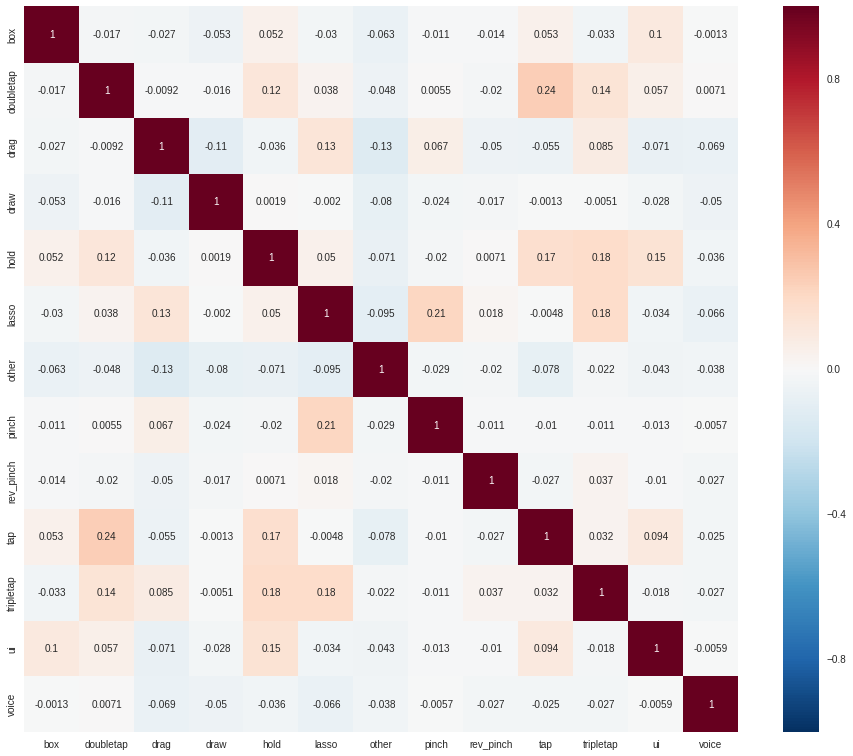

In [31]:
corr_df = per_task_non_norm[col_list].corr(method='pearson')
sb.heatmap(corr_df, square=False, annot=True)

Because of the good ANOVA stats for some gestures being variable with the condition, particularly box, lasso, tap, and voice, I suspect that PCA can pull out a lower-dimensional representation that provides me with some form of discrimination between the groups. If that's the case, then it is possible to create a classifier that uses that discrimination to determine which condition a user was looking at, and so supports the hypothesis that user gestures do change across groups. 

In [32]:
#This can't work on my data because pca.fit() doesn't work if there are NaN values in my data, which there are. 
# Tried replacing all NaN with zero, under the assumption that zero values can't contribute to the variance. 
data = per_task_df[col_list]

# This got me the location of the NaNs, they were all cases where the user made no gestures
# inds = pandas.isnull(data).any(1).nonzero()[0]
# per_task_df.iloc[inds]

#Fill in NaN with 0, no gestures is 0 of each gesture.
data.fillna(0.0, inplace=True)

#Test shows no NaNs anymore
#inds = pandas.isnull(data).any(1).nonzero()[0]

import numpy as np

import sklearn.decomposition as skld
pca_norm = skld.PCA()
pca_norm.fit(data)

#From http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html

def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pandas.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pandas.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

pca_summary(pca_norm, data, out=True)


Importance of components:


/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.475554,0.400506,0.400506
PC2,0.334190,0.197786,0.598292
PC3,0.263230,0.122710,0.721002
PC4,0.193547,0.066341,0.787343
PC5,0.163010,0.047058,0.834402
PC6,0.147619,0.038592,0.872993
PC7,0.135962,0.032737,0.905731
PC8,0.119672,0.025363,0.931093
PC9,0.115814,0.023754,0.954847


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.475554,0.400506,0.400506
PC2,0.334190,0.197786,0.598292
PC3,0.263230,0.122710,0.721002
PC4,0.193547,0.066341,0.787343
PC5,0.163010,0.047058,0.834402
PC6,0.147619,0.038592,0.872993
PC7,0.135962,0.032737,0.905731
PC8,0.119672,0.025363,0.931093
PC9,0.115814,0.023754,0.954847


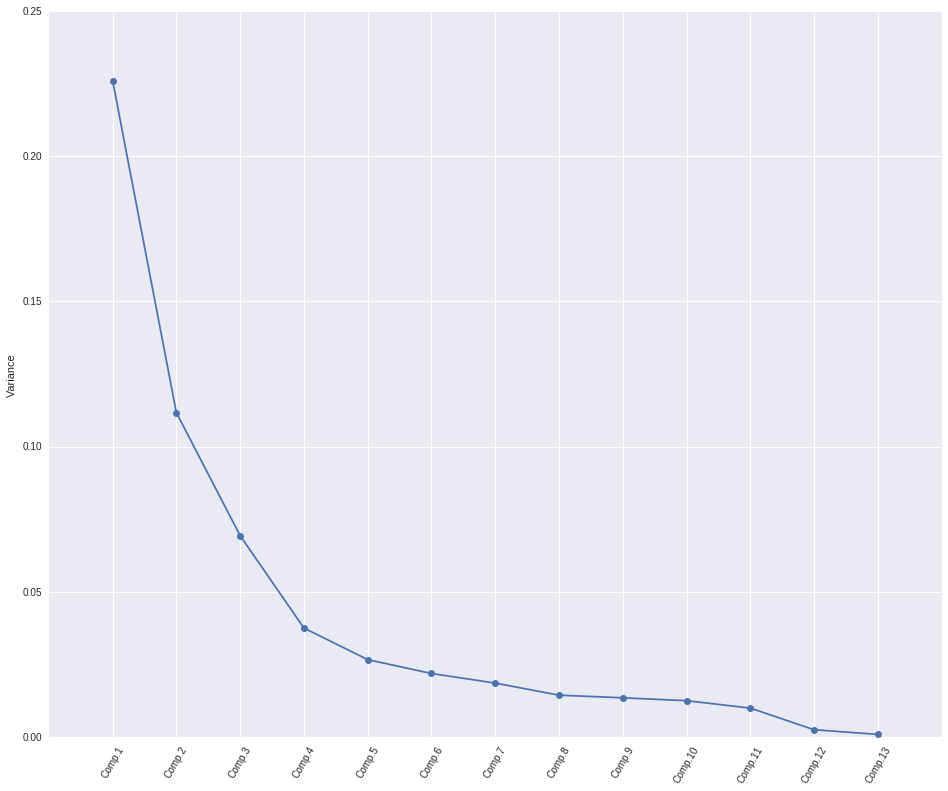

In [33]:
#From http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca_norm, data)

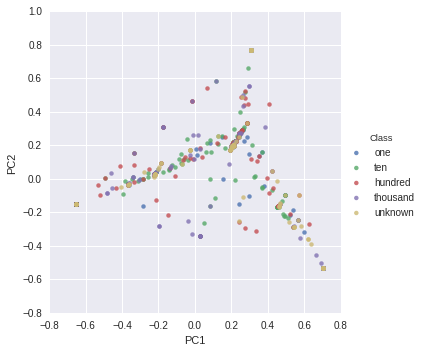

In [34]:
#Based on http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pandas.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sb.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca_norm, data, per_task_df["condition"])

Somewhat annoyingly, plotting the first and second principal components against each other doesn't lead to some sort of super-clean clustering of the experiment conditions, so the first two components probably don't discriminate the data well. The knee in the scree plot is at about the 4th component, so adding those two components might help, as the clustering may be more apparent in a 4D space, but good luck flattening that onto a graphic for a paper. 

In [35]:
y = per_task_df["condition"]
import sklearn.discriminant_analysis as sk_da
lda = sk_da.LinearDiscriminantAnalysis().fit(data, y)

/usr/local/lib/python2.7/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [36]:
def calclda(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the discriminant function
    ld = np.zeros(numsamples)
    # calculate the value of the discriminant function for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        ld[i] = valuei
    # standardise the discriminant function so that its mean value is 0:
    ld = scale(ld, with_std=False)
    return ld

In [37]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pandas.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pandas.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values = rpredict(lda, data, y, True)

class
['hundred' 'one' 'one' 'unknown' 'unknown' 'unknown' 'unknown' 'one'
 'unknown' 'thousand' 'thousand' 'one' 'ten' 'one' 'ten' 'ten' 'ten'
 'unknown' 'unknown' 'one' 'ten' 'ten' 'ten' 'ten' 'ten' 'one' 'ten' 'ten'
 'ten' 'thousand' 'thousand' 'unknown' 'thousand' 'thousand' 'one'
 'unknown' 'unknown' 'unknown' 'thousand' 'thousand' 'unknown' 'thousand'
 'thousand' 'thousand' 'thousand' 'thousand' 'thousand' 'ten' 'hundred'
 'ten' 'hundred' 'one' 'one' 'hundred' 'hundred' 'hundred' 'hundred'
 'hundred' 'hundred' 'hundred' 'hundred' 'unknown' 'hundred' 'hundred'
 'hundred' 'thousand' 'thousand' 'ten' 'ten' 'ten' 'thousand' 'ten' 'ten'
 'ten' 'unknown' 'ten' 'ten' 'ten' 'ten' 'ten' 'ten' 'ten' 'ten' 'hundred'
 'hundred' 'hundred' 'unknown' 'unknown' 'thousand' 'unknown' 'unknown'
 'hundred' 'unknown' 'unknown' 'unknown' 'unknown' 'thousand' 'hundred'
 'unknown' 'unknown' 'hundred' 'unknown' 'unknown' 'unknown' 'unknown'
 'unknown' 'unknown' 'thousand' 'one' 'unknown' 'unknown' 'unkno

In [38]:
def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix


In [39]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [40]:
calcSeparations(lda_values["x"], y)

('variable', 'LD1', 'Vw=', 0.999999999999996, 'Vb=', 56.195065134658456, 'separation=', 56.195065134658684)
('variable', 'LD2', 'Vw=', 0.9999999999999981, 'Vb=', 24.92420366956188, 'separation=', 24.924203669561926)
('variable', 'LD3', 'Vw=', 0.9999999999999949, 'Vb=', 12.035730373795573, 'separation=', 12.035730373795635)
('variable', 'LD4', 'Vw=', 1.0, 'Vb=', 4.282710776402694, 'separation=', 4.282710776402694)


In [41]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sb.distplot(gdata.values, bins, ax=ax, label="group "+str(group))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel("group"+str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

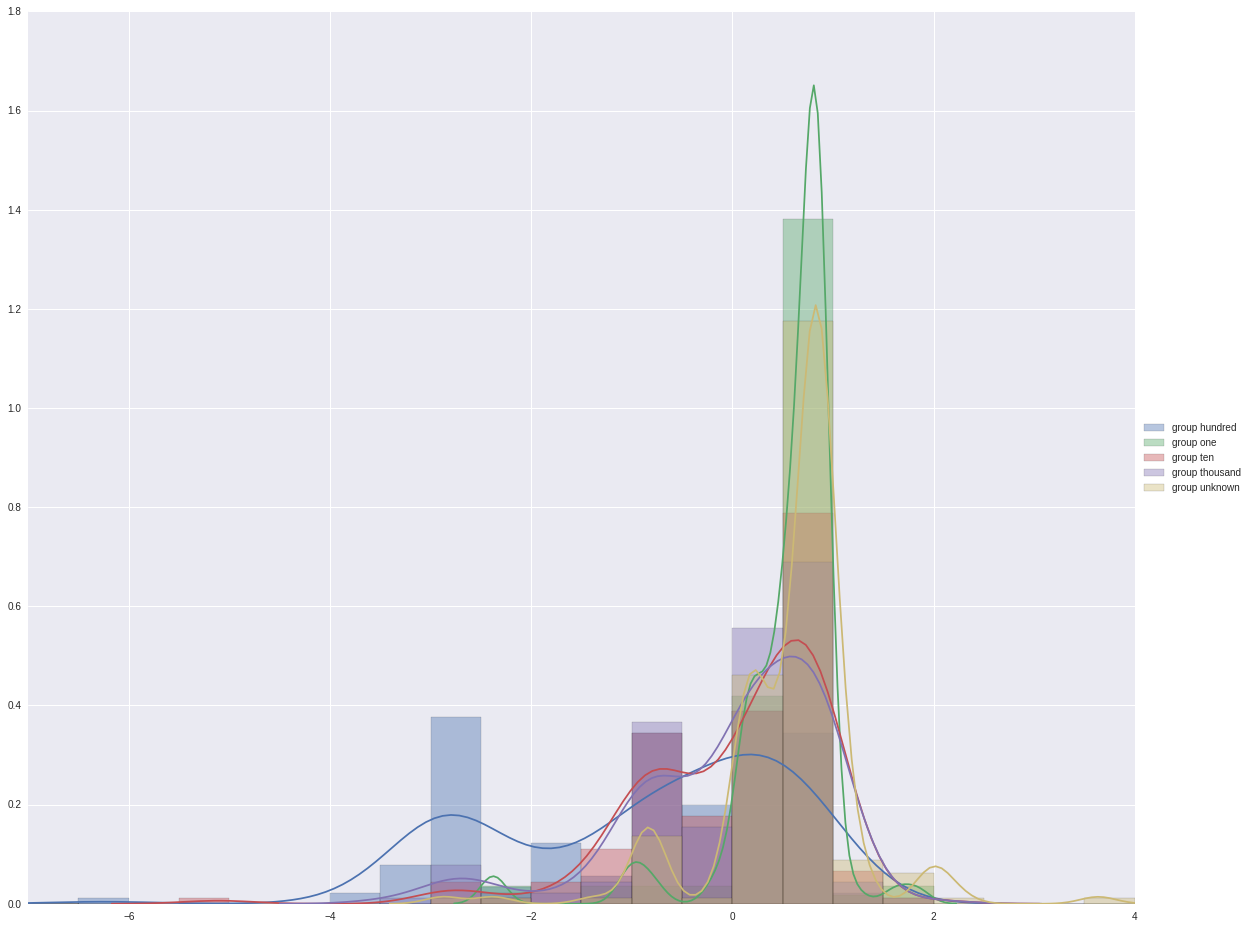

In [42]:
ldahist(lda_values["x"].LD1, y)

Terrific. The first LDA function does a pretty poor job seperating the various conditions, I would have liked to see all of those histograms not totally overlapping each other. 

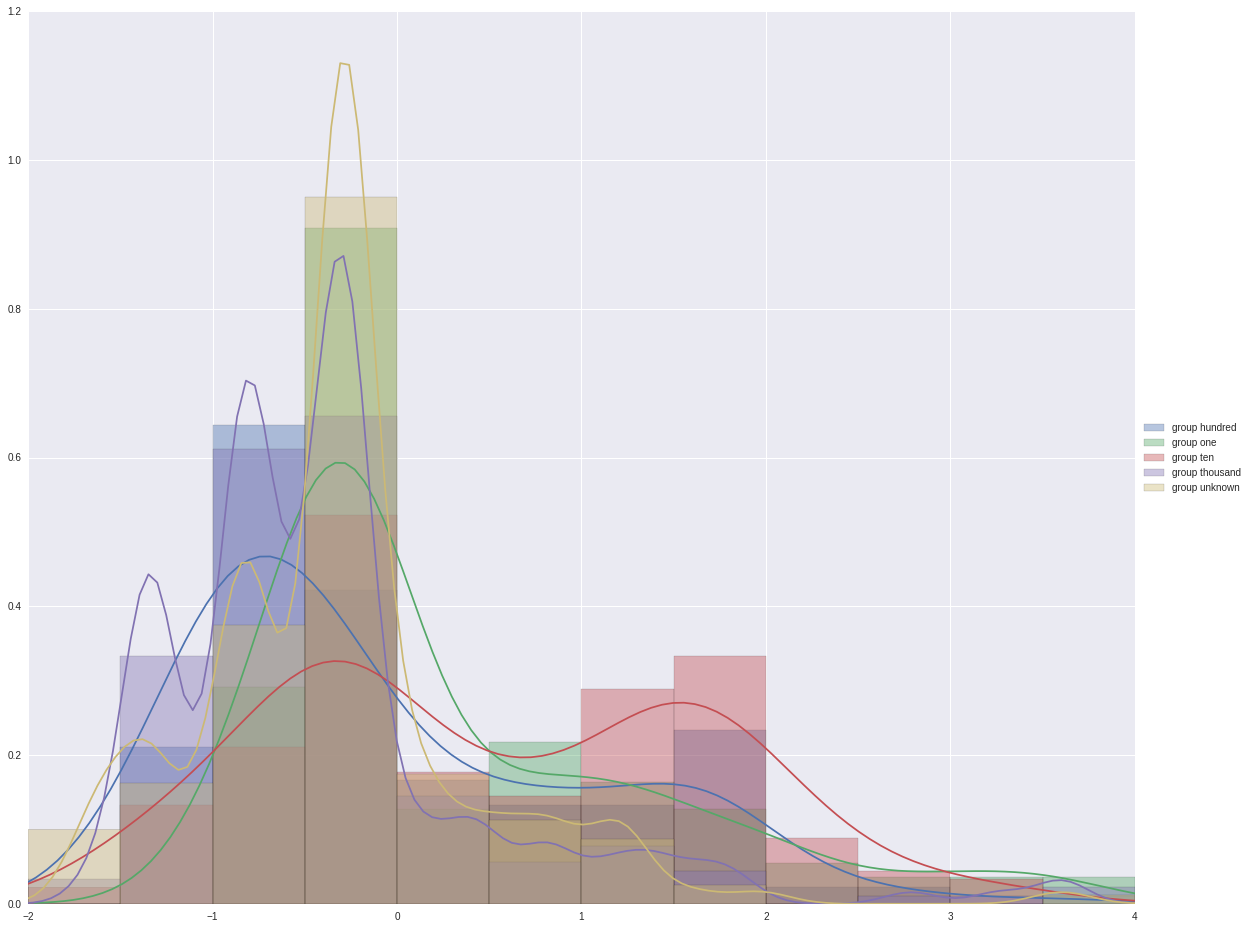

In [43]:
ldahist(lda_values["x"].LD2, y)

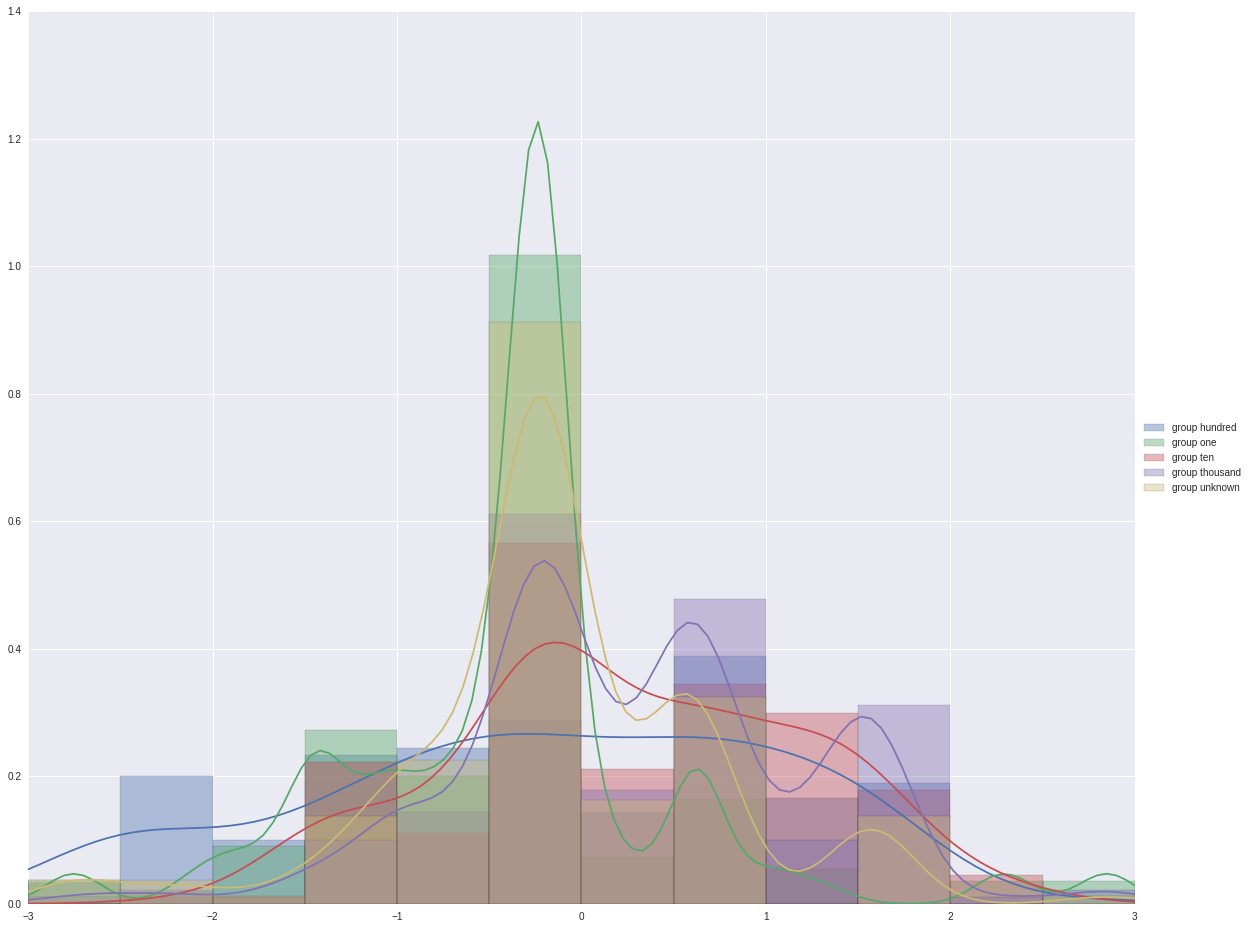

In [44]:
ldahist(lda_values["x"].LD3, y)

Yep. Right on top of each other. Looks like LDA isn't going to pull out anything that reliably discriminates the conditions. 

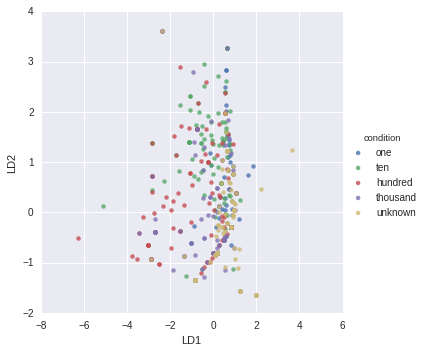

In [45]:
sb.lmplot("LD1", "LD2", lda_values["x"].join(y), hue="condition", fit_reg=False);


This is the same bad clustering, being bad. 

In [46]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pandas.DataFrame(data_groupby.apply(len)))

printMeanAndSdByGroup(data, y)

## Means:


,box,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,tripletap,ui,voice
condition,,,,,,,,,,,,,
hundred,0.108502,0.020556,0.253242,0.168370,0.018920,0.067374,0.125324,0.000000,0.010185,0.092156,0.000000,0.019238,0.099466
one,0.000000,0.040402,0.473052,0.151172,0.037775,0.022727,0.001010,0.000000,0.010173,0.175955,0.007143,0.042864,0.019545
ten,0.029077,0.034595,0.344130,0.162049,0.025498,0.113012,0.070926,0.010195,0.014220,0.129350,0.007637,0.058200,0.001111
thousand,0.024435,0.011111,0.372133,0.252149,0.008056,0.031086,0.177050,0.008333,0.021825,0.040488,0.000000,0.020000,0.027778
unknown,0.000000,0.049702,0.466235,0.204583,0.027292,0.006250,0.073958,0.033333,0.031302,0.068802,0.010417,0.000000,0.009375



## Standard deviations:


,box,doubletap,drag,draw,hold,lasso,other,pinch,rev_pinch,tap,tripletap,ui,voice
condition,,,,,,,,,,,,,
hundred,0.200465,0.124041,0.335077,0.333892,0.097436,0.169101,0.297621,0.000000,0.068412,0.212195,0.000000,0.081734,0.293205
one,0.000000,0.123029,0.463910,0.303486,0.136637,0.141202,0.010546,0.000000,0.052774,0.279919,0.044201,0.166668,0.087930
ten,0.111878,0.157345,0.402836,0.316584,0.108088,0.189245,0.237887,0.082632,0.107349,0.268897,0.039531,0.184382,0.014866
thousand,0.103807,0.090608,0.427928,0.403468,0.077847,0.131341,0.360157,0.082916,0.127006,0.128793,0.000000,0.106768,0.122348
unknown,0.000000,0.154902,0.458700,0.367198,0.134468,0.078810,0.256002,0.175594,0.157816,0.187919,0.088756,0.000000,0.087890



## Sample sizes:


,0
condition,
hundred,180
one,110
ten,180
thousand,180
unknown,160


In [47]:
#Lets come up with a discrimination rule and see how bad it is
printMeanAndSdByGroup(lda_values["x"], y)

## Means:


,LD1,LD2,LD3,LD4
condition,,,,
hundred,-0.875748,-0.046789,-0.200699,0.029391
one,0.547359,0.310715,-0.344962,-0.229826
ten,0.032283,0.513093,0.243931,0.086795
thousand,-0.005433,-0.373650,0.282855,-0.146836
unknown,0.578700,-0.317853,-0.129687,0.192487



## Standard deviations:


,LD1,LD2,LD3,LD4
condition,,,,
hundred,1.418229,1.054436,1.255280,0.788313
one,0.578798,1.067950,0.913177,0.774376
ten,0.939138,1.164149,0.940599,1.088744
thousand,0.956192,0.901548,0.927352,0.778452
unknown,0.719249,0.746523,0.849977,1.380072



## Sample sizes:


,0
condition,
hundred,180
one,110
ten,180
thousand,180
unknown,160


In [48]:
#Get the means for LDA group 1 and use those to calculate the cutoffs
cutoffs = []
data_groupby = lda_values["x"].groupby(y)
means = data_groupby.apply(np.mean)["LD1"]
means = means.sort_values()
for i in range(len(means)-1):
    cutoffs.append((means[i] + means[i+1])/2)



lda_values["x"].iloc[:, 0]

def calcAllocationRuleAccuracy(ldavalue, groupvariable, cutoffpoints):
    # find out how many values the group variable can take
    # Change here is to keep levels in same order as cutoffs
    #levels = sorted(set((groupvariable)))
    levels = means.index
    numlevels = len(levels)
    confusion_matrix = []
    # calculate the number of true positives and false negatives for each group
    for i, leveli in enumerate(levels):
        levelidata = ldavalue[groupvariable==leveli]
        row = []
        # see how many of the samples from this group are classified in each group
        for j, levelj in enumerate(levels):
            if j == 0:
                cutoff1 = cutoffpoints[0]
                cutoff2 = "NA"
                results = (levelidata <= cutoff1).value_counts()
            elif j == numlevels-1:
                cutoff1 = cutoffpoints[numlevels-2]
                cutoff2 = "NA"
                results = (levelidata > cutoff1).value_counts()
            else:
                cutoff1 = cutoffpoints[j-1]
                cutoff2 = cutoffpoints[j]
                results = ((levelidata > cutoff1) & (levelidata <= cutoff2)).value_counts()
            try:
                trues = results[True]
            except KeyError:
                trues = 0
            #print("Number of samples of group", leveli, "classified as group", levelj, ":", trues, "(cutoffs:", cutoff1, ",", cutoff2, ")")
            row.append(trues)
        confusion_matrix.append(row)
    return confusion_matrix

def webprint_confusion_matrix(confusion_matrix, classes_names):
    display(pandas.DataFrame(confusion_matrix, index=["Is group "+i for i in classes_names], columns=["Allocated to group "+i for i in classes_names]))

confusion_matrix = calcAllocationRuleAccuracy(lda_values["x"].iloc[:, 0], y, cutoffs)
webprint_confusion_matrix(confusion_matrix, lda.classes_)

,Allocated to group hundred,Allocated to group one,Allocated to group ten,Allocated to group thousand,Allocated to group unknown
Is group hundred,94,18,28,14,26
Is group one,52,12,44,8,64
Is group ten,54,13,27,19,67
Is group thousand,6,2,13,16,73
Is group unknown,14,1,30,10,105


As expected, this is a terrible classifier. 


In [54]:
import re

def tag_object(original):
	tags = []
	#Matches robots, robot, bot, bots, etc. 
	robots = re.compile("bot|group|swarm|orange|red", re.I)
	crate = re.compile("crate", re.I)
	targetA = re.compile("area a|box a| a$|to a,|^a$", re.I)
	targetB = re.compile("area b|box b| b$|to b,|^b$", re.I)
	whitespace = re.compile("whitespace|ground|screen|white area", re.I)
	
	toCheck = [(robots, "r"), (crate, "c"), (targetA, "a"), (targetB, "b"), (whitespace, "w")]
	for compiled, tag in toCheck:
		if re.search(compiled, original):
			tags.append(tag)
	return tags

def count_select_taps(participant):
    #Dict of task id to count of taps on robots
    counts = {}
    for task_id in participant["tasks"].keys():
        #Default to no counts of select taps
        counts[task_id] = 0
        events = participant["tasks"][task_id]
        #Flip through all the events
        for event in events:
            #If we have objects, tag them
            if "objects" in event.keys():
                tags = tag_object(" ".join(event["objects"]))
                #We have both an event and a set of tags, check if it's a tap on a robot
                if 'r' in tags and event["event_type"] == "tap":
                    counts[task_id] += 1
    return counts
                    
def count_group_select(participant):
    #Dict of task id to count of taps on robots
    counts = {}
    for task_id in participant["tasks"].keys():
        #Default to no counts of select taps
        counts[task_id] = 0
        events = participant["tasks"][task_id]
        #Flip through all the events
        for event in events:
            #If we have objects, tag them
            if "objects" in event.keys():
                tags = tag_object(" ".join(event["objects"]))
                #We have both an event and a set of tags, check if it's a tap on a robot
                if 'r' in tags and (event["event_type"] == "lasso" or event["event_type"] == "box_select"):
                    counts[task_id] += 1
    return counts

def count_box_select(participant):
    #Dict of task id to count of taps on robots
    counts = {}
    for task_id in participant["tasks"].keys():
        #Default to no counts of select taps
        counts[task_id] = 0
        events = participant["tasks"][task_id]
        #Flip through all the events
        for event in events:
            #If we have objects, tag them
            if "objects" in event.keys():
                tags = tag_object(" ".join(event["objects"]))
                #We have both an event and a set of tags, check if it's a tap on a robot
                if 'r' in tags and event["event_type"] == "box_select":
                    counts[task_id] += 1
    return counts

def count_lasso_select(participant):
    #Dict of task id to count of taps on robots
    counts = {}
    for task_id in participant["tasks"].keys():
        #Default to no counts of select taps
        counts[task_id] = 0
        events = participant["tasks"][task_id]
        #Flip through all the events
        for event in events:
            #If we have objects, tag them
            if "objects" in event.keys():
                tags = tag_object(" ".join(event["objects"]))
                #We have both an event and a set of tags, check if it's a tap on a robot
                if 'r' in tags and event["event_type"] == "lasso":
                    counts[task_id] += 1
    return counts

#This gets a dict of user ids to dicts of task ids to select tap counts
all_select_taps = adh.apply(count_select_taps)

all_group_selects = adh.apply(count_group_select)

all_lassos = adh.apply(count_lasso_select)
all_box = adh.apply(count_box_select)

In [55]:
def summarize_counts(user_counts):
    per_cond = {}
    for pid in user_counts.keys():
        cond = adh.IdToCondition(pid)[0]
        counts = user_counts[pid].values()
        if cond in per_cond.keys():
            per_cond[cond].extend(counts)
        else:
            per_cond[cond] = counts

    for cond in per_cond.keys():
        total = sum(per_cond[cond])
        mean = np.mean(per_cond[cond])
        std_dev = np.std(per_cond[cond])
        print "{} total:{} mean:{} std dev:{}".format(cond, total, mean, std_dev)

print "\n tap selects"
summarize_counts(all_select_taps)
print "\n group selects"
summarize_counts(all_group_selects)

print "\n box"
summarize_counts(all_box)

print "\n lasso"
summarize_counts(all_lassos)


 tap selects
unknown total:43 mean:0.26875 std dev:0.588662413867
thousand total:22 mean:0.122222222222 std dev:0.442914031733
hundred total:35 mean:0.194444444444 std dev:0.61551443906
ten total:140 mean:0.777777777778 std dev:2.24240831735
one total:78 mean:0.709090909091 std dev:1.28165698535

 group selects
unknown total:1 mean:0.00625 std dev:0.0788095013307
thousand total:34 mean:0.188888888889 std dev:0.545577053208
hundred total:121 mean:0.672222222222 std dev:0.965116893067
ten total:131 mean:0.727777777778 std dev:1.1682396803
one total:3 mean:0.0272727272727 std dev:0.162877026065

 box
unknown total:0 mean:0.0 std dev:0.0
thousand total:18 mean:0.1 std dev:0.435889894354
hundred total:68 mean:0.377777777778 std dev:0.746514534766
ten total:26 mean:0.144444444444 std dev:0.597422447056
one total:0 mean:0.0 std dev:0.0

 lasso
unknown total:1 mean:0.00625 std dev:0.0788095013307
thousand total:16 mean:0.0888888888889 std dev:0.354163943345
hundred total:53 mean:0.29444444444

Total is the count of that type of gesture across all users in that condition. Mean is the mean across all tasks and users in that condition of the gestures, which doesn't mean much as it's frequently zero and so ends up being a very small number. Since the std. dev is also calculated across the same data, it doesn't mean much either. A better thing to do would be to get the per-user counts of each type of gesture, and figure out the mean and std. dev of that. 

In [56]:
def user_counts(user_counts):
    per_cond = {}
    #For each user, maintain a running total
    for pid in user_counts.keys():
        #Get their condition
        cond = adh.IdToCondition(pid)[0]
        counts = user_counts[pid].values()
        per_user_total = sum(counts)
        if cond in per_cond.keys():
            per_cond[cond].append(per_user_total)
        else:
            per_cond[cond] = [per_user_total]
    
    for cond in per_cond.keys():
        
        total = sum(per_cond[cond])
        mean = np.mean(per_cond[cond])
        std_dev = np.std(per_cond[cond])
        print cond, per_cond[cond]
        print "total:{} mean:{} std dev:{}".format(total, mean, std_dev)
        print

print "\n tap selects"
user_counts(all_select_taps)
print "\n group selects"
user_counts(all_group_selects)


 tap selects
unknown [9, 2, 1, 8, 5, 15, 1, 0, 1, 1]
total:43 mean:4.3 std dev:4.67011777153

thousand [0, 0, 2, 3, 7, 0, 1, 0, 5, 4]
total:22 mean:2.2 std dev:2.35796522451

hundred [4, 1, 9, 1, 3, 0, 1, 0, 11, 5]
total:35 mean:3.5 std dev:3.64005494464

ten [55, 14, 1, 3, 12, 3, 4, 16, 29, 3]
total:140 mean:14.0 std dev:15.9561900214

one [1, 9, 9, 8, 4, 0, 6, 2, 14, 25]
total:78 mean:7.8 std dev:7.03988636272


 group selects
unknown [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
total:1 mean:0.1 std dev:0.3

thousand [1, 0, 0, 2, 0, 1, 0, 10, 0, 20]
total:34 mean:3.4 std dev:6.24819974073

hundred [25, 29, 21, 0, 17, 0, 0, 0, 20, 9]
total:121 mean:12.1 std dev:11.0131739294

ten [0, 22, 0, 24, 0, 34, 0, 28, 1, 22]
total:131 mean:13.1 std dev:13.3

one [1, 0, 0, 0, 0, 2, 0, 0, 0, 0]
total:3 mean:0.3 std dev:0.640312423743



In [58]:
def get_matched_tasks(counts):
    #Get a list of the task names that every condition has in common
    common_names = []
    for name in adh.taskMap.keys():
        if all(adh.taskMap[name].values()):
            common_names.append(name)
    common_names.sort()

    #dict of user ids to a list of counts, index of counts is task number
    matched_tasks = {}
    for user in counts.keys():
        common_counts = []
        for task in common_names:
            #print user, adh.IdToCondition(user), task, adh.taskNameToNumber(task, user)
            #Get the count at the task number for this common name
            common_counts.append(counts[user][str(adh.taskNameToNumber(task, user))])
        matched_tasks[user] = common_counts
    return matched_tasks

#Used to average all the per-user counts for each task into average use of that gesture across users
def avg_lists(matched):
    avg_lists = {}
    cond_counts = {}
    for user in matched.keys():
        cond = adh.IdToCondition(user)[0]
        if cond in avg_lists.keys():
            avg_lists[cond] = [i+j for i, j in zip(avg_lists[cond], matched[user])]
            cond_counts[cond] += 1.0
        else:
            avg_lists[cond] = matched[user]
            cond_counts[cond] = 1.0

    #take the averages
    for cond in avg_lists.keys():
        avg_lists[cond] = [float(x)/cond_counts[cond] for x in avg_lists[cond]]

    return avg_lists

def all_pairs_f(d):
    for k1, k2 in itertools.combinations(d.keys(), 2):
        print k1, k2
        print ss.f_oneway(d[k1], d[k2])
        print

print "\nTap selects"
all_pairs_f(avg_lists(get_matched_tasks(all_select_taps)))
print "\nGroup selects"
all_pairs_f(avg_lists(get_matched_tasks(all_group_selects)))



Tap selects
unknown thousand
F_onewayResult(statistic=3.274787535410765, pvalue=0.08917624034628448)

unknown hundred
F_onewayResult(statistic=5.617834394904458, pvalue=0.030683306214274644)

unknown ten
F_onewayResult(statistic=2.510936855138258, pvalue=0.1326223081929104)

unknown one
F_onewayResult(statistic=2.9546325878594257, pvalue=0.10491580334734563)

thousand hundred
F_onewayResult(statistic=0.5663716814159294, pvalue=0.46263379435126784)

thousand ten
F_onewayResult(statistic=5.6453645364536476, pvalue=0.03033223817150981)

thousand one
F_onewayResult(statistic=7.627565982404693, pvalue=0.013892656334032617)

hundred ten
F_onewayResult(statistic=6.596426935409988, pvalue=0.02062303992159494)

hundred one
F_onewayResult(statistic=9.132075471698116, pvalue=0.008100106893352626)

ten one
F_onewayResult(statistic=0.029120559114735052, pvalue=0.8666402609875802)


Group selects
unknown thousand
F_onewayResult(statistic=24.999999999999996, pvalue=0.0001308676980807834)

unknown hu

In [60]:
def avg_multi(mt):
    avg_lists = {}
    cond_counts = {}
    for user in mt.keys():
        cond = adh.IdToCondition(user)[0]

        cond_type = "single"
        if cond in ["ten", "hundred", "thousand"]:
            cond_type = "multi"

        if cond_type in avg_lists.keys():
            avg_lists[cond_type] = [i+j for i, j in zip(avg_lists[cond_type], mt[user])]
            cond_counts[cond_type] += 1.0
        else:
            avg_lists[cond_type] = mt[user]
            cond_counts[cond_type] = 1.0
    
    print avg_lists
    #take the averages
    for cond_type in avg_lists.keys():
        avg_lists[cond_type] = [float(x)/cond_counts[cond_type] for x in avg_lists[cond_type]]
    print avg_lists, cond_counts
    return avg_lists

all_pairs_f(avg_multi(get_matched_tasks(all_select_taps)))
print "---"
all_pairs_f(avg_multi(get_matched_tasks(all_group_selects)))

{'single': [4, 8, 5, 3, 2, 10, 10, 20, 22], 'multi': [3, 0, 1, 14, 2, 24, 11, 13, 8]}
{'single': [0.2, 0.4, 0.25, 0.15, 0.1, 0.5, 0.5, 1.0, 1.1], 'multi': [0.1, 0.0, 0.03333333333333333, 0.4666666666666667, 0.06666666666666667, 0.8, 0.36666666666666664, 0.43333333333333335, 0.26666666666666666]} {'single': 20.0, 'multi': 30.0}
single multi
F_onewayResult(statistic=1.5445804533343634, pvalue=0.23184306016102965)

---
{'single': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'multi': [12, 28, 26, 12, 14, 20, 16, 20, 5]}
{'single': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'multi': [0.4, 0.9333333333333333, 0.8666666666666667, 0.4, 0.4666666666666667, 0.6666666666666666, 0.5333333333333333, 0.6666666666666666, 0.16666666666666666]} {'single': 20.0, 'multi': 30.0}
single multi
F_onewayResult(statistic=49.07547169811321, pvalue=2.967720769271235e-06)



So across all tasks, the multi-robot conditions don't differ significantly from the single-unit conditions. 

In [61]:
#Look within tasks, across conditions
#Get a list of the task names that every condition has in common
def within_task_across_cond(data):
    common_names = []
    for name in adh.taskMap.keys():
        if all(adh.taskMap[name].values()):
            common_names.append(name)
    common_names.sort()

    for task in common_names:
        #Dict of condition to counts
        by_cond = {}
        for user in data.keys():
            #Get the count of actions for this user
            count = data[user][str(adh.taskNameToNumber(task, user))]
            #Get the condition for this user
            u_cond = adh.IdToCondition(user)[0]
            #Add it to the appropriate storage location in the dict
            if u_cond in by_cond.keys():
                by_cond[u_cond].append(count)
            else:
                by_cond[u_cond] = [count]
        
        print task
        print all_pairs_f(by_cond)

within_task_across_cond(all_select_taps)
print "----------------------"
within_task_across_cond(all_group_selects)

crate
unknown thousand
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown hundred
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown ten
F_onewayResult(statistic=0.7199999999999999, pvalue=0.40728701906973885)

unknown one
F_onewayResult(statistic=1.2, pvalue=0.28776306790012435)

thousand hundred
F_onewayResult(statistic=nan, pvalue=nan)

thousand ten
F_onewayResult(statistic=1.9756097560975605, pvalue=0.17687964807940013)

thousand one
F_onewayResult(statistic=3.8571428571428577, pvalue=0.06516948808048835)

hundred ten
F_onewayResult(statistic=1.9756097560975605, pvalue=0.17687964807940013)

hundred one
F_onewayResult(statistic=3.8571428571428577, pvalue=0.06516948808048835)

ten one
F_onewayResult(statistic=-7.157004180432569e-33, pvalue=nan)

None
divide_color_1
unknown thousand
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown hundred
F_onewayResult(statistic=1.0000000000000002, pvalue=0.33

Only move_a (1000/100), split(x/1, 1000/1), and stop (x/1000, x/100, 1000/1, and 100/1) show s.s. difference with taps.

Only move_a (x/10, 10/1), divide_color_1 (x/10, 1000/10, 10/1), and divide_color_2 (x/10, 10/1) show s.s. difference with group selects.

In [62]:
#Look within tasks, across conditions
#Get a list of the task names that every condition has in common
def within_task_across_cond_norm(data):
    common_names = []
    for name in adh.taskMap.keys():
        if all(adh.taskMap[name].values()):
            common_names.append(name)
    common_names.sort()

    for task in common_names:
        #Dict of condition to counts
        by_cond = {}
        for user in data.keys():
            #Get the count of actions for this user
            count = data[user][str(adh.taskNameToNumber(task, user))]
            #Get the condition for this user
            u_cond = adh.IdToCondition(user)[0]
            #Add it to the appropriate storage location in the dict
            if u_cond in by_cond.keys():
                by_cond[u_cond].append(count)
            else:
                by_cond[u_cond] = [count]

        #Normalize by total moves made in this condition
        for cond in by_cond.keys():
            total = float(sum(by_cond[cond]))
            #Sum could be zero if no one used the action in this task and condition
            if total != 0:
                by_cond[cond] = [float(x)/total for x in by_cond[cond]]

        print task
        print all_pairs_f(by_cond)

within_task_across_cond_norm(all_select_taps)
print "----------------------"
within_task_across_cond_norm(all_group_selects)

crate
unknown thousand
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown hundred
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown ten
F_onewayResult(statistic=2.0459059081359484e-32, pvalue=1.0)

unknown one
F_onewayResult(statistic=-1.1011787682025846e-32, pvalue=nan)

thousand hundred
F_onewayResult(statistic=nan, pvalue=nan)

thousand ten
F_onewayResult(statistic=1.975609756097561, pvalue=0.17687964807940013)

thousand one
F_onewayResult(statistic=3.8571428571428577, pvalue=0.06516948808048835)

hundred ten
F_onewayResult(statistic=1.975609756097561, pvalue=0.17687964807940013)

hundred one
F_onewayResult(statistic=3.8571428571428577, pvalue=0.06516948808048835)

ten one
F_onewayResult(statistic=0.0, pvalue=1.0)

None
divide_color_1
unknown thousand
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown hundred
F_onewayResult(statistic=1.0000000000000002, pvalue=0.3305649312781838)

unknown ten


This is exactly the same, the normalizing by action counts within a task doesn't do anything. 

In [63]:
#Collect the common names

common_names = []
for name in adh.taskMap.keys():
    if all(adh.taskMap[name].values()):
        common_names.append(name)
common_names.sort()
print common_names

#Create a query string that gets only the data from the common tasks
qstring = " or ".join(['task == "{}"'.format(n) for n in common_names ])

#Get the data for the common tasks from the per-task dataframe, which is normalized to proportion of gestures per user
common_tasks = per_task_df.query(qstring)

#Prefill with empty dicts
data = {}
for gesture in col_list:
    data[gesture] = {}
    
#For each condition, get the proportion of each gesture (names in col_list) for all users in that condition
for condition, group in common_tasks.groupby("condition"):
    #This fills NaNs with 0, because they represent places where user made no gestures for a task
    group.fillna(0.0, inplace=True)
    #Each group has 90 members, 10 users in a condition times 9 common tasks
    for gesture in col_list:
        data[gesture][condition] = group[gesture]

#Do an all-pairs ANOVA, between conditions, on all users
def all_pairs_f(d, alpha=0.05):
    for k1, k2 in itertools.combinations(d.keys(), 2):
        f, p = ss.f_oneway(d[k1], d[k2])
        #if p < alpha:
        print "{} {} F={:.5f} P={:.5f}".format(k1, k2, f, p)
        print

for key in data.keys():
    print key
    all_pairs_f(data[key])
    print


['crate', 'divide_color_1', 'divide_color_2', 'move_a', 'move_wall', 'patrol_a', 'patrol_screen', 'split', 'stop']
box
unknown thousand F=4.57743 P=0.03376

unknown hundred F=26.95175 P=0.00000

unknown ten F=7.17386 P=0.00809

unknown one F=nan P=nan

thousand hundred F=13.81053 P=0.00027

thousand ten F=0.56196 P=0.45446

thousand one F=4.57743 P=0.03376

hundred ten F=9.17884 P=0.00281

hundred one F=26.95175 P=0.00000

ten one F=7.17386 P=0.00809


draw
unknown thousand F=0.11808 P=0.73153

unknown hundred F=0.60501 P=0.43770

unknown ten F=0.21166 P=0.64603

unknown one F=1.35772 P=0.24549

thousand hundred F=1.23102 P=0.26871

thousand ten F=0.65370 P=0.41987

thousand one F=2.24534 P=0.13579

hundred ten F=0.12279 P=0.72644

hundred one F=0.13066 P=0.71817

ten one F=0.55465 P=0.45741


rev_pinch
unknown thousand F=2.61698 P=0.10750

unknown hundred F=2.42679 P=0.12105

unknown ten F=2.42679 P=0.12105

unknown one F=1.40624 P=0.23726

thousand hundred F=0.01176 P=0.91375

thousa

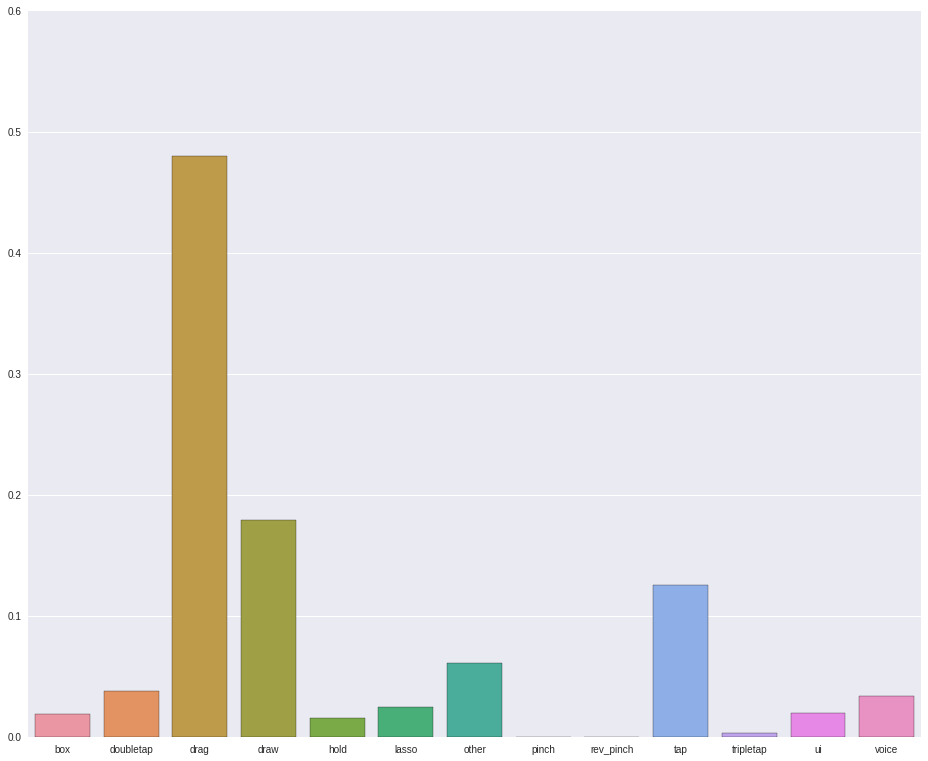

crate


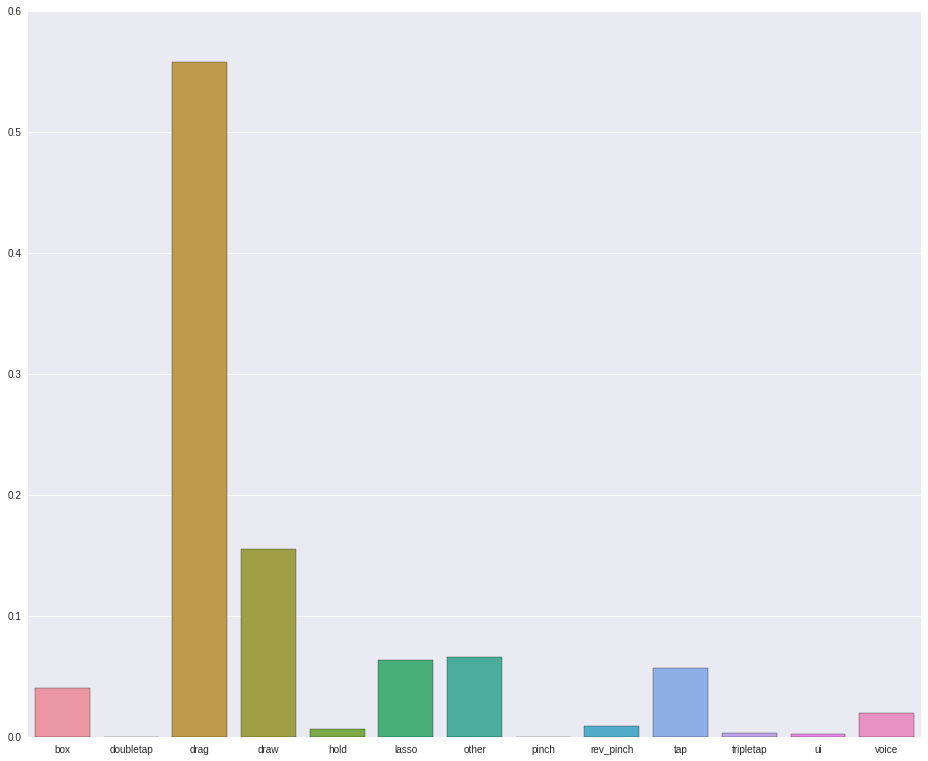

divide_color_1


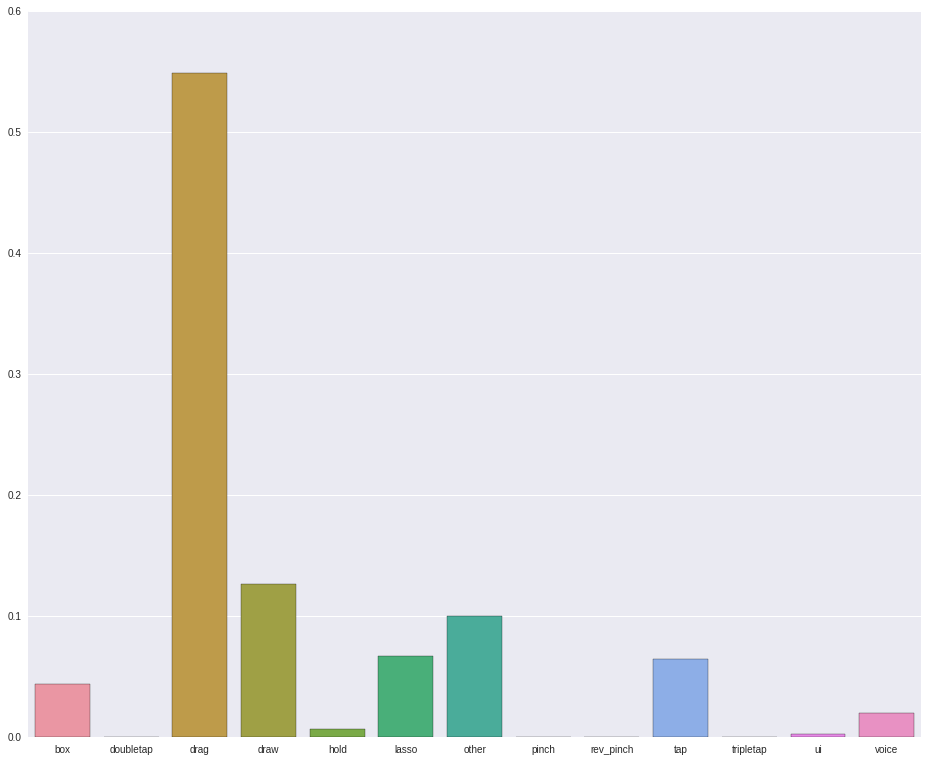

divide_color_2


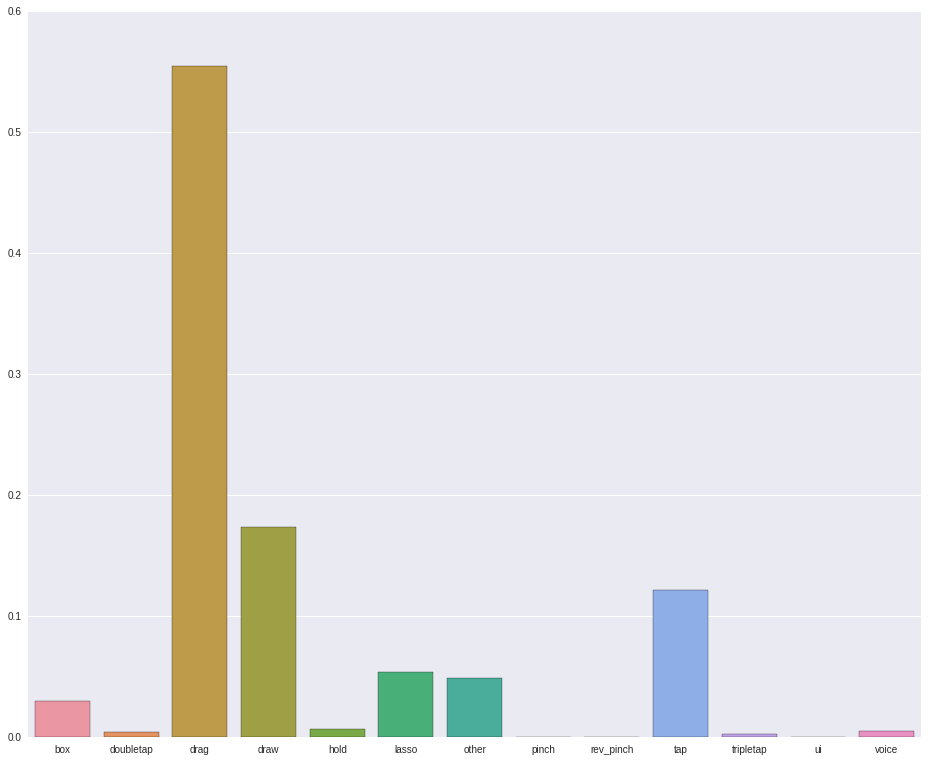

move_a


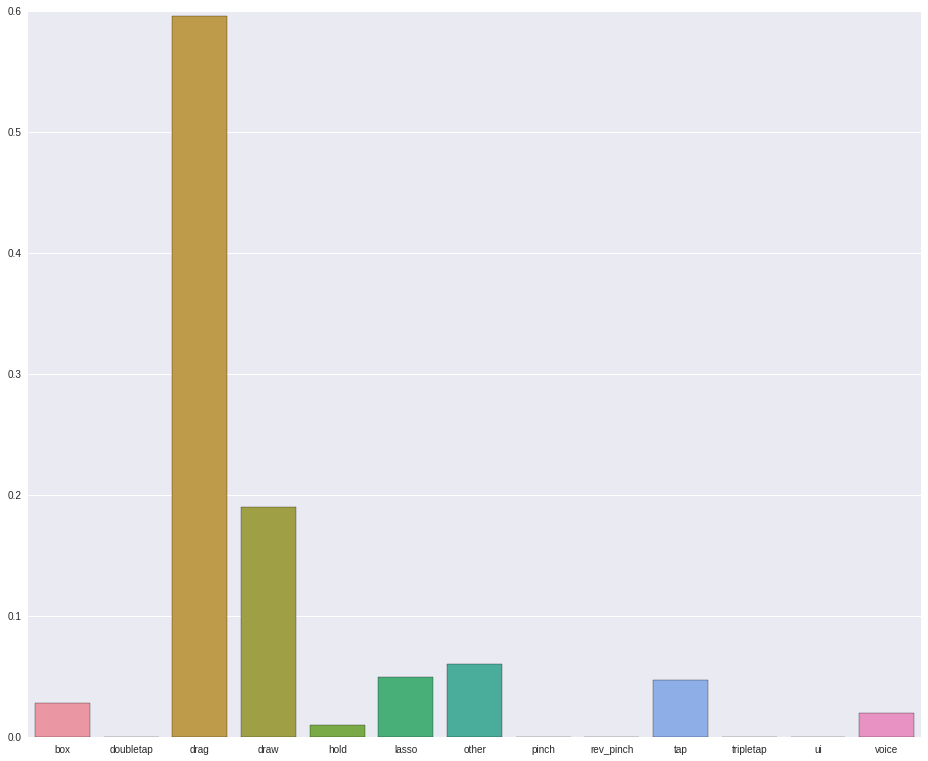

move_wall


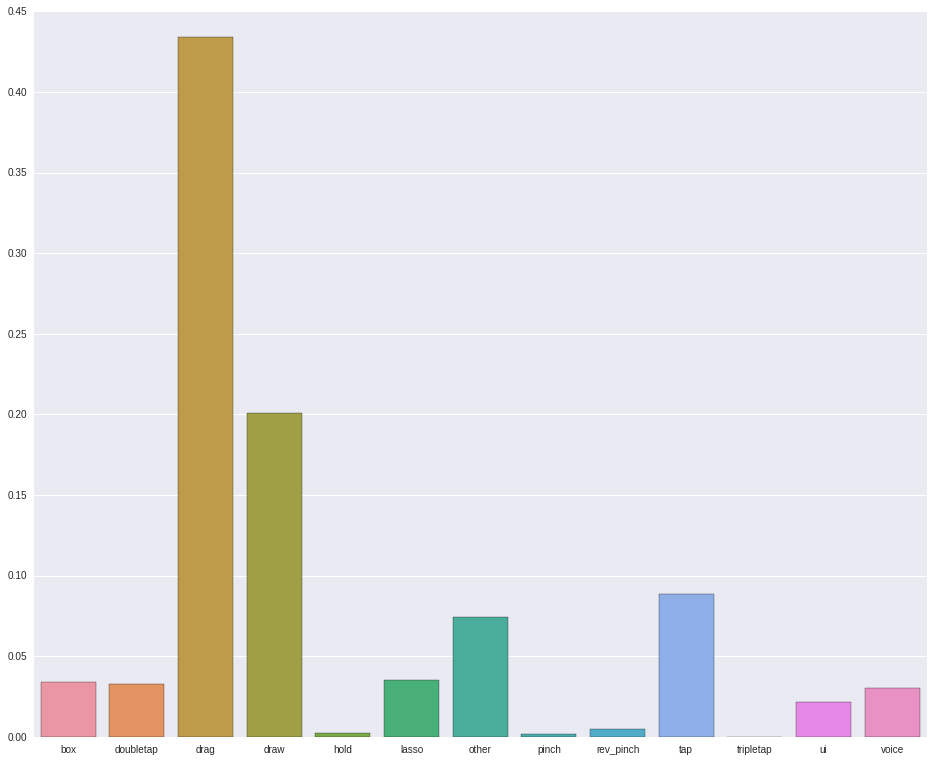

patrol_a


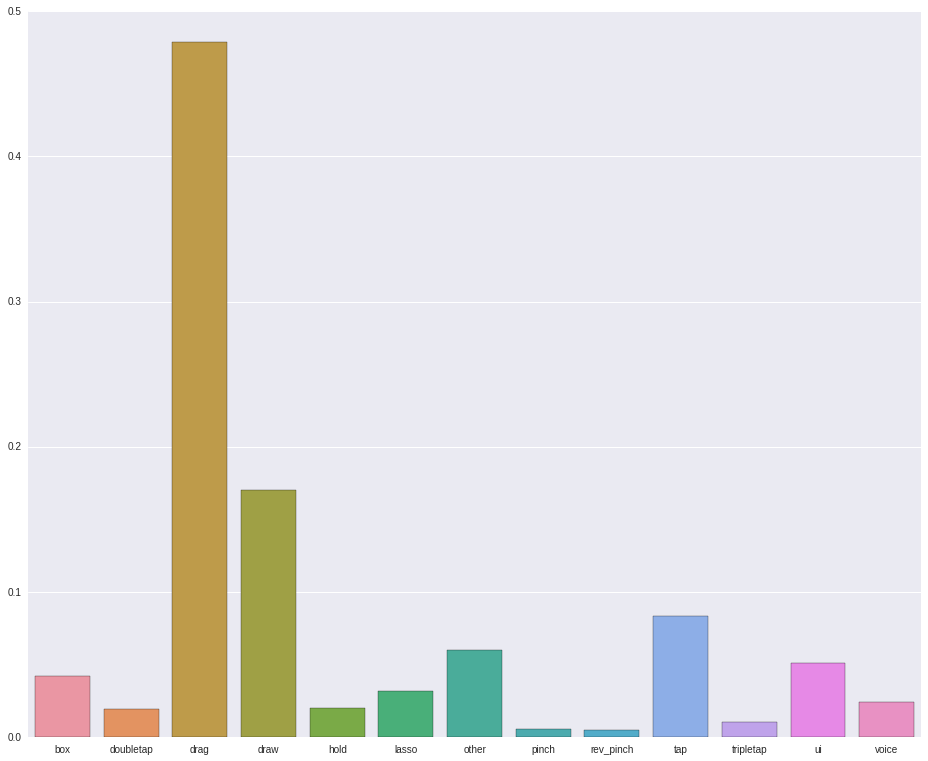

patrol_screen


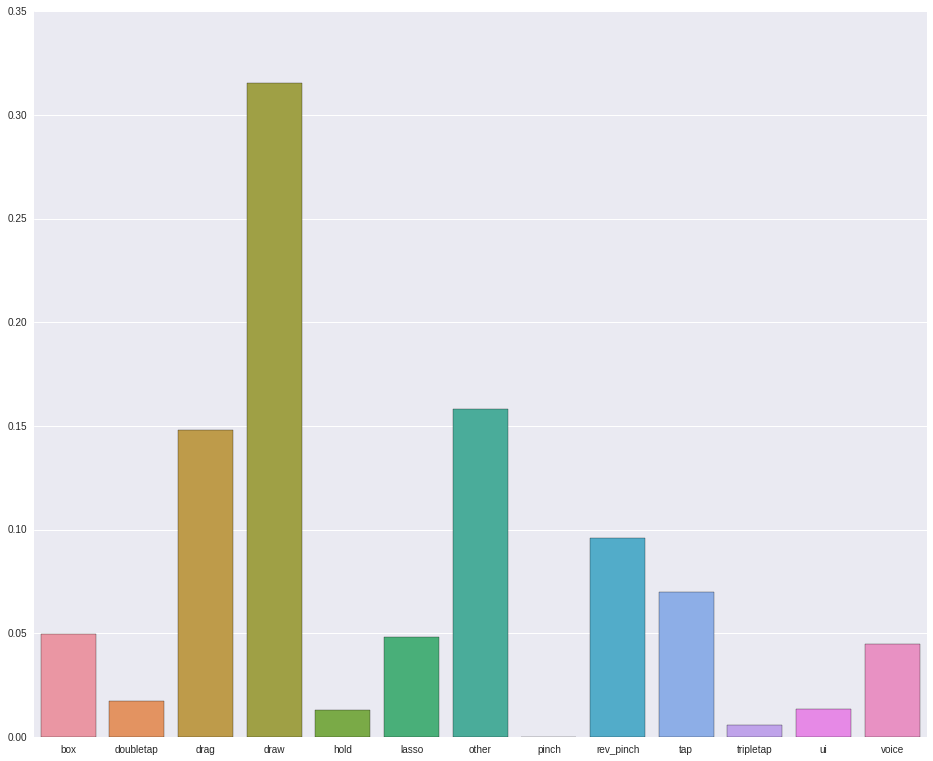

split


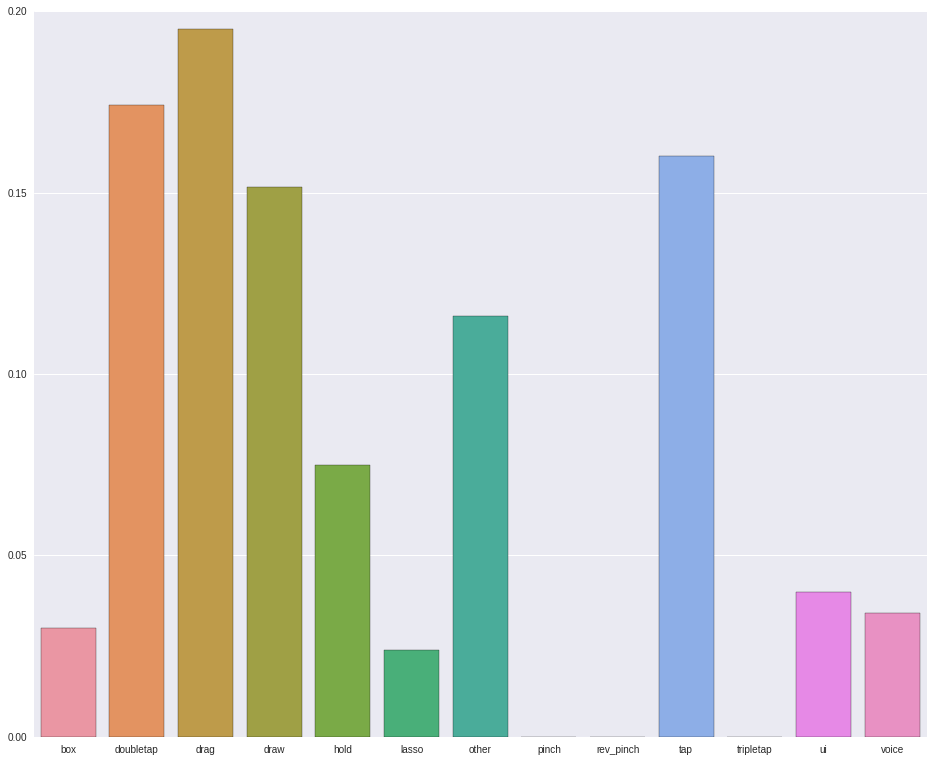

stop


In [64]:
#In the interests of finding out if specific gestures are related to a task vs related to a condition,
#get the per-task gesture counts for each common task, and graph those. 
#Collect the common task names
common_names = []
for name in adh.taskMap.keys():
    if all(adh.taskMap[name].values()):
        common_names.append(name)
common_names.sort()
#print common_names

#Create a query string that gets only the data from the common tasks
qstring = " or ".join(['task == "{}"'.format(n) for n in common_names ])

#Get the data for the common tasks from the per-task dataframe, which is normalized to proportion of gestures per user
common_tasks = per_task_df.query(qstring)

#Set common max so I can compare across tasks
plt.ylim(0.0, 0.6)

#For each condition, get the proportion of each gesture (names in col_list) for all users in that condition
for task, group in common_tasks.groupby("task"):
    #This fills NaNs with 0, because they represent places where user made no gestures for a task
    group.fillna(0.0, inplace=True)
    
    
    sb.barplot(x=col_list, y = group[col_list].mean())
    plt.show()
    
    print task
    
    
    